# **Problem Statement**
Insurance companies need to accurately predict the cost of health insurance for individuals to set premiums appropriately. However, traditional methods of cost prediction often rely on broad actuarial tables and historical averages, which may not account for the nuanced differences among individuals. By leveraging machine learning techniques, insurers can predict more accurately the insurance costs tailored to individual profiles, leading to more competitive pricing and better risk management.


In [ ]:
# Import the necessary libraries for the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Regression models and preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics

# Additional libraries for advanced models
try:
    import lightgbm as lgb
    from lightgbm import LGBMRegressor
except ImportError:
    print("LightGBM not available. Install with: pip install lightgbm")

try:
    import xgboost as xgb
    from xgboost import XGBRegressor
except ImportError:
    print("XGBoost not available. Install with: pip install xgboost")

# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm

# Model persistence
import pickle

## **Data Loading Instructions**

This notebook expects a file named `insurance.csv` to be available in the working directory.

**For Google Colab users:**
- Use the file upload widget cells below (if available)
- Alternatively, upload your `insurance.csv` file using the Files panel on the left sidebar

**For local Jupyter/other environments:**
- Ensure your `insurance.csv` file is in the same directory as this notebook
- Or update the file path in the data loading cell below

**Dataset format expected:**
The dataset should contain columns for age, diabetes, blood pressure problems, transplants, chronic diseases, height, weight, allergies, cancer history, surgeries, and premium price.

In [ ]:
# Data Loading Check
import os
print(f"Current working directory: {os.getcwd()}")
print(f"Files in current directory: {[f for f in os.listdir('.') if f.endswith('.csv')]}")

# Check if insurance.csv exists
if os.path.exists('insurance.csv'):
    print("\n✅ Dataset 'insurance.csv' found successfully!")
    # Display basic info about the file
    file_size = os.path.getsize('insurance.csv')
    print(f"File size: {file_size} bytes")
else:
    print("\n❌ Dataset 'insurance.csv' not found.")
    print("Please ensure the file is in the correct directory or update the file path.")
    print("\nFor Google Colab: Use the file upload cells below.")
    print("For local environments: Place insurance.csv in the same folder as this notebook.")

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving insurance.csv to insurance.csv
User uploaded file "insurance.csv" with length 30772 bytes


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving insurance.csv to insurance.csv
User uploaded file "insurance.csv" with length 30772 bytes


# **Insurance Cost Prediction need**
The primary need for this project arises from the challenges insurers face in pricing policies accurately while remaining competitive in the market. Inaccurate predictions can lead to losses for insurers and unfairly high premiums for policyholders. By implementing a machine learning model, insurers can:
* Enhance Precision in Pricing: Use individual data points to determine premiums
that reflect actual risk more closely than generic estimates.
* Increase Competitiveness: Offer rates that are attractive to consumers while ensuring that the pricing is sustainable for the insurer.
* Improve Customer Satisfaction: Fair and transparent pricing based on personal health data can increase trust and satisfaction among policyholders.
* Enable Personalized Offerings: Create customized insurance packages based on predicted costs, which can cater more directly to the needs and preferences of individuals.
* Risk Assessment: Insurers can use the model to refine their risk assessment processes, identifying key factors that influence costs most significantly.
* Policy Development: The insights gained from the model can inform the development of new insurance products or adjustments to existing ones.
* Strategic Decision Making: Predictive analytics can aid in broader strategic decisions, such as entering new markets or adjusting policy terms based on risk predictions.
* Customer Engagement: Insights from the model can be used in customer engagement initiatives, such as personalized marketing and tailored advice for policyholders.



In [ ]:
# load the dataset
df=pd.read_csv("insurance.csv")

In [ ]:
# Checking the head of the dataset
df.head(5)

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice  
0                       0         25000  
1                       0         29000  
2                       1         23000  
3                       2         28000  
4                       1         23000

In [ ]:
 #checking the columns dtypes and the basic info of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


* We could see that all columns are integers. During the model delveopment we may need to check if the type needs any conversion

* There 9 features and one target variable to i.e to predict the premium price.

In [ ]:
# checking for the NULL values
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

We can see that there are no NULL values in the dataset.

In [ ]:
colum_list = list(df.columns)
colum_list

['Age',
 'Diabetes',
 'BloodPressureProblems',
 'AnyTransplants',
 'AnyChronicDiseases',
 'Height',
 'Weight',
 'KnownAllergies',
 'HistoryOfCancerInFamily',
 'NumberOfMajorSurgeries',
 'PremiumPrice']

In [ ]:
# check the shape oft he dataset
print(df.shape)

(986, 11)


* We could see that the data set is actually have less than 1000 records.

In [ ]:
df.describe(include="all").T

count          mean          std      min      25%  \
Age                      986.0     41.745436    13.963371     18.0     30.0   
Diabetes                 986.0      0.419878     0.493789      0.0      0.0   
BloodPressureProblems    986.0      0.468560     0.499264      0.0      0.0   
AnyTransplants           986.0      0.055781     0.229615      0.0      0.0   
AnyChronicDiseases       986.0      0.180527     0.384821      0.0      0.0   
Height                   986.0    168.182556    10.098155    145.0    161.0   
Weight                   986.0     76.950304    14.265096     51.0     67.0   
KnownAllergies           986.0      0.215010     0.411038      0.0      0.0   
HistoryOfCancerInFamily  986.0      0.117647     0.322353      0.0      0.0   
NumberOfMajorSurgeries   986.0      0.667343     0.749205      0.0      0.0   
PremiumPrice             986.0  24336.713996  6248.184382  15000.0  21000.0   

                             50%      75%      max  
Age                         42.0     53.0     66.0  
Diabetes                     0.0      1.0      1.0  
BloodPressureProblems        0.0      1.0      1.0  
AnyTransplants               0.0      0.0      1.0  
AnyChronicDiseases           0.0      0.0      1.0  
Height                     168.0    176.0    188.0  
Weight                      75.0     87.0    132.0  
KnownAllergies               0.0      0.0      1.0  
HistoryOfCancerInFamily      0.0      0.0      1.0  
NumberOfMajorSurgeries       1.0      1.0      3.0  
PremiumPrice             23000.0  28000.0  40000.0

* If we look at the continous variable like age, weight, height and Premium Price we could see the 25th percentile ,median, 75th percentile and max value.

In [ ]:
# printing the value counts of each column
for col in colum_list:
    print('-------------------------')
    print(f"{col} the value counts: {df[col].value_counts()}")
    print('-------------------------')

-------------------------
Age the value counts: Age
43    30
27    27
42    27
35    26
45    25
59    25
44    24
25    24
48    24
66    23
46    23
18    23
33    23
49    23
32    22
29    22
47    22
64    22
24    22
30    22
19    21
62    21
21    21
31    20
51    20
50    20
54    20
63    19
36    19
52    19
40    19
22    19
37    18
34    18
41    18
38    17
20    17
55    17
53    17
60    17
28    17
65    17
61    16
58    16
56    15
23    13
26    13
57    12
39    11
Name: count, dtype: int64
-------------------------
-------------------------
Diabetes the value counts: Diabetes
0    572
1    414
Name: count, dtype: int64
-------------------------
-------------------------
BloodPressureProblems the value counts: BloodPressureProblems
0    524
1    462
Name: count, dtype: int64
-------------------------
-------------------------
AnyTransplants the value counts: AnyTransplants
0    931
1     55
Name: count, dtype: int64
-------------------------
---------------------

* The above output helps us to identify the unique values and its count in the particular columns to understand if we need to play any particular attention to a certain unqiue values.

* The unique counts of the age we could see that in most age there are atleast 15 people who have purchased a policy.

* When it comes to weight it seems that people in the weight between 65kg to 80 kgs are more in puchasing the policy.

* The most premium opted are 23000 with 249 people who had purchased it, 15000 by 202 people, 38000 by 132 people, 25000 by 103 people and 29000 by 72 people.

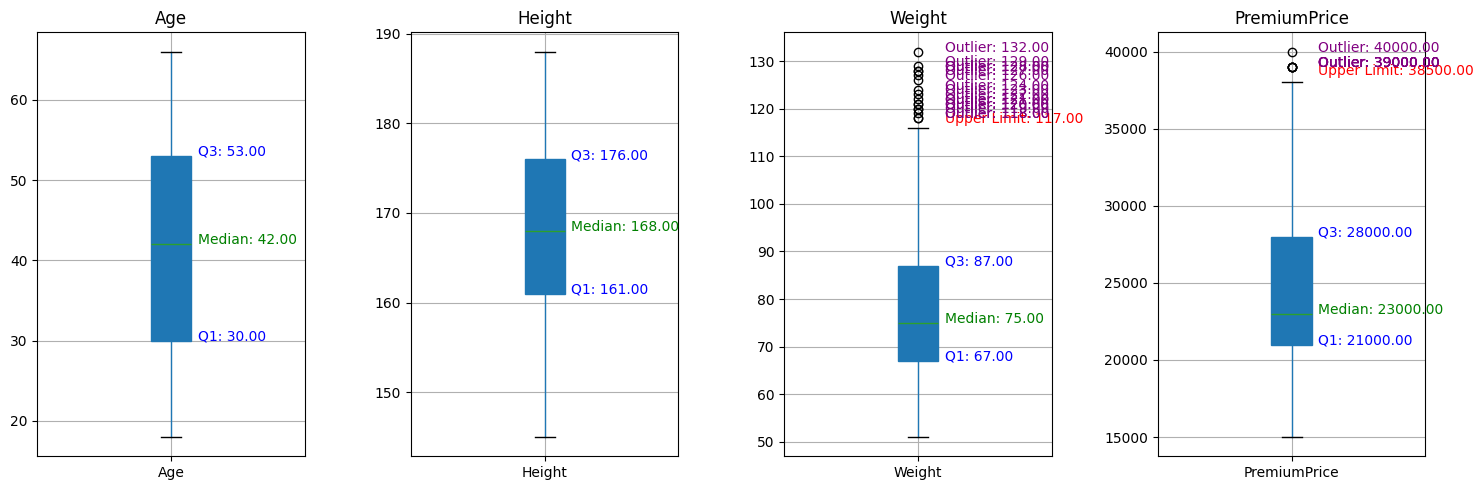

In [ ]:
# plotting the box plots for the columns
boxplot_columns = ['Age',
 'Height',
 'Weight',
 'PremiumPrice']

fig, axes = plt.subplots(nrows=1, ncols=len(boxplot_columns), figsize=(15, 5))

for ax, column in zip(axes, boxplot_columns):
    box = df.boxplot(column=column, ax=ax, patch_artist=True)
    stats = df[column].describe(percentiles=[.25, .5, .75])
    Q1 = stats['25%']
    median = stats['50%']
    Q3 = stats['75%']
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)][column]

    ax.set_title(column)
    ax.annotate(f'Lower Limit: {lower_limit:.2f}', xy=(1.1, lower_limit), xycoords='data', color='red')
    ax.annotate(f'Q1: {Q1:.2f}', xy=(1.1, Q1), xycoords='data', color='blue')
    ax.annotate(f'Median: {median:.2f}', xy=(1.1, median), xycoords='data', color='green')
    ax.annotate(f'Q3: {Q3:.2f}', xy=(1.1, Q3), xycoords='data', color='blue')
    ax.annotate(f'Upper Limit: {upper_limit:.2f}', xy=(1.1, upper_limit), xycoords='data', color='red')

    for outlier in outliers:
        ax.annotate(f'Outlier: {outlier:.2f}', xy=(1.1, outlier), xycoords='data', color='purple')

plt.tight_layout()
plt.show()

### **Insights from Boxplot**

* We could see that there are more insurance premium purchaser between the age 30 to 53 with a median age as 42. No outliers observed on this category.

* We could see that the height of the premium purchaser lies between 161cm to 176cm with median height of 168. No outliers observed on this category.

* With respect to the weight eature we could see the weight range of most of the people purchasing the premium are between 67kg to 87kg with a median weight of 75 kg. There are many outliers here hence we moght have to use either a minmax or a standard scaler wile trying out linear or logistic regression.

* Most of the premium purchased falls between 21000 to 28000 with a median of 23000. There are very few outliers.

We could see that the median age is

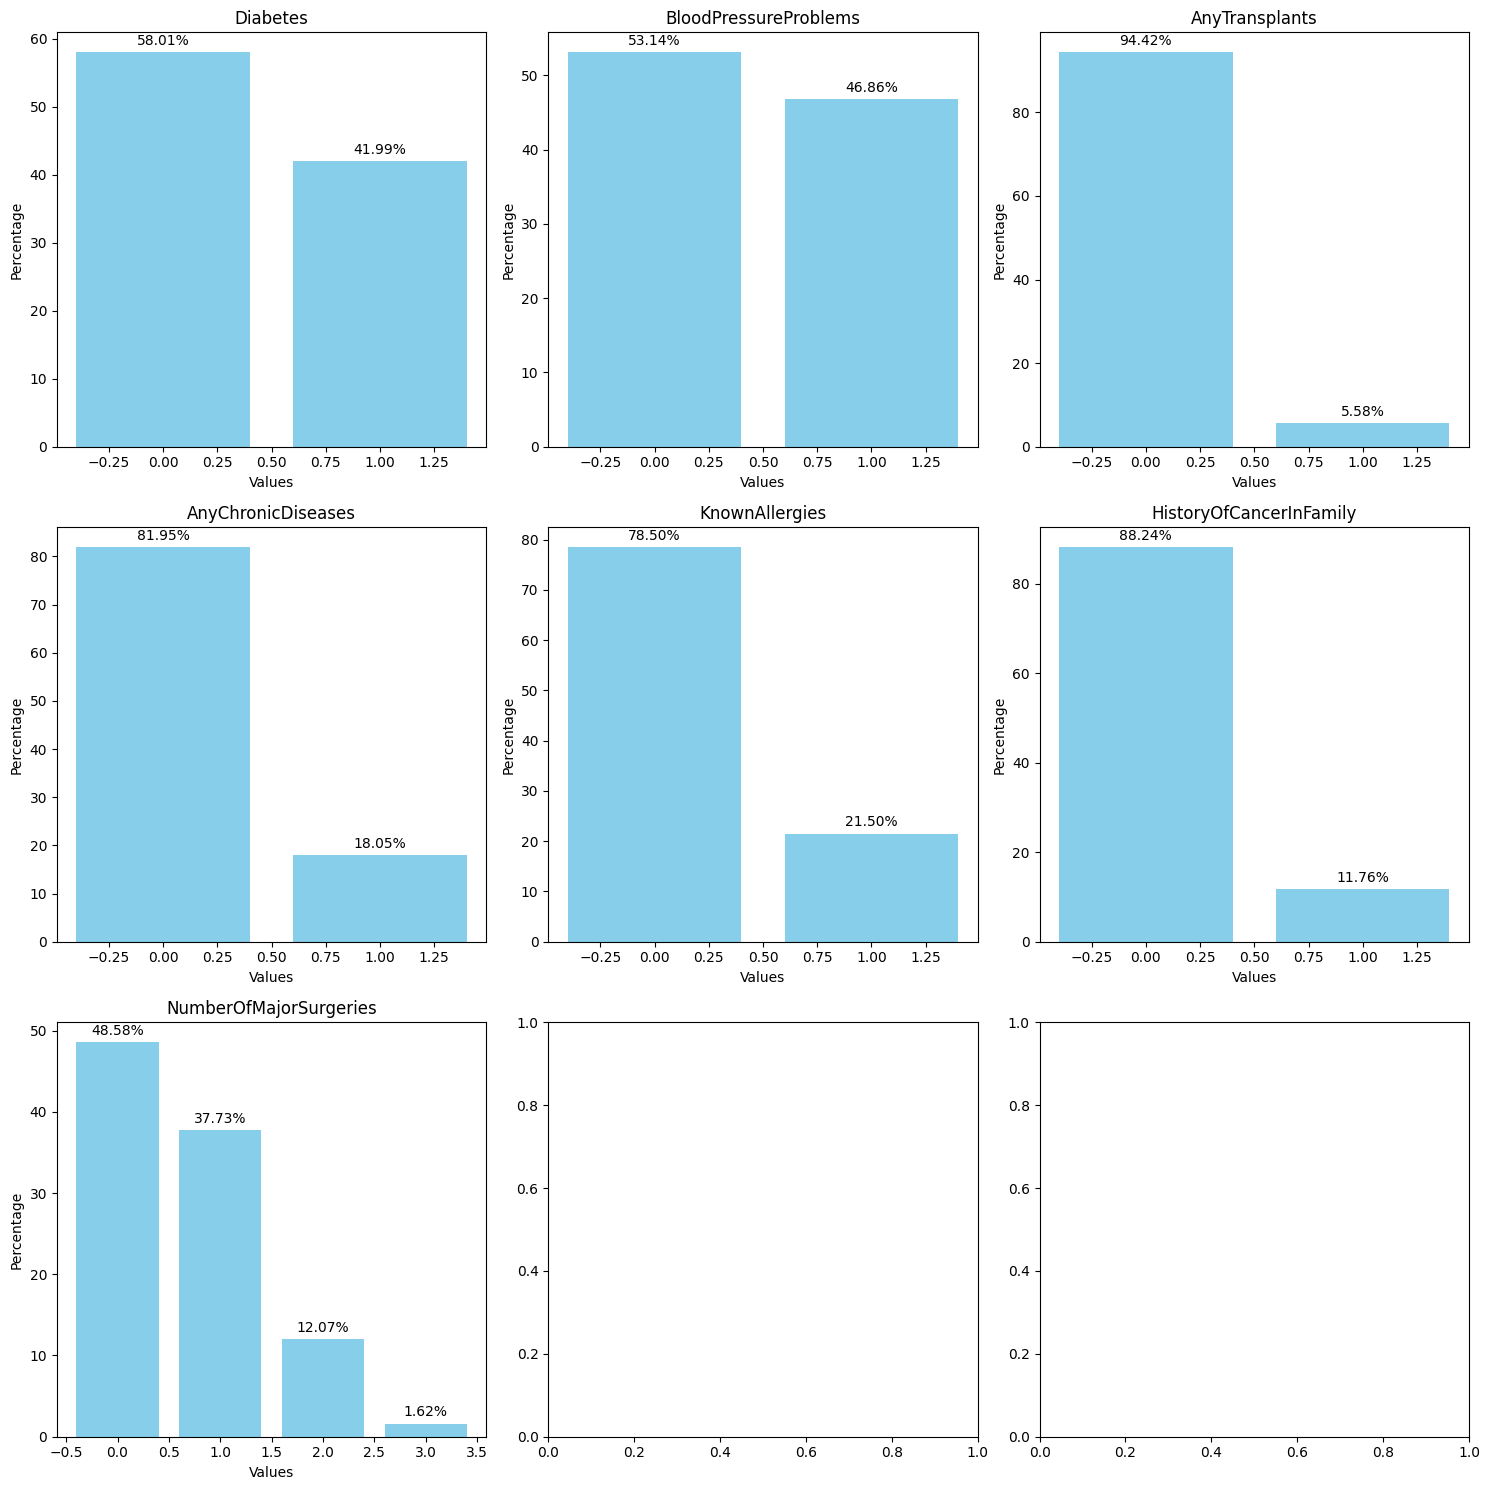

In [ ]:
bar_plots = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for ax, column in zip(axes, bar_plots):
    counts = df[column].value_counts(normalize=True) * 100
    bars = ax.bar(counts.index, counts.values, color='skyblue')
    ax.set_title(column)
    ax.set_ylabel('Percentage')
    ax.set_xlabel('Values')

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# **Insights from bar plots**

* From the above seven barplots we could say that roughly 50 percentage of the Insurance purchaser are not have any health issues and had not undergone any surgries.

* We could see that there are purchaser of the insurance who have diabetics and blood pressur problems around 42 percentages.

In [ ]:
# Adding the BMI column
df['BMI'] = df['Weight'] / (df['Height'] / 100)**2

<Axes: >

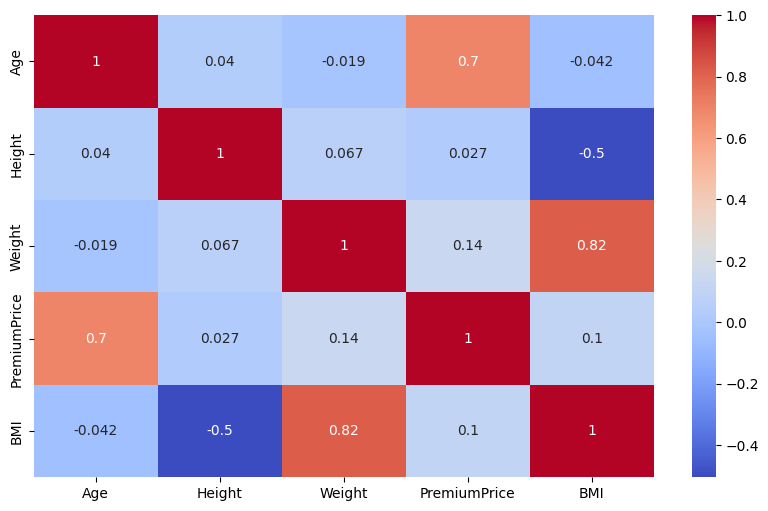

In [ ]:
# Plotting correlation matrix with annotations
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Age', 'Height', 'Weight', 'PremiumPrice', 'BMI']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


# **Insights from Correlation plot**

* We can see height is negatively correlated wtih BMI. BMI is positively correlated with weight.

* Age is positively correlated with premium price.

* Hence while creating Linear regression or logistic regression we will drop the weight feature.


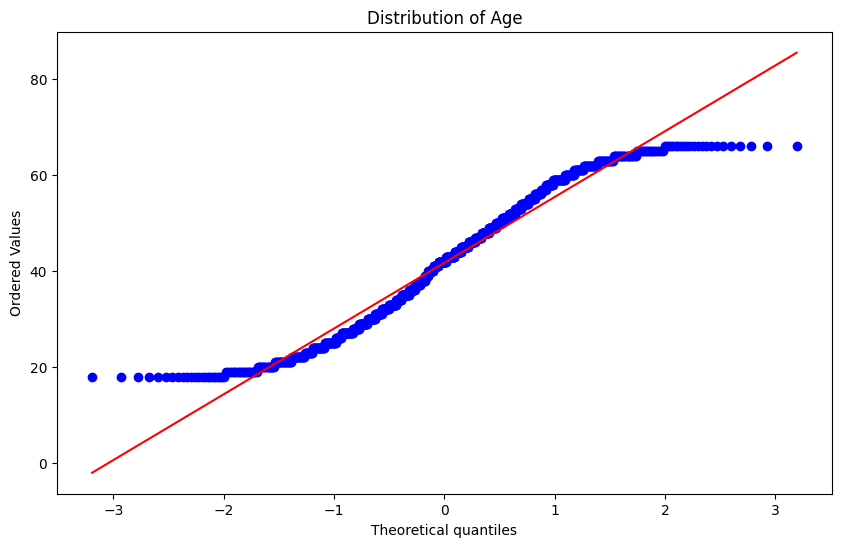

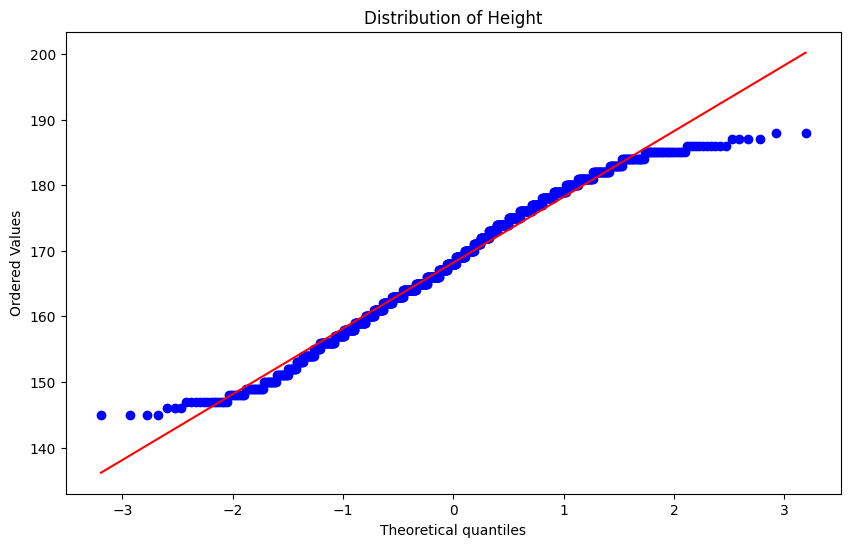

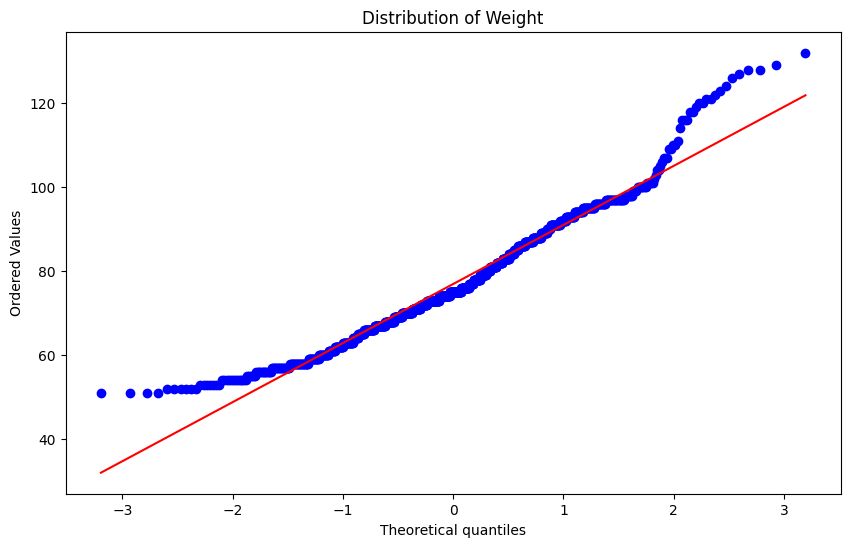

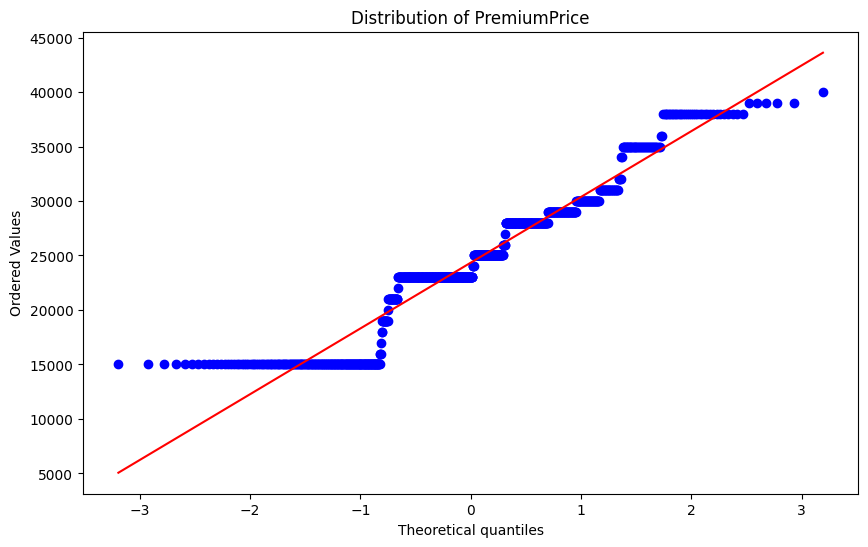

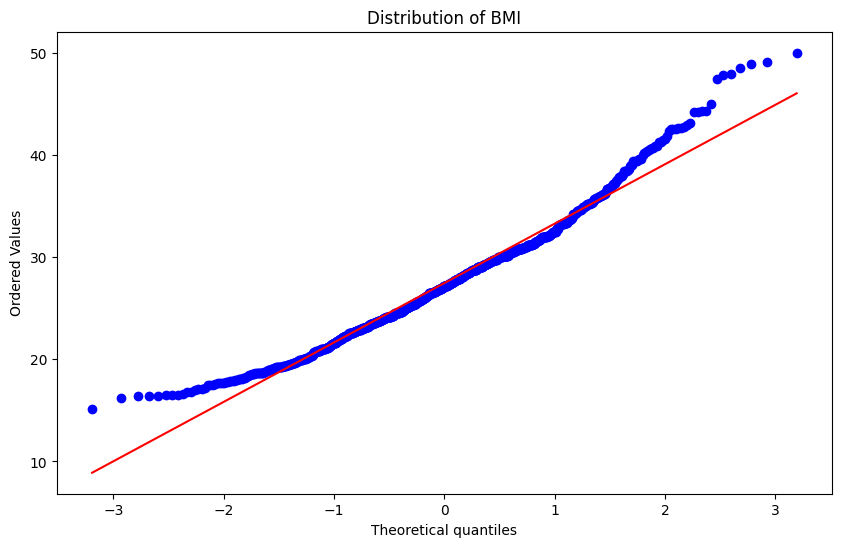

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# lets do a QQplot test for the columns
qplot_columns = ["Age", "Height", "Weight", "PremiumPrice", "BMI"]
# Generating QQ plots
for col in qplot_columns:
    plt.figure(figsize=(10, 6))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Distribution of {col}")
    plt.show()

# **Insights from qqplot**

* From the above plot we could see that they are not normally distributed

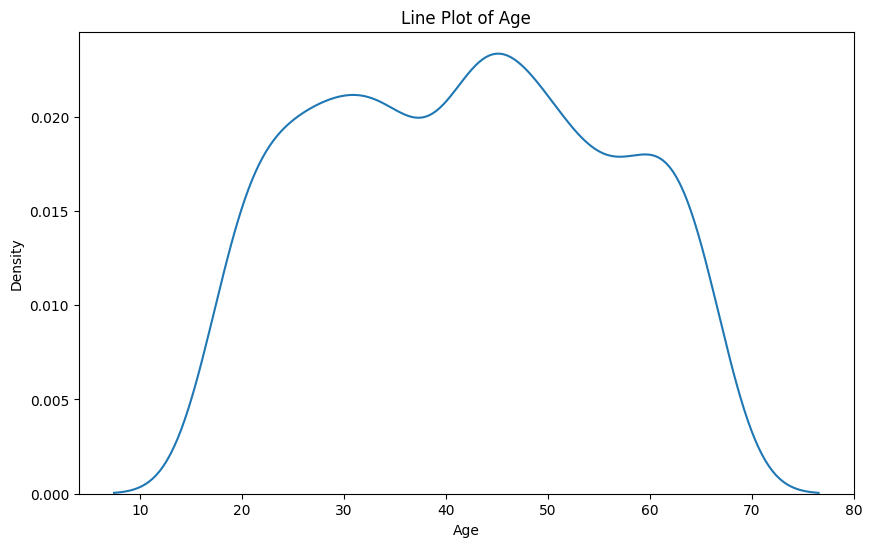

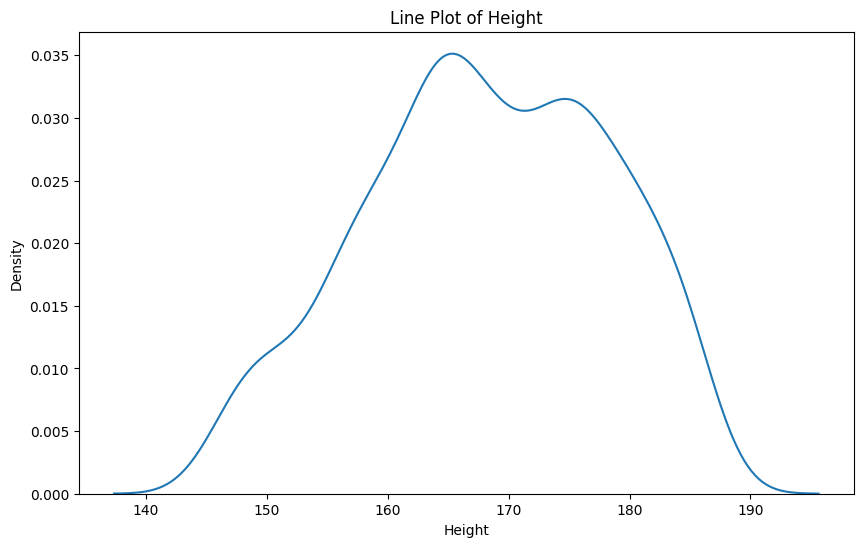

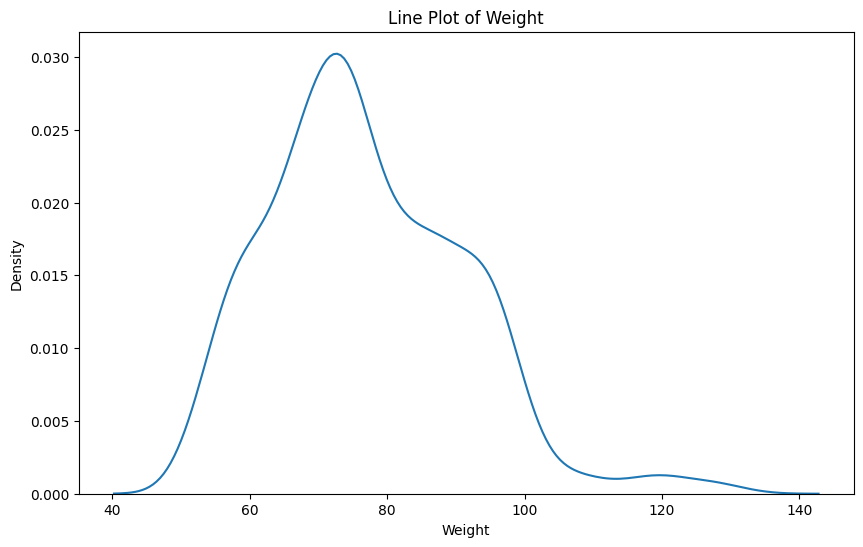

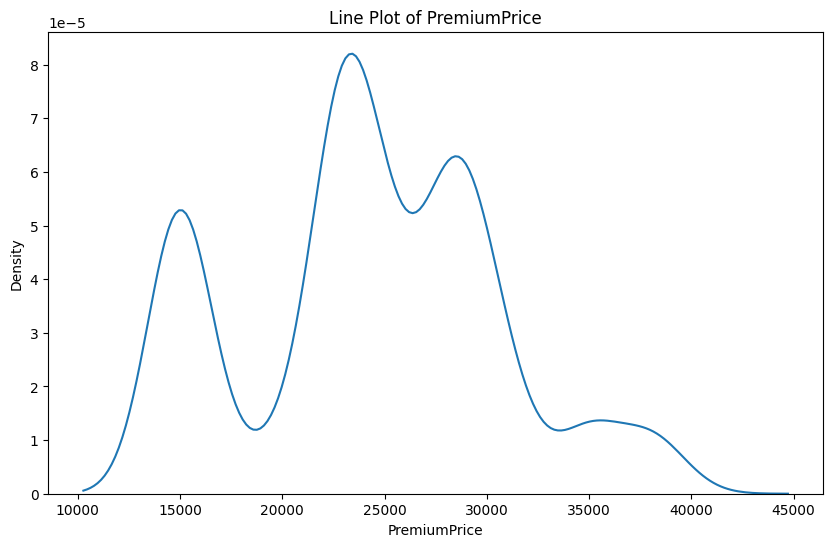

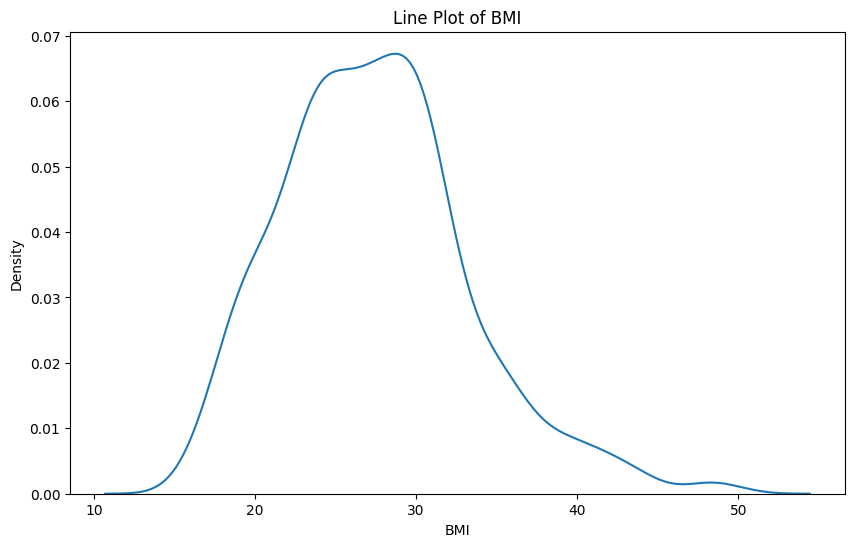

In [ ]:
# Generating line plots
for col in qplot_columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df[col])
    plt.title(f"Line Plot of {col}")


# **KDE plot insights**

* For all the numerical columns we could see that they are not normally distributed.

* We can see that age alone is folling a distribution similar to normal distribution.

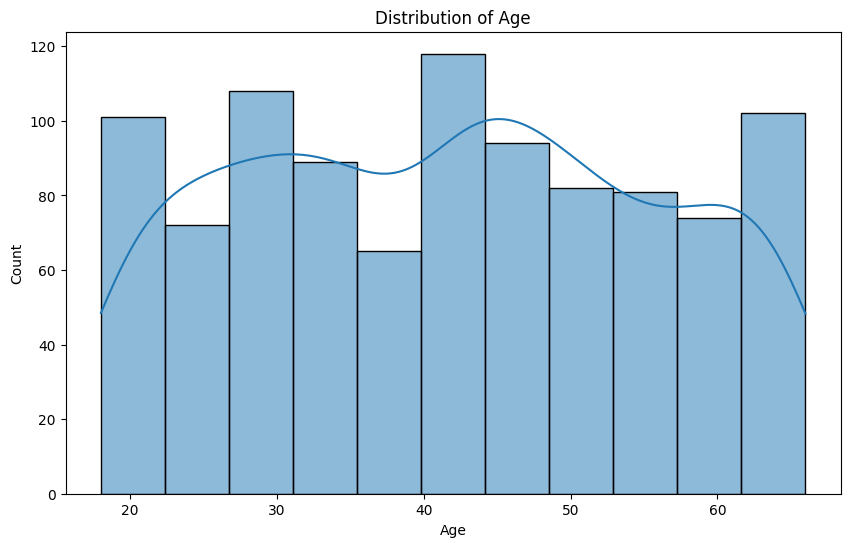

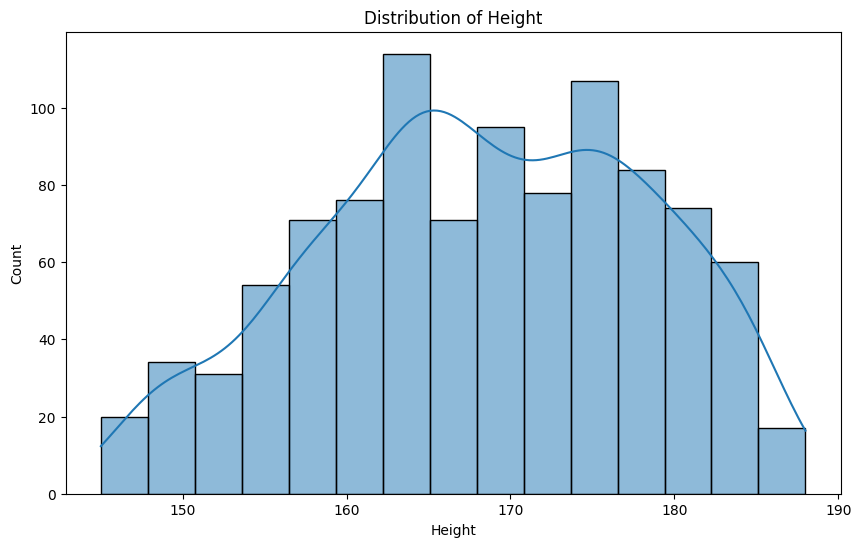

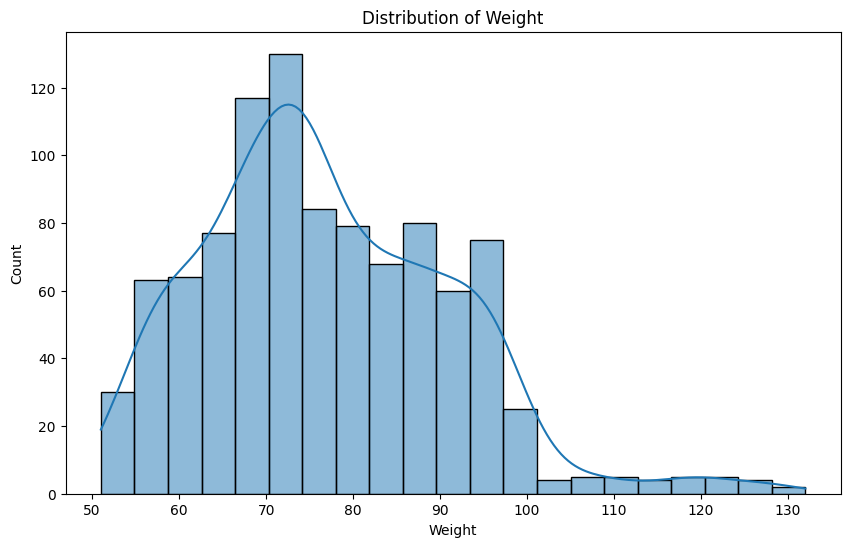

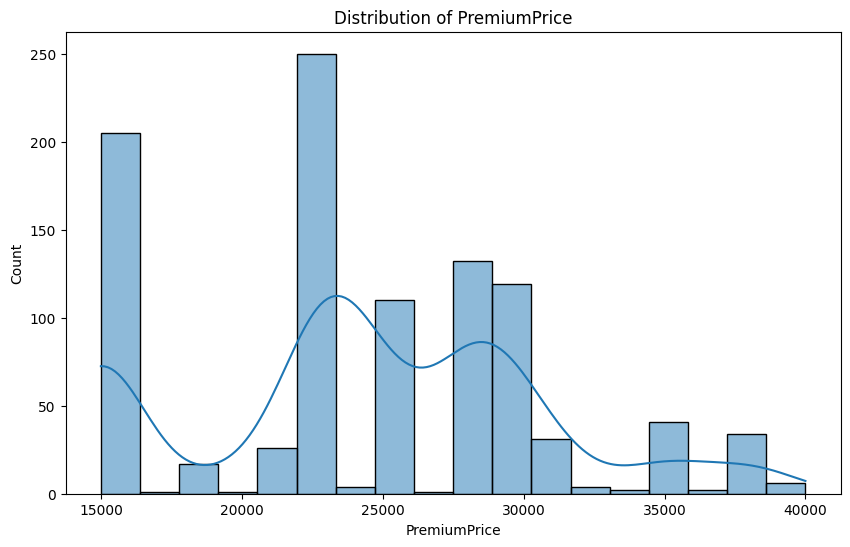

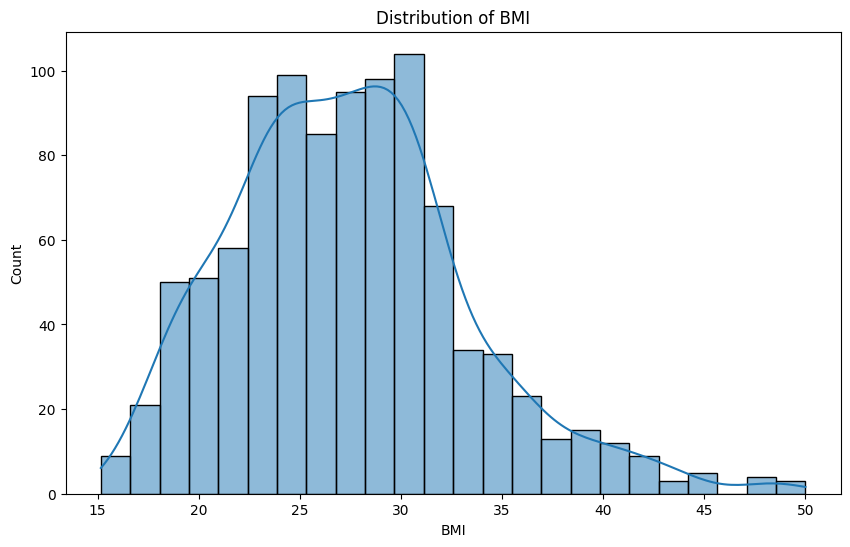

In [ ]:
# Generating histograms and KDE plots
for col in qplot_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")


# Plotting the scatter plots


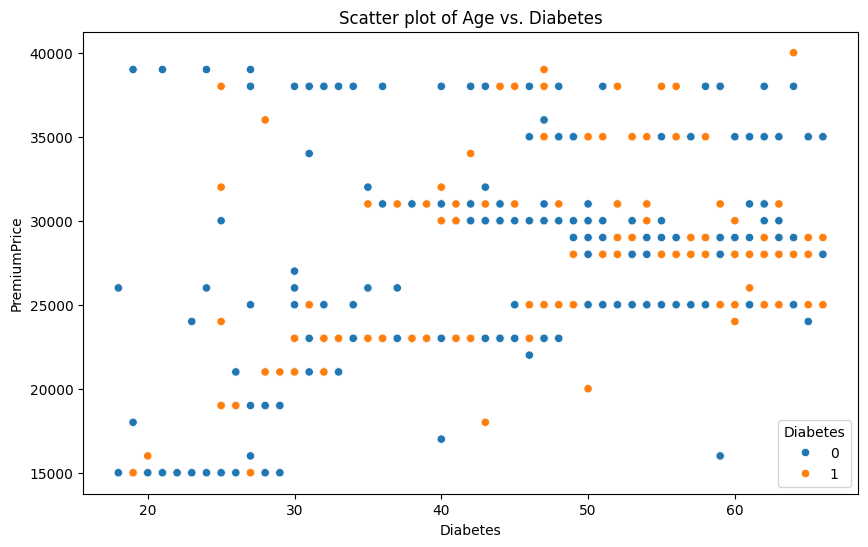

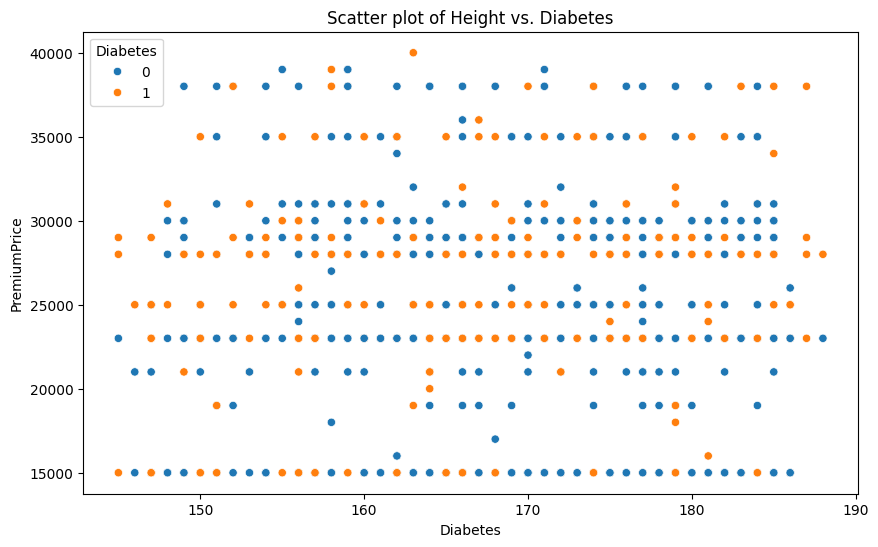

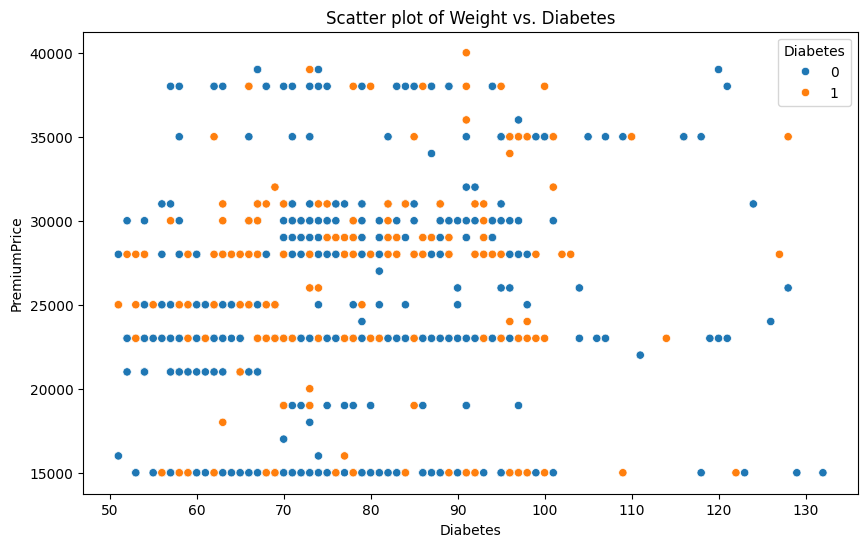

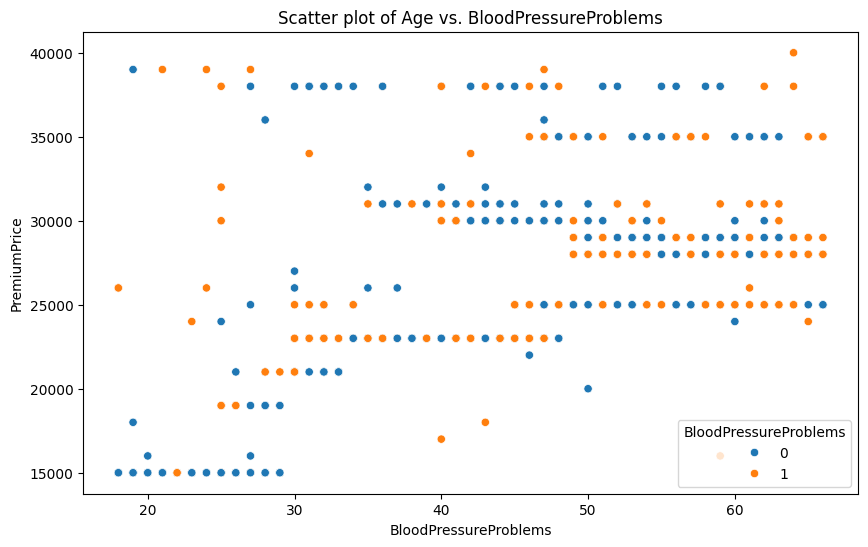

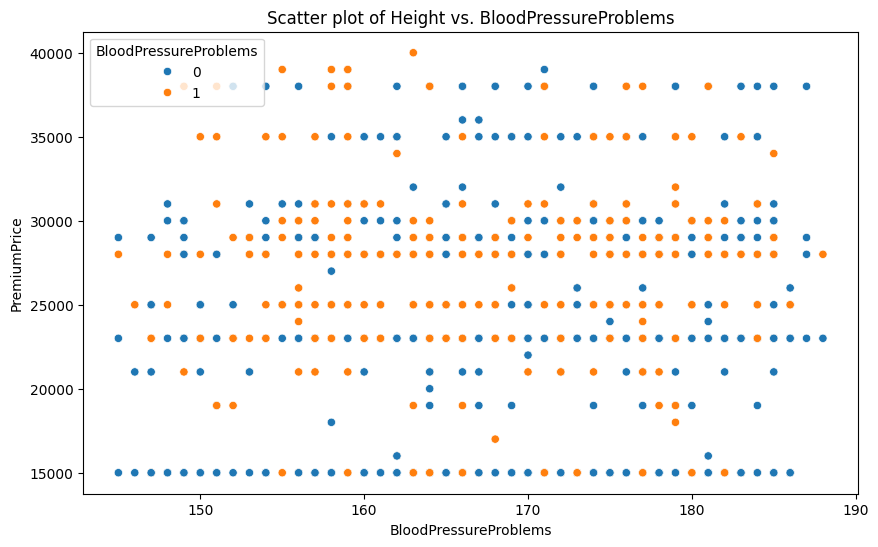

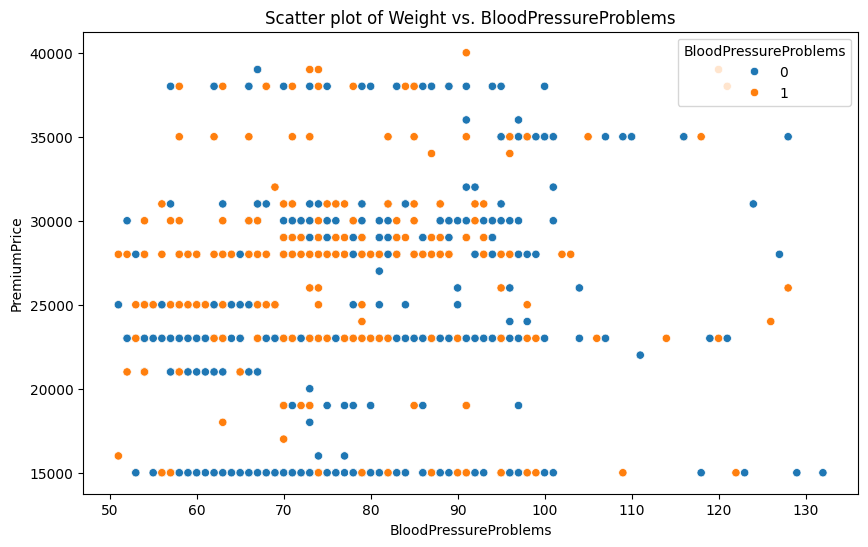

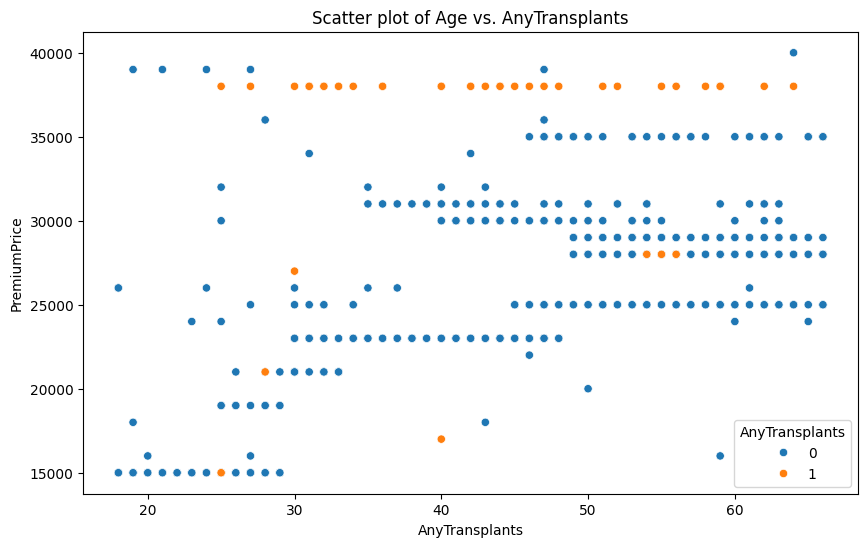

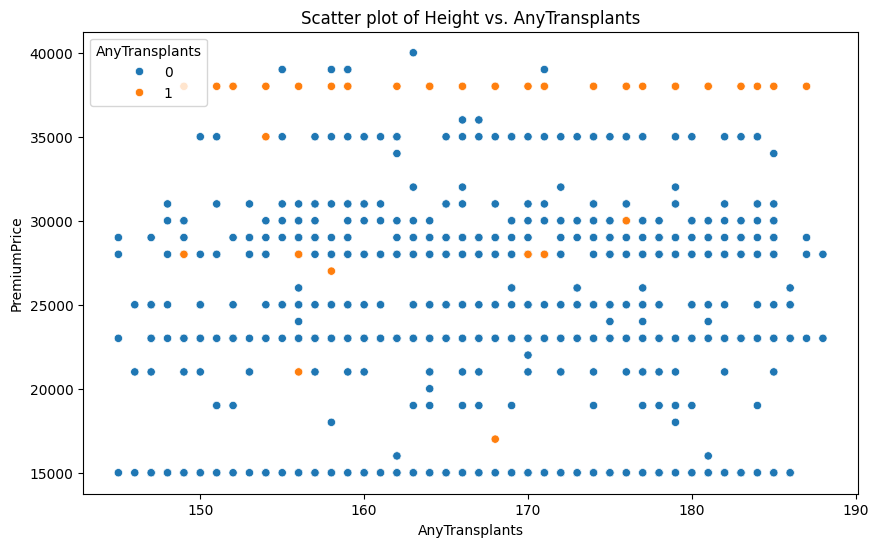

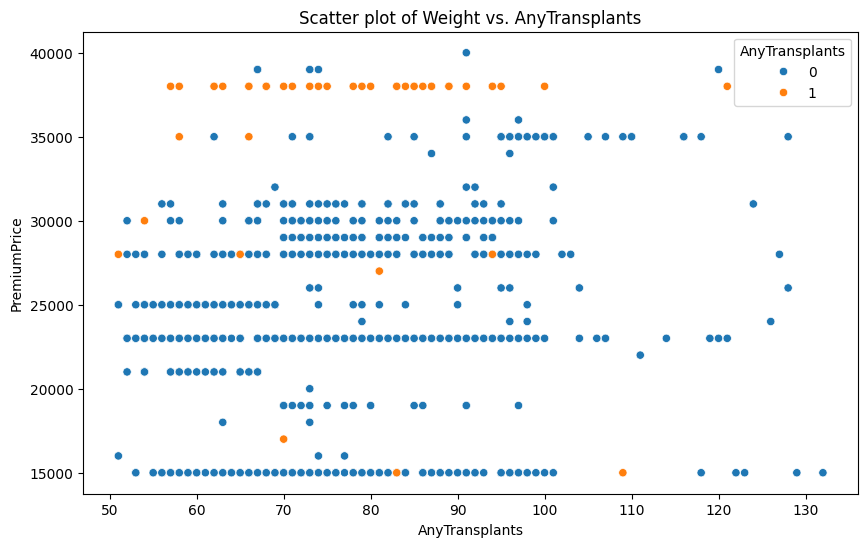

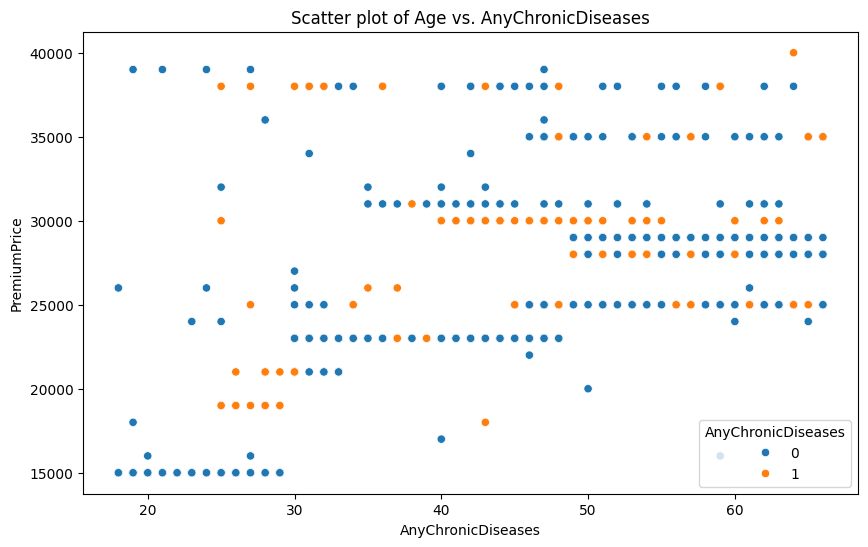

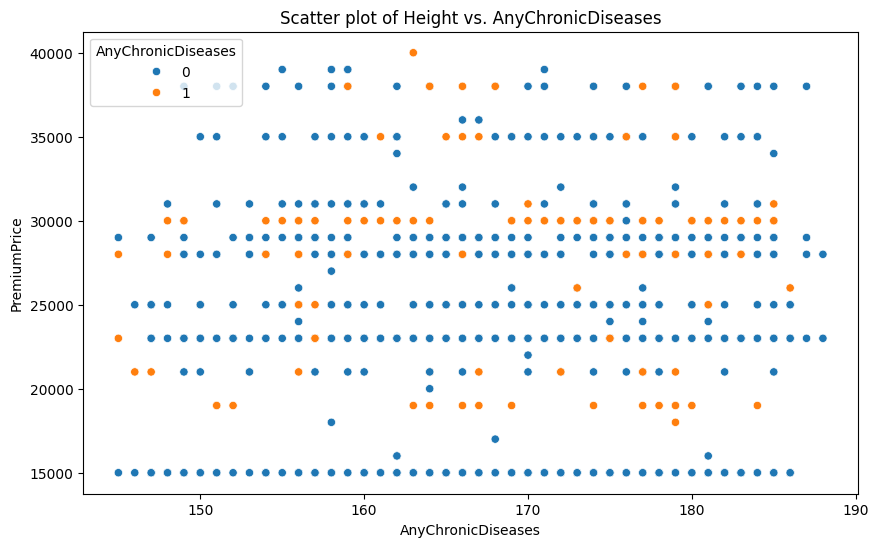

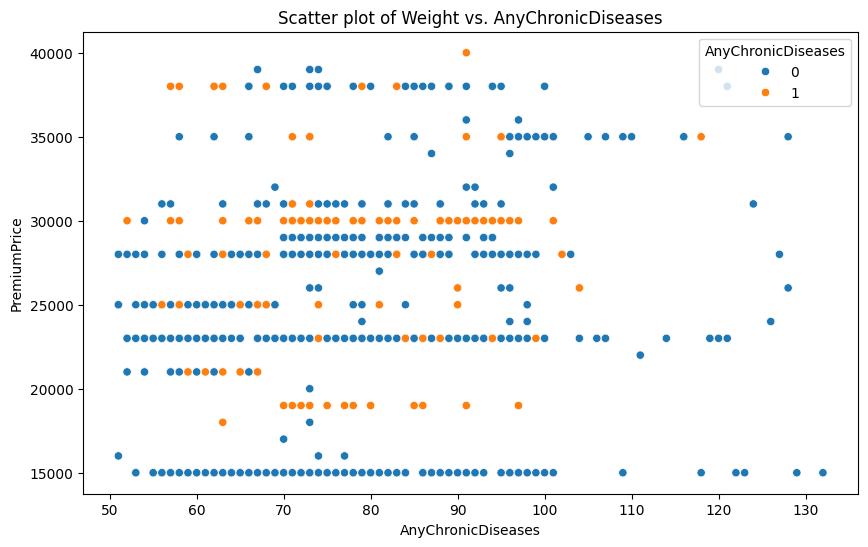

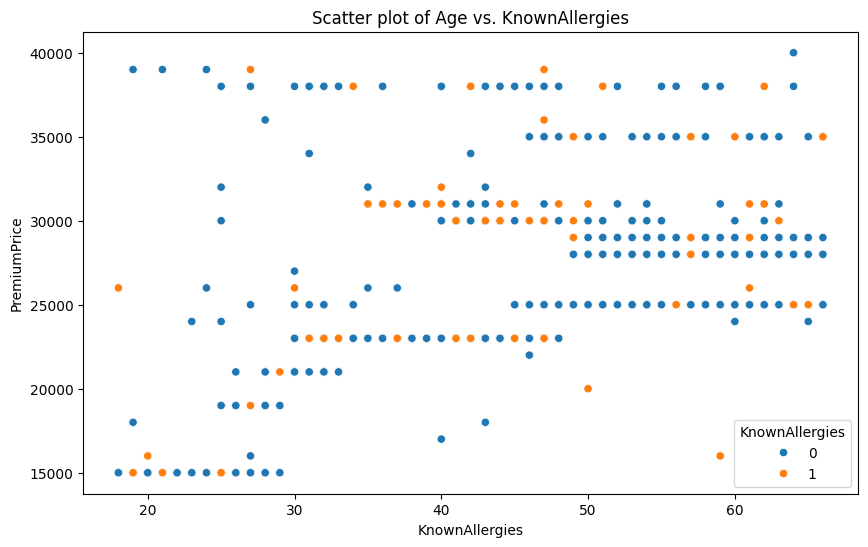

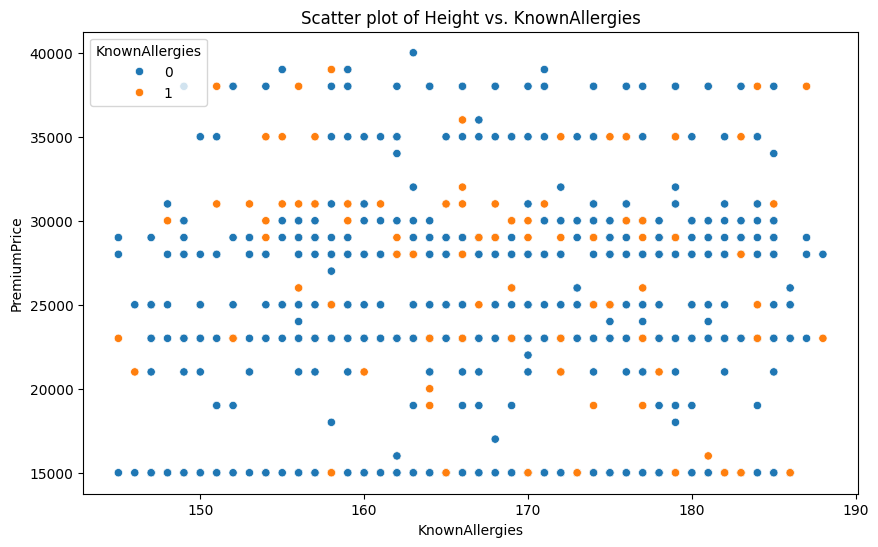

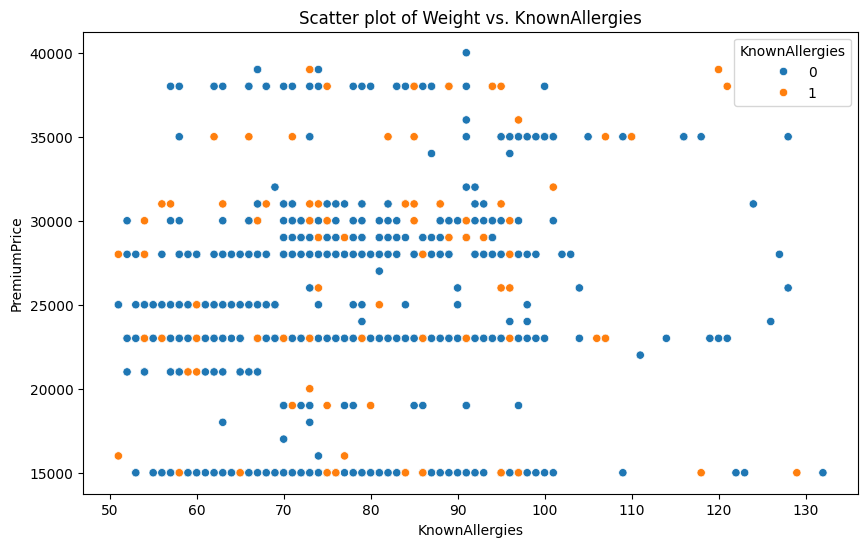

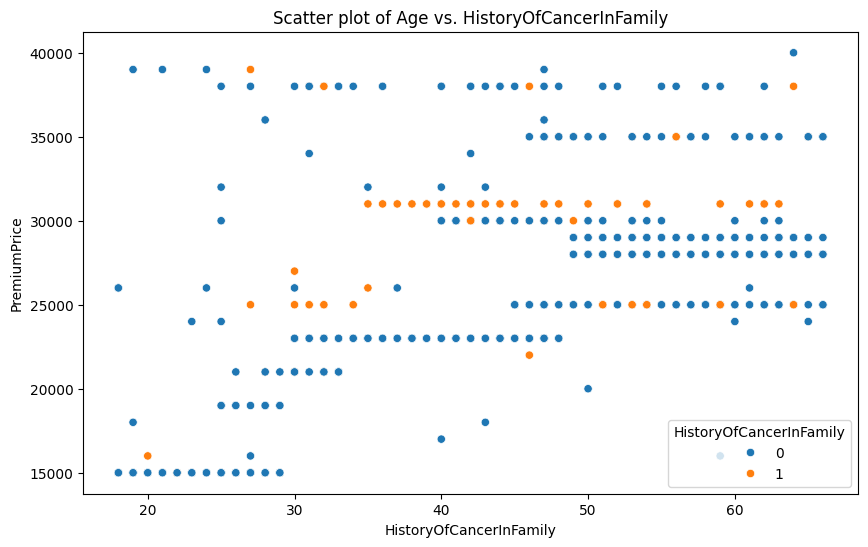

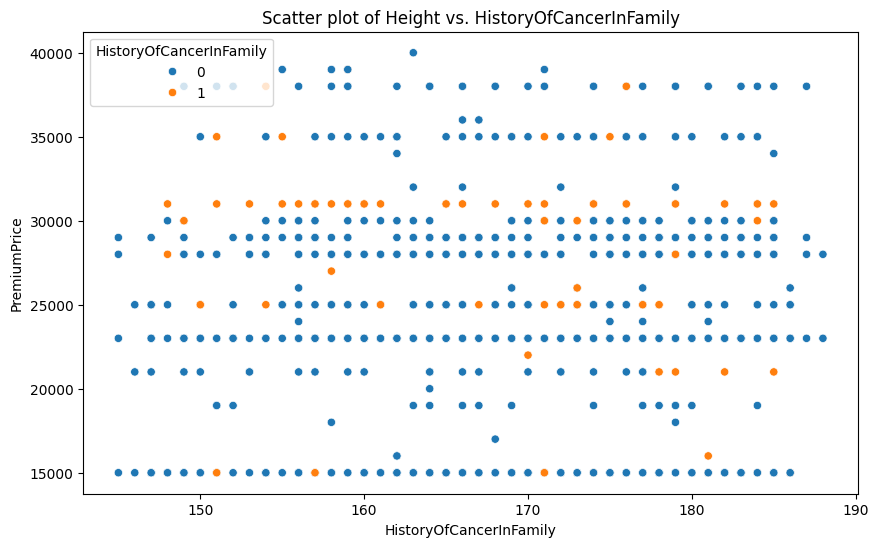

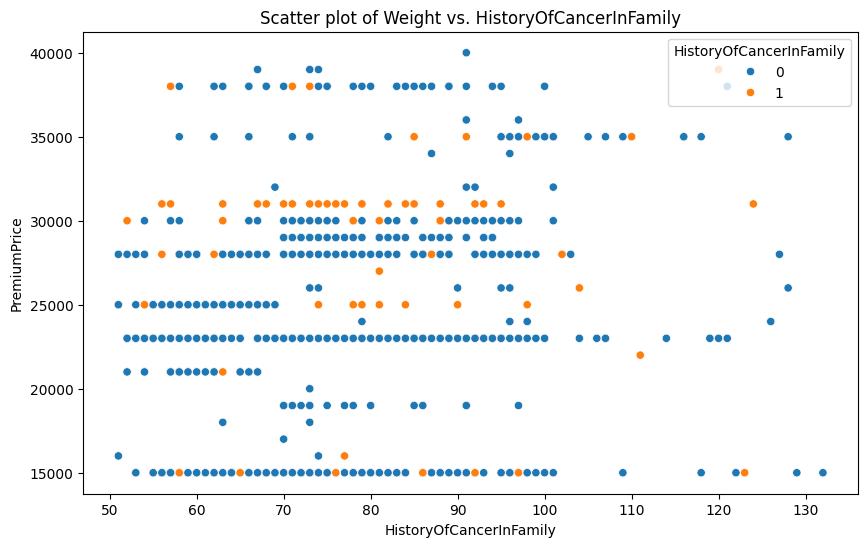

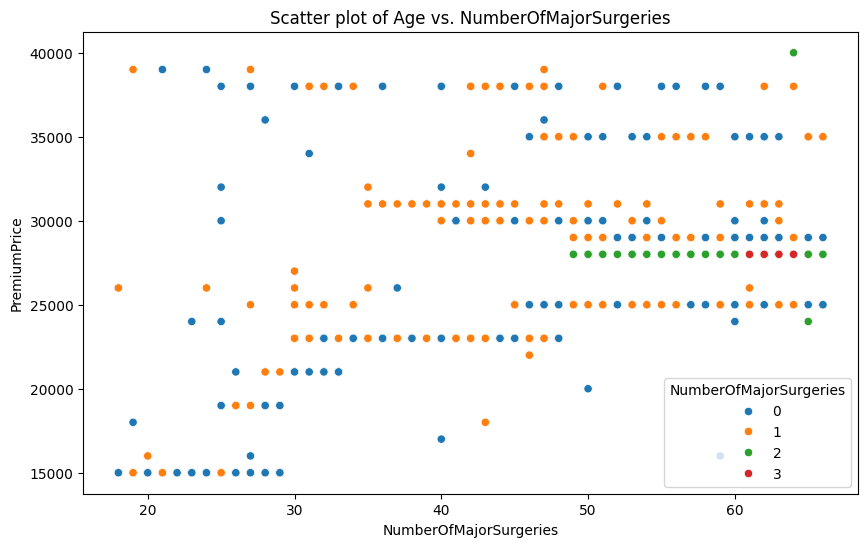

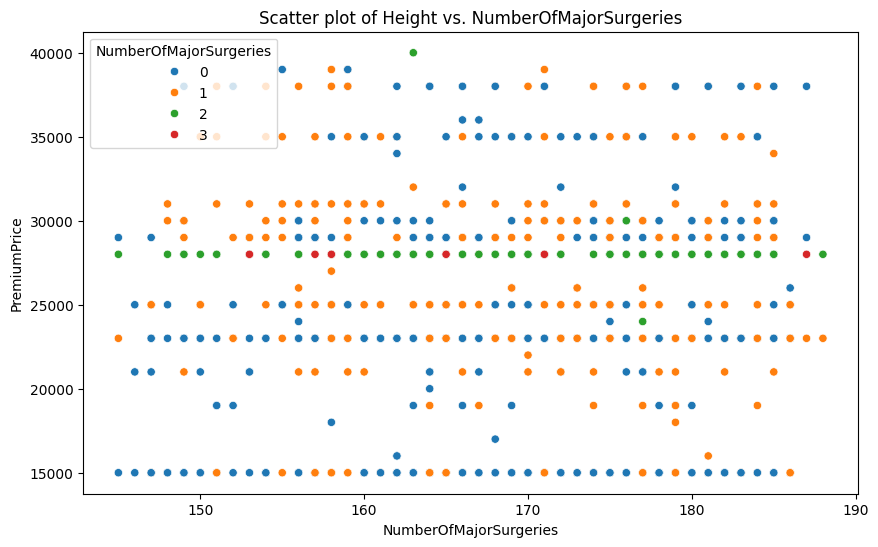

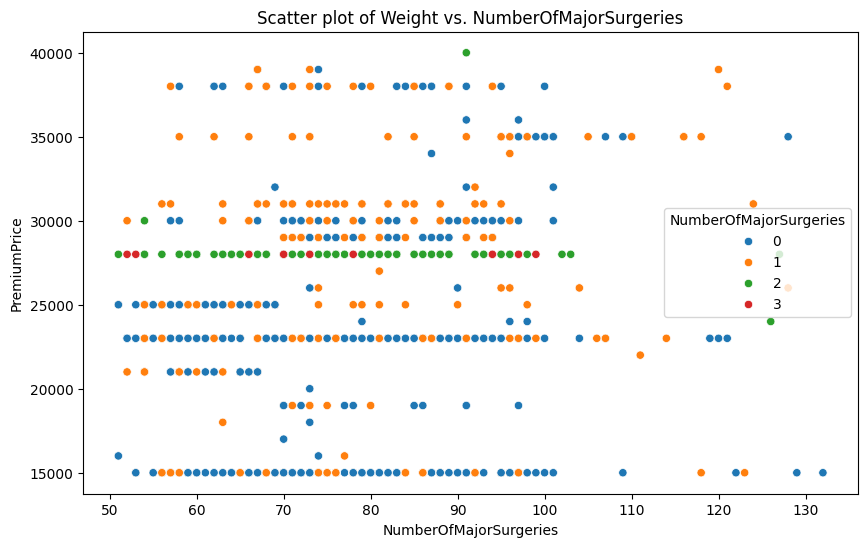

In [ ]:
numerical_columns = ['Age', 'Height', 'Weight']
cat_columns = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

# Plotting the scatter plots
for cat_col in cat_columns:
    for num_col in numerical_columns:
        plt.figure(figsize=(10,6))
        sns.scatterplot(data = df, x=num_col, y='PremiumPrice', hue = cat_col, palette='tab10', legend='full')
        plt.title(f'Scatter plot of {num_col} vs. {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel('PremiumPrice')
        plt.legend(title=cat_col)
        plt.show()

# Insights from scatter plot
* We could see that how the preimums are distributed across each categorical variables.

In [ ]:
# Age Categories
age_bins = [8, 30, 40, 50, 60, 70]
age_labels = ['18-30', '30-40', '40-50', '50-60', '60+']
df['AgeCategory'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels,right=False)

# BMI Categories
bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
df['BMICategory'] = pd.cut(df['BMI'], bins = bmi_bins, labels = bmi_labels, right = False)


df.head()


Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice        BMI AgeCategory    BMICategory  
0                       0         25000  23.725286       40-50  Normal weight  
1                       0         29000  22.530864         60+  Normal weight  
2                       1         23000  23.634033       30-40  Normal weight  
3                       2         28000  27.770313       50-60     Overweight  
4                       1         23000  31.934969       30-40          Obese

# **Feature Engineering**

* We are creating 2 feature age_cat with 5 category and BMI cat with 4 category.

In [ ]:
print(df.groupby('AgeCategory')['PremiumPrice'].mean())
print(df.groupby('BMICategory')['PremiumPrice'].mean())

AgeCategory
18-30    16443.514644
30-40    24142.857143
40-50    26638.297872
50-60    28607.734807
60+      28859.259259
Name: PremiumPrice, dtype: float64
BMICategory
Underweight      22666.666667
Normal weight    23755.555556
Overweight       24236.760125
Obese            25237.942122
Name: PremiumPrice, dtype: float64


* We are looking at the above to create the a different lableing for the ML alogrithm later when we proceed further.

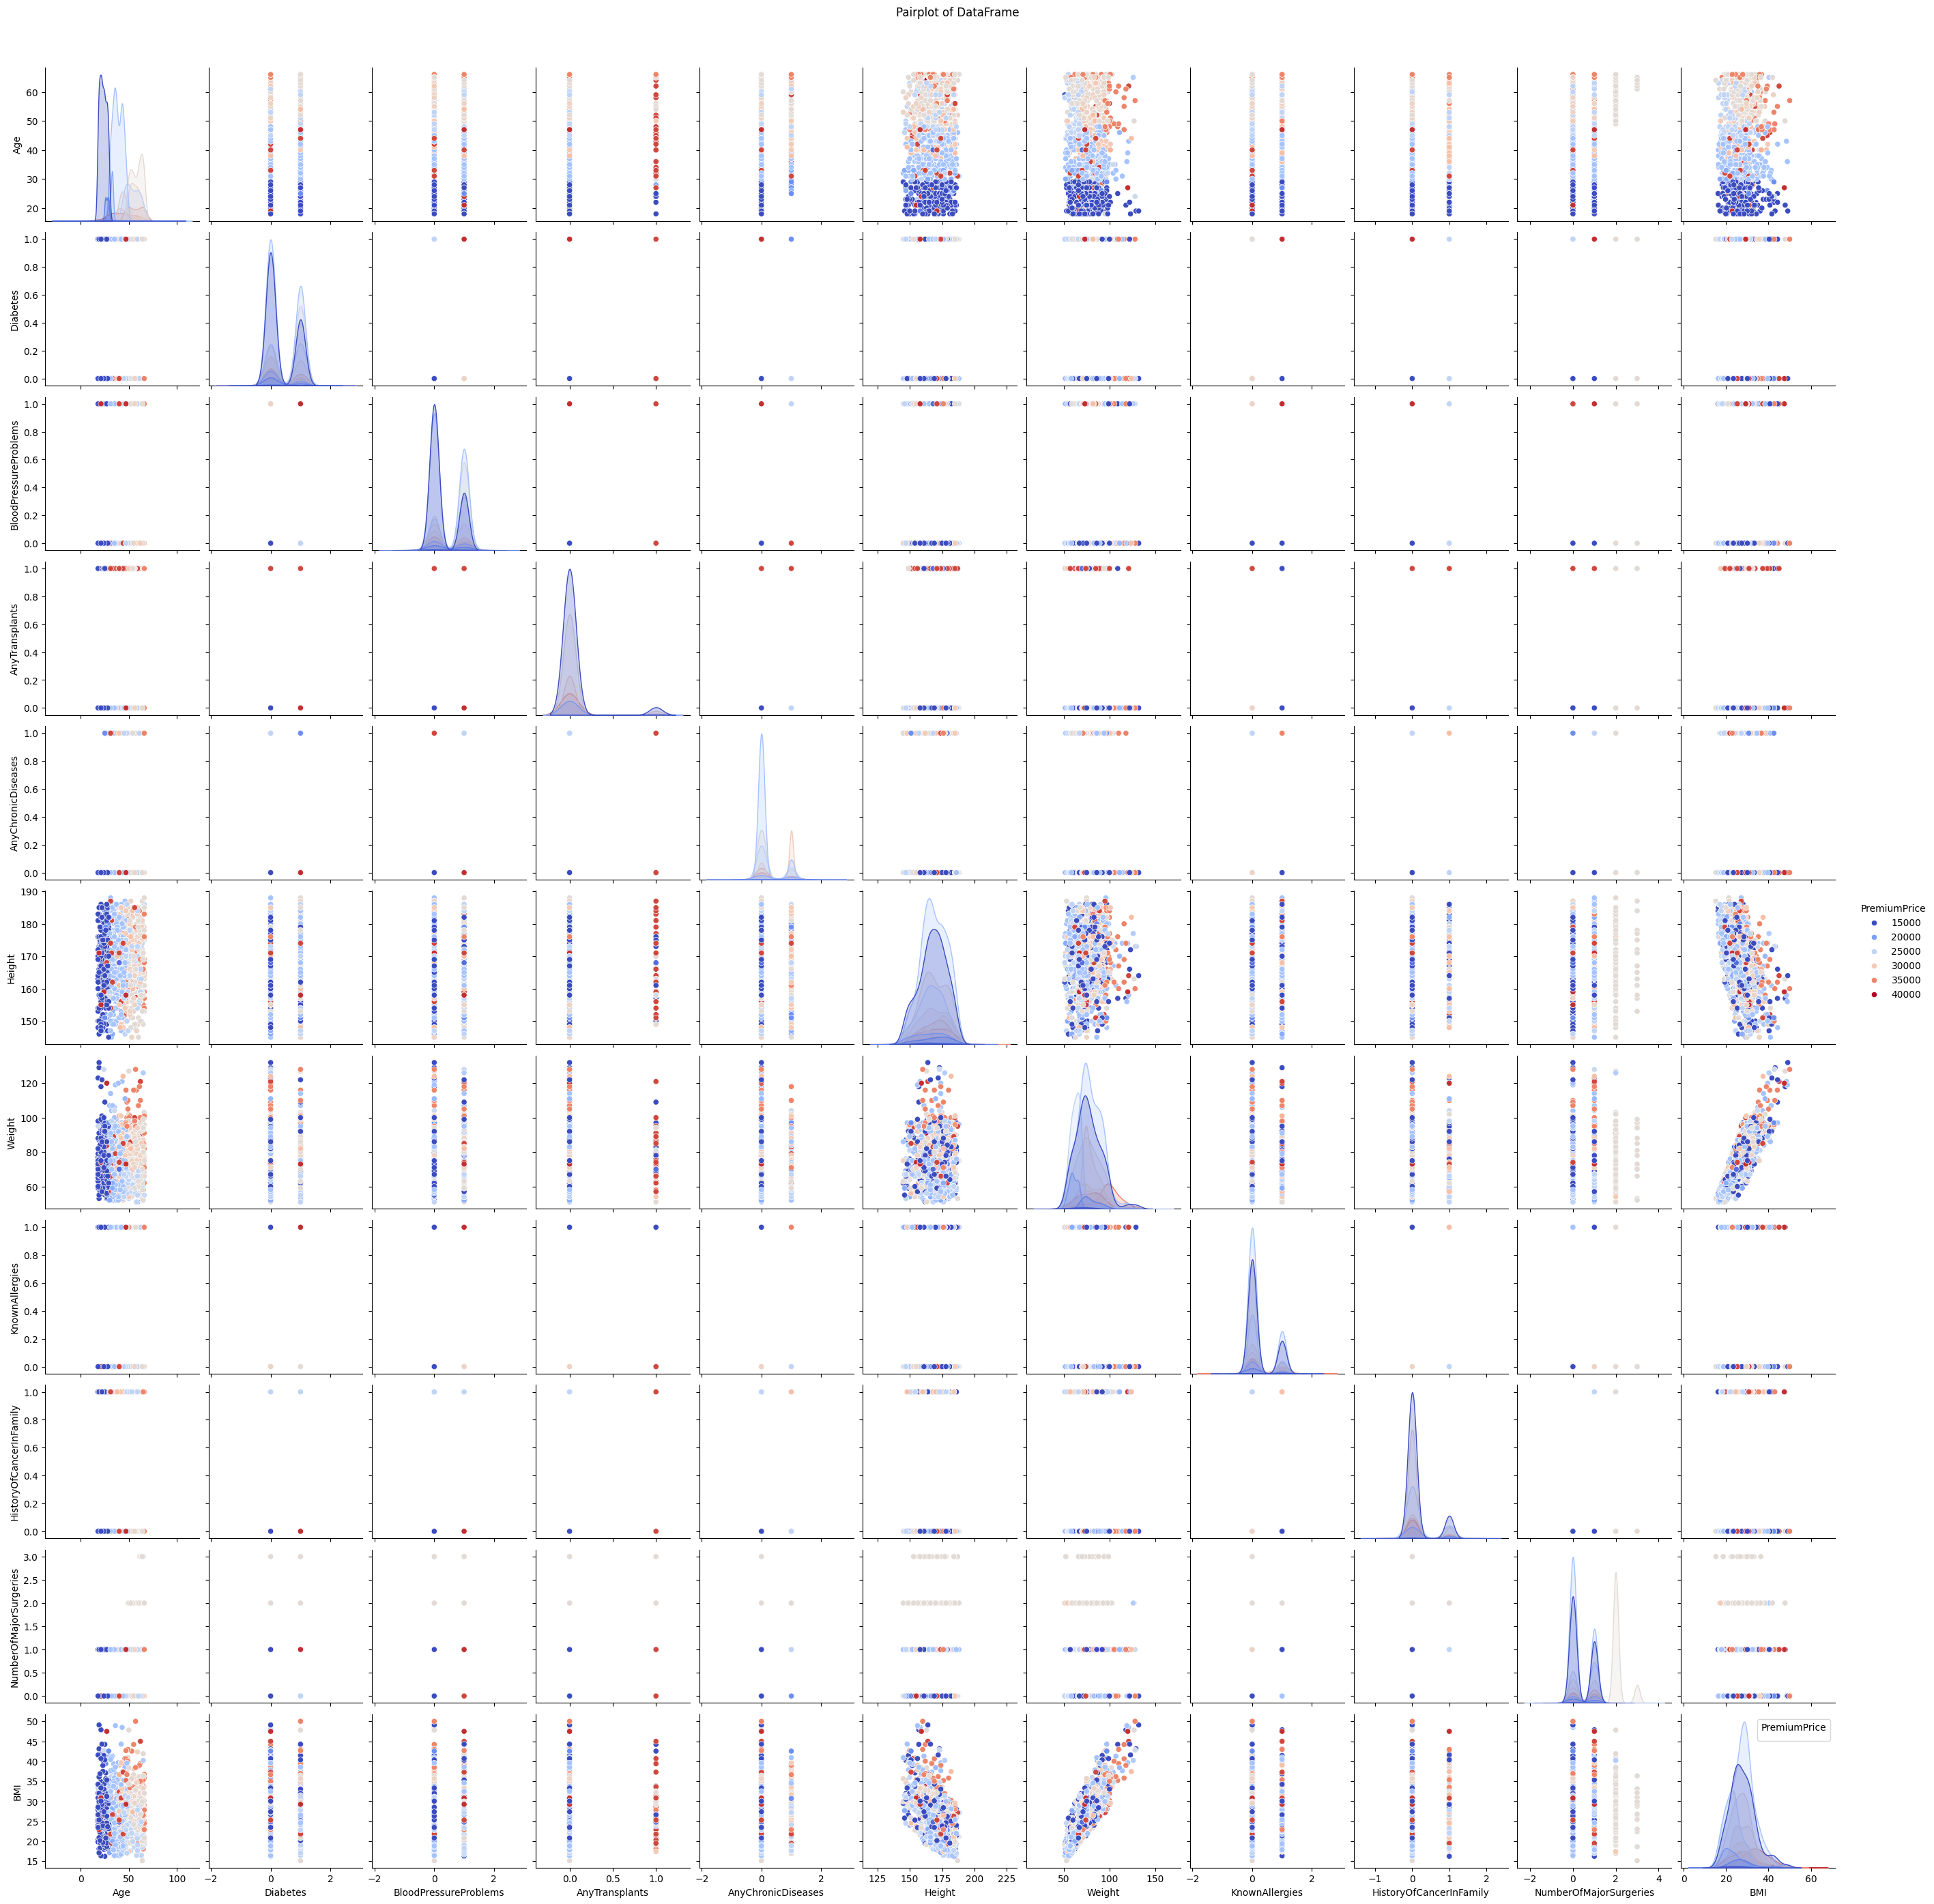

In [ ]:
# Pairplot
pairplot = sns.pairplot(df, hue = 'PremiumPrice', palette='coolwarm')
pairplot.fig.suptitle("Pairplot of DataFrame", y = 1.02)  # Title

# Add legend
plt.legend(title='PremiumPrice')
plt.show()

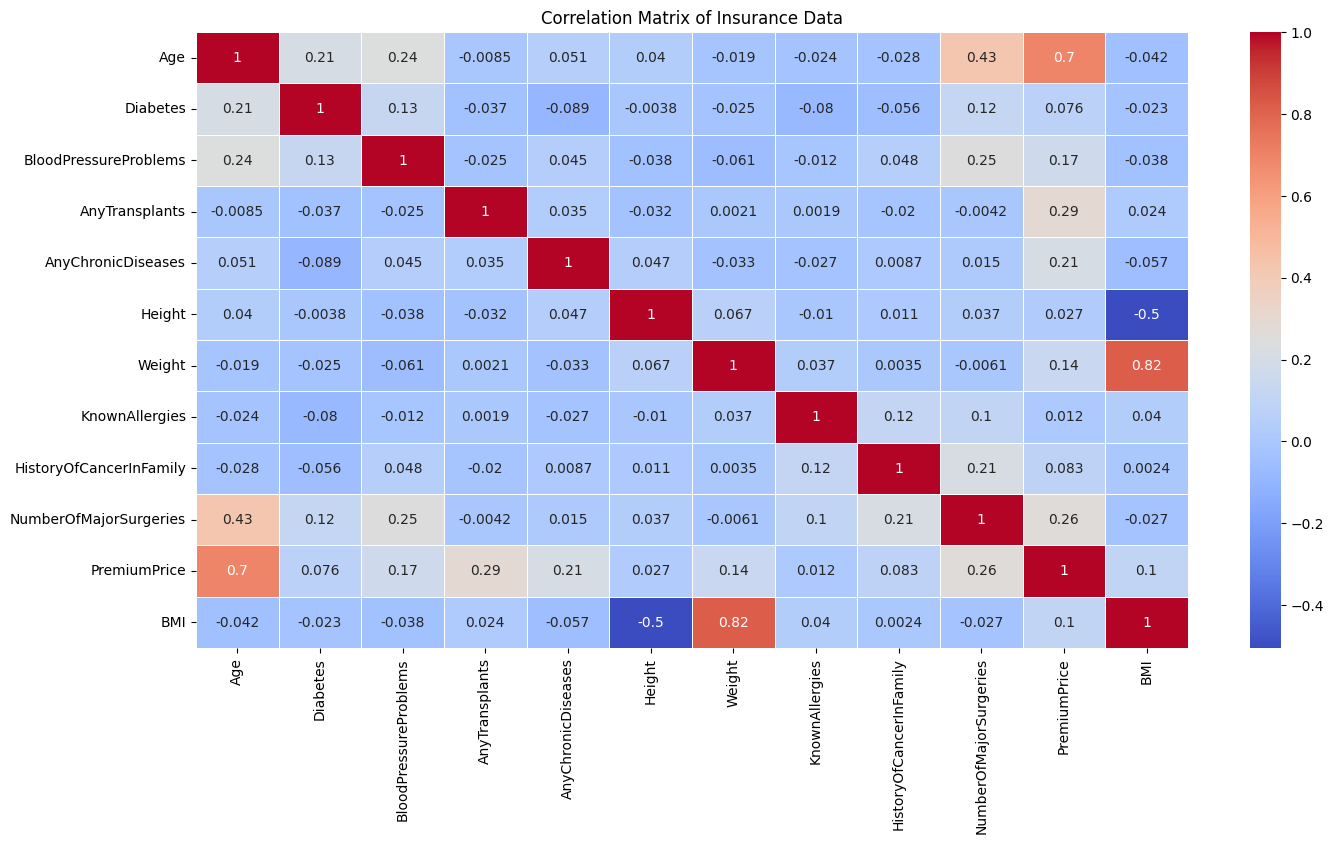

In [ ]:
# Correlation matrix
corr_matrix = df[['Age',
 'Diabetes',
 'BloodPressureProblems',
 'AnyTransplants',
 'AnyChronicDiseases',
 'Height',
 'Weight',
 'KnownAllergies',
 'HistoryOfCancerInFamily',
 'NumberOfMajorSurgeries',
 'PremiumPrice', 'BMI']].corr()

# Heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Insurance Data')
plt.show()


In [ ]:
print(df[['Age', 'Height', 'Weight','PremiumPrice','BMI']].skew())

Age             0.029895
Height         -0.179788
Weight          0.666726
PremiumPrice    0.097639
BMI             0.659701
dtype: float64


In [ ]:
print(df[['Age', 'Height', 'Weight','PremiumPrice','BMI']].kurt())

Age            -1.131720
Height         -0.761975
Weight          0.610280
PremiumPrice   -0.452895
BMI             0.716091
dtype: float64


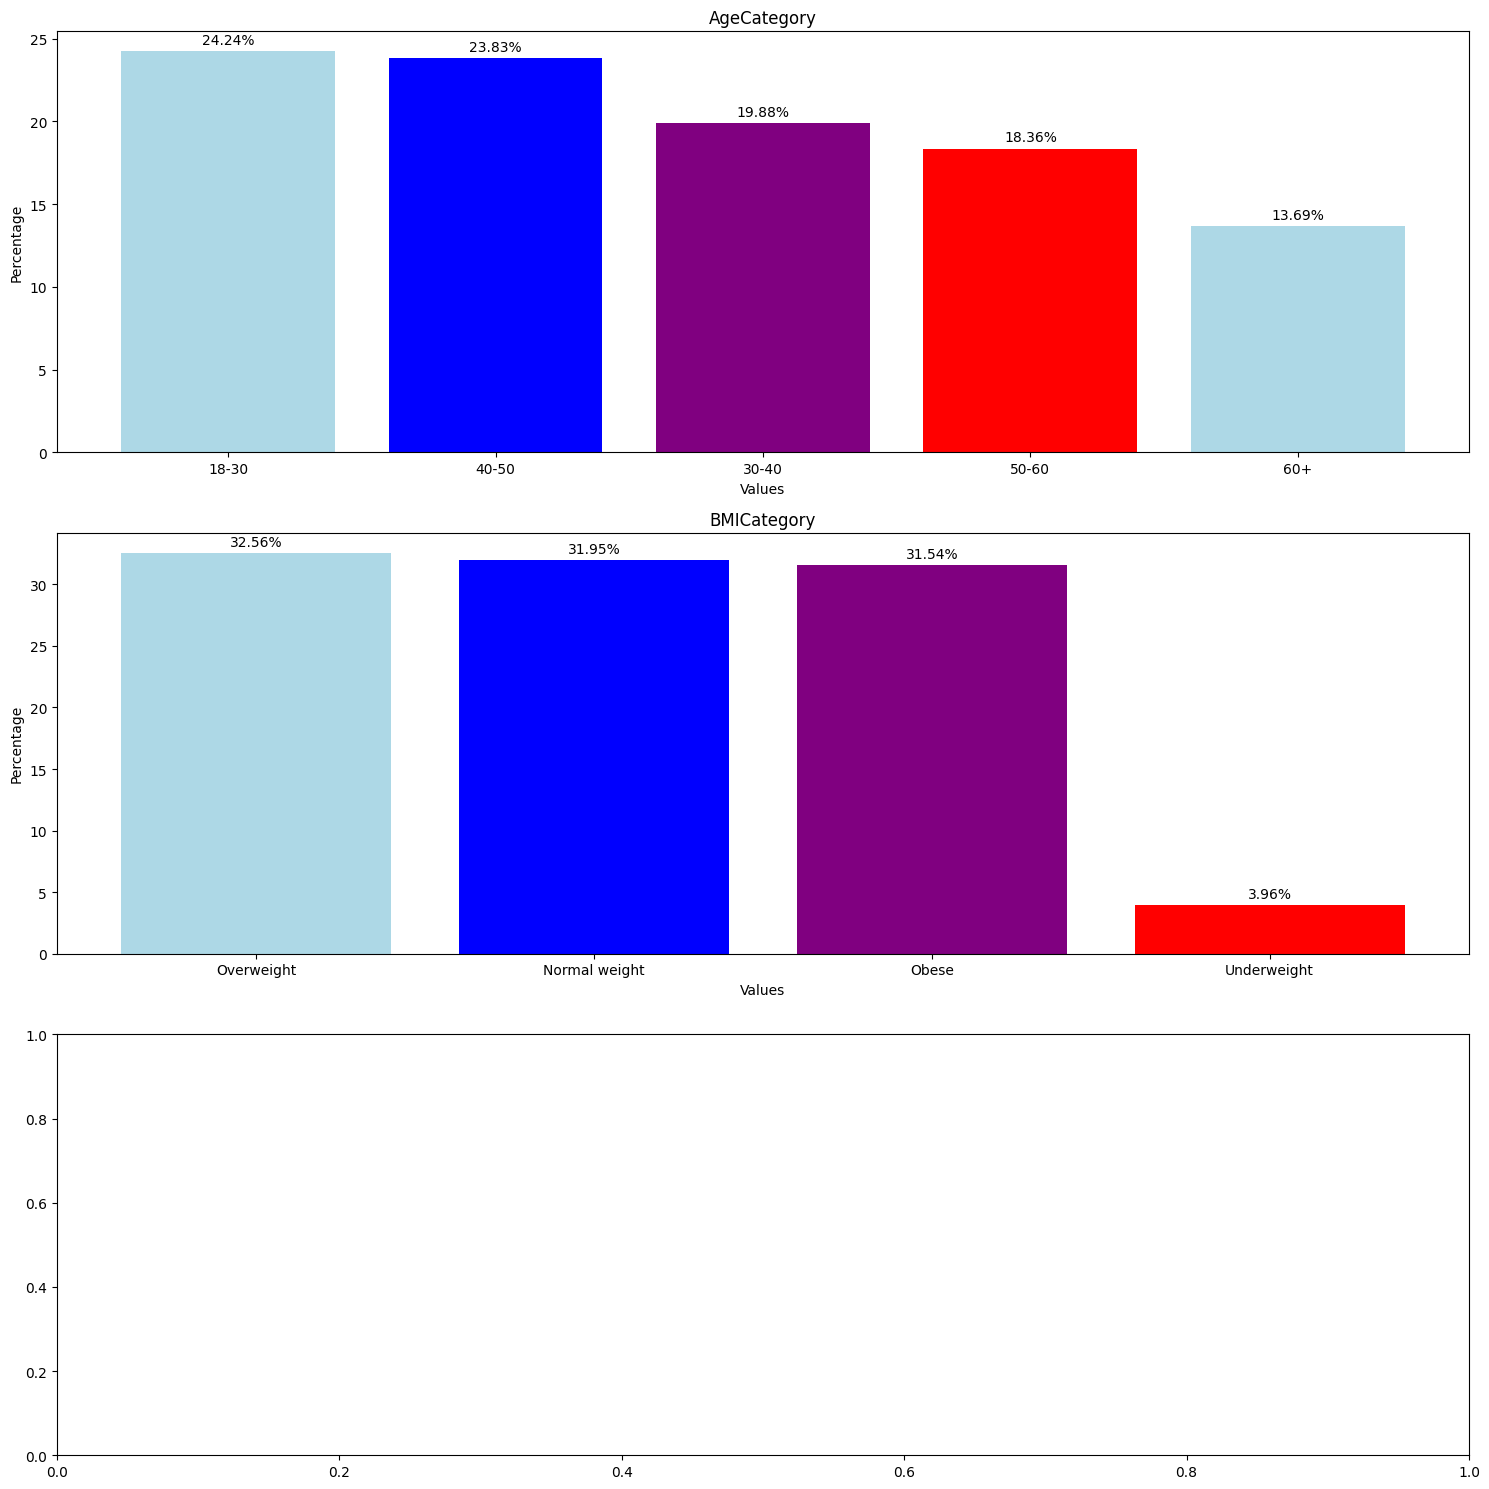

In [ ]:
bar1_plots = ['AgeCategory', 'BMICategory']

colors = ['lightblue', 'blue', 'purple', 'red']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))
axes = axes.flatten()

for ax, column in zip(axes, bar1_plots):
    counts = df[column].value_counts(normalize=True) * 100
    bars = ax.bar(counts.index, counts.values, color=colors)
    ax.set_title(column)
    ax.set_ylabel('Percentage')
    ax.set_xlabel('Values')

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# **Insights on barplots for Age Category and BMI category**

* People of age between 18 to 30 are around 25 percentage who have purchased the insurance policy.

*	People between 40 to 50 are around 23 percentage followed by people between 30 to 40 years of age with 20 percentage.

* People above 50 and less than 60 are around 18 percentage and people above 60 are around 13 percentage.

* 32 percentage each of Normal, obese and overweight people have purchased Health Insurance Premium.

* only 4 percentage of under weight people have purchased the Insurance premium.

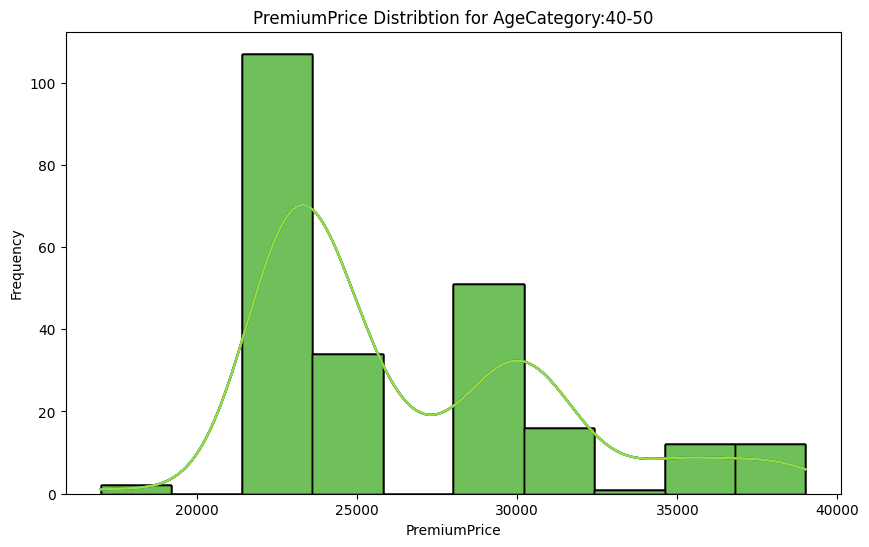

Normality tests for PremiumPrice in AgeCategory - 40-50:
Shapiro-Wilk Test: p-value = 6.925750679689099e-16
D'Agostino's K-squared Test: p-value = 7.157515485819402e-07
Kolmogorov-Smirnov Test: p-value = 0.0
-------------------------------------------------------------


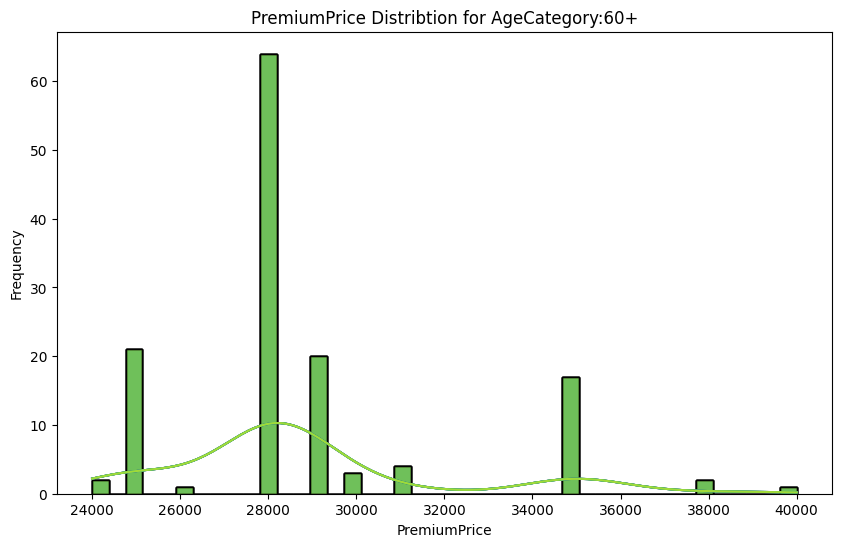

Normality tests for PremiumPrice in AgeCategory - 60+:
Shapiro-Wilk Test: p-value = 2.565095737984134e-12
D'Agostino's K-squared Test: p-value = 2.043416878727039e-07
Kolmogorov-Smirnov Test: p-value = 0.0
-------------------------------------------------------------


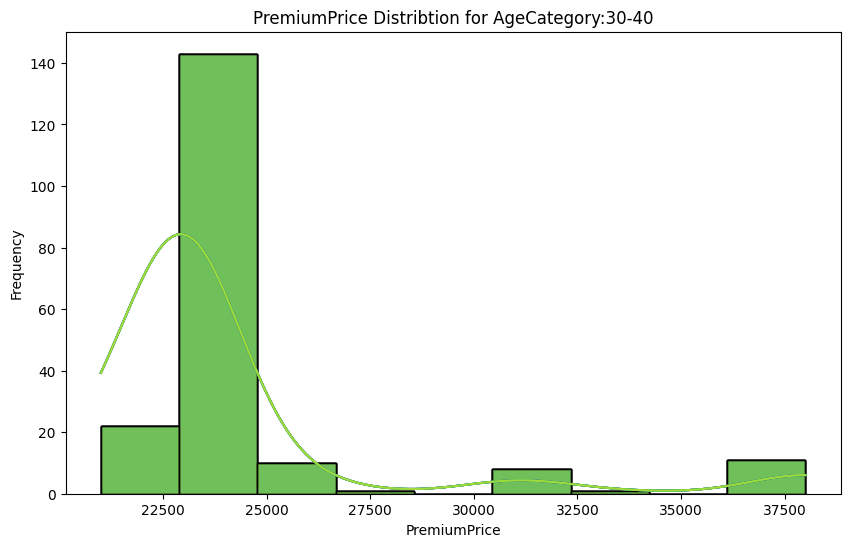

Normality tests for PremiumPrice in AgeCategory - 30-40:
Shapiro-Wilk Test: p-value = 3.16050419888815e-23
D'Agostino's K-squared Test: p-value = 7.379934851536152e-28
Kolmogorov-Smirnov Test: p-value = 0.0
-------------------------------------------------------------


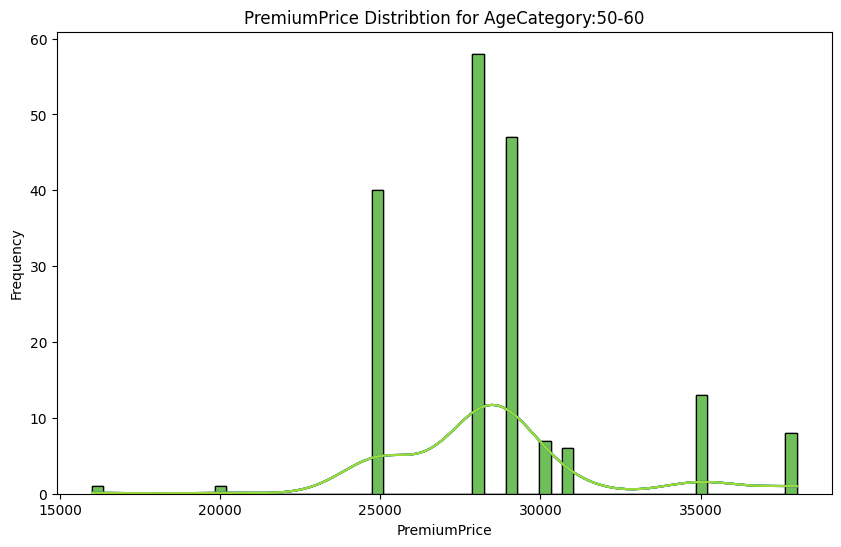

Normality tests for PremiumPrice in AgeCategory - 50-60:
Shapiro-Wilk Test: p-value = 4.299445252680379e-13
D'Agostino's K-squared Test: p-value = 3.9096936959218704e-07
Kolmogorov-Smirnov Test: p-value = 0.0
-------------------------------------------------------------


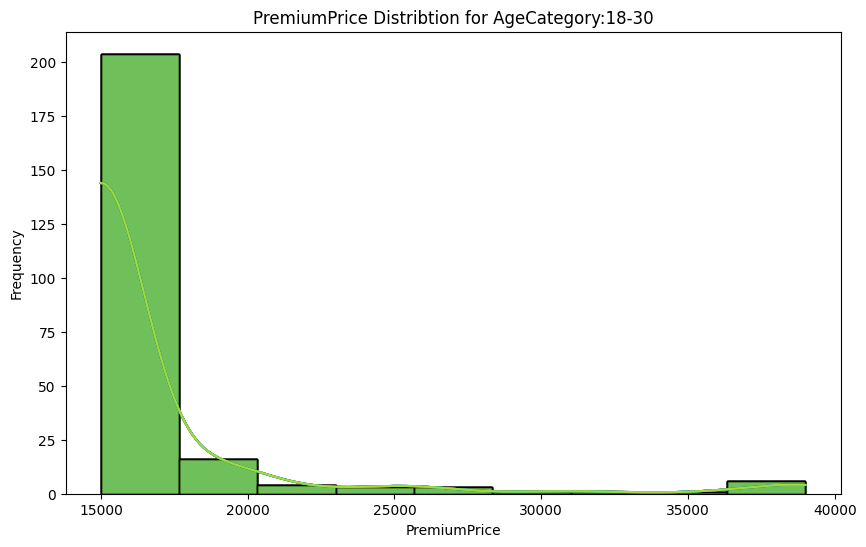

Normality tests for PremiumPrice in AgeCategory - 18-30:
Shapiro-Wilk Test: p-value = 3.7384670521762926e-28
D'Agostino's K-squared Test: p-value = 6.986368159207692e-48
Kolmogorov-Smirnov Test: p-value = 0.0
-------------------------------------------------------------


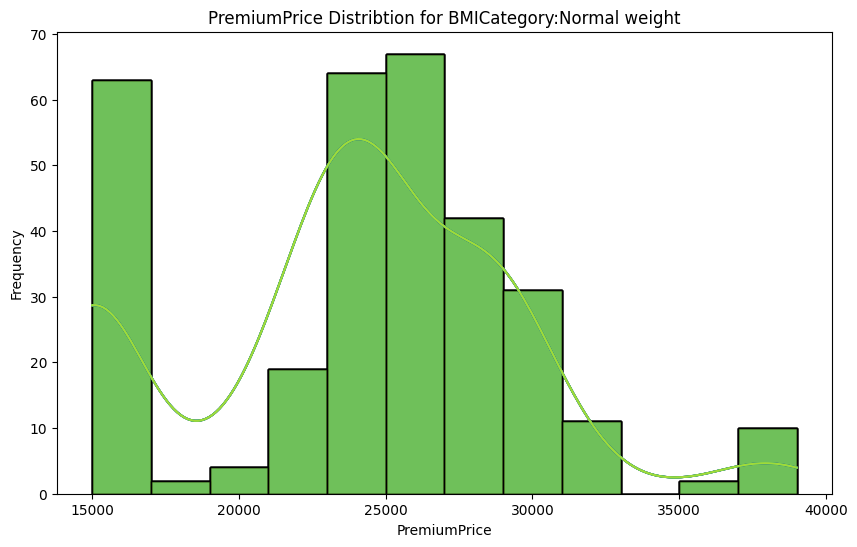

Normality tests for PremiumPrice in BMICategory - Normal weight:
Shapiro-Wilk Test: p-value = 5.1517879541884365e-12
D'Agostino's K-squared Test: p-value = 0.941826092207239
Kolmogorov-Smirnov Test: p-value = 0.0
-------------------------------------------------------------


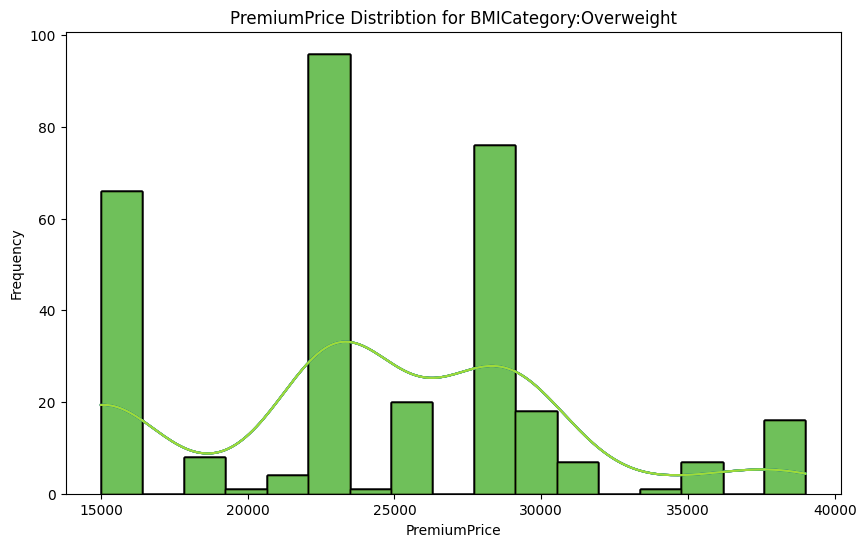

Normality tests for PremiumPrice in BMICategory - Overweight:
Shapiro-Wilk Test: p-value = 2.5548181848325133e-12
D'Agostino's K-squared Test: p-value = 0.22687159954040934
Kolmogorov-Smirnov Test: p-value = 0.0
-------------------------------------------------------------


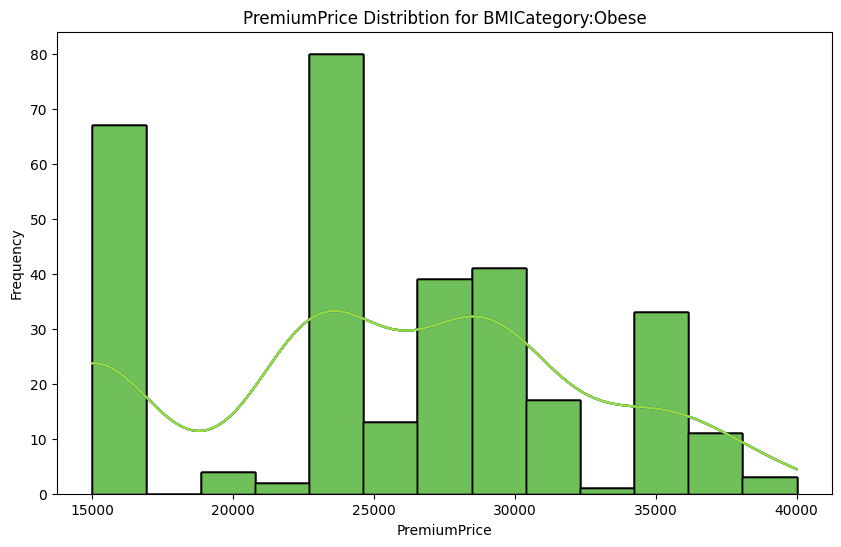

Normality tests for PremiumPrice in BMICategory - Obese:
Shapiro-Wilk Test: p-value = 1.5468929208570333e-11
D'Agostino's K-squared Test: p-value = 8.243554078879476e-08
Kolmogorov-Smirnov Test: p-value = 0.0
-------------------------------------------------------------


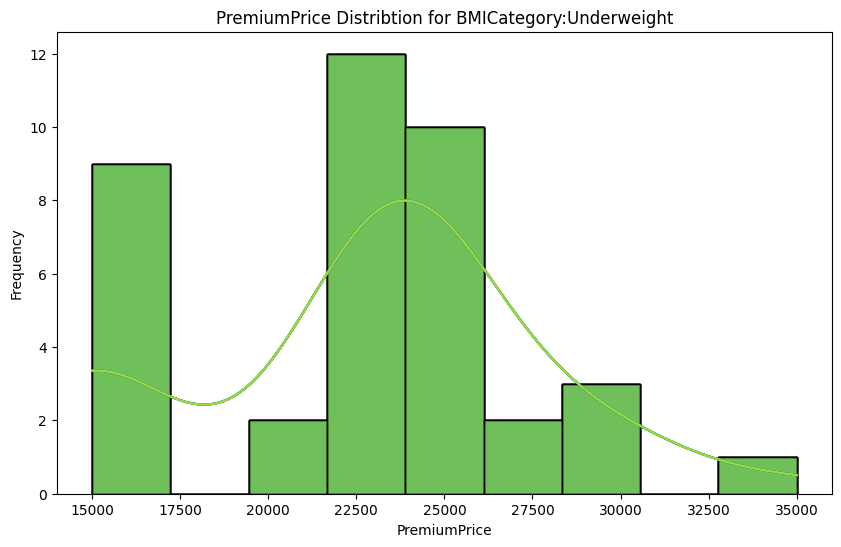

Normality tests for PremiumPrice in BMICategory - Underweight:
Shapiro-Wilk Test: p-value = 0.0006584000226572031
D'Agostino's K-squared Test: p-value = 0.9401158513711616
Kolmogorov-Smirnov Test: p-value = 0.0
-------------------------------------------------------------


In [ ]:
from scipy.stats import shapiro, normaltest, kstest

cat_columns = ['AgeCategory', 'BMICategory']

# Function to plot distributions and check normality
def plot_distribution_and_check_normality(df, cat_col, target_col='PremiumPrice'):
    for category in df[cat_col].unique():
        subset = df[df[cat_col] == category][target_col]

        palette = sns.color_palette("viridis")
        #Plot distribution
        plt.figure(figsize=(10,6))
        for i, color in enumerate(palette[:len(subset)]):
            sns.histplot(subset, kde = True, color=color)
        plt.title(f'{target_col} Distribtion for {cat_col}:{category}')
        plt.xlabel(target_col)
        plt.ylabel('Frequency')
        plt.show()

        # Normality testss
        print(f"Normality tests for {target_col} in {cat_col} - {category}:")
        stat, p_shapiro = shapiro(subset)
        stat, p_dagostino = normaltest(subset)
        stat, p_ks = kstest(subset, 'norm')

        print(f"Shapiro-Wilk Test: p-value = {p_shapiro}")
        print(f"D'Agostino's K-squared Test: p-value = {p_dagostino}")
        print(f"Kolmogorov-Smirnov Test: p-value = {p_ks}")
        print("-------------------------------------------------------------")

# Check distribution and normality for eah categorical column
for col in cat_columns:
    plot_distribution_and_check_normality(df, col)

* From the normailty test and shaprio wilks test on the age and premium category we could ssee that none of the inducvidual category follows normal distribution hence we cannot try to perform the annova test.

# **Hypothesis Testing**

We will beign the hypothesis testing using ttest_ind for all the binaray categorical columns.

In [ ]:
bar_plots = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']

from scipy.stats import ttest_ind
results = {}

for cat in bar_plots:
    df1 = df[df[cat] == 0]['PremiumPrice']
    df2 = df[df[cat] == 1]['PremiumPrice']
    print("-------------------------------------------------------------")
    print(f"Average premium price for {cat} 0: {df1.mean()}")
    print(f"Average premium price for {cat} 1: {df2.mean()}")
    print(f"p-value: {stats.ttest_ind(df1, df2).pvalue}")

    print(f"Null hypothesis H0 : Mean of the premium prices for the policy purchaser having {cat} and not having {cat} are same")
    print(f"alternate hypothesis H1 : Mean of the premium prices for the policy purchaser having {cat} and not having {cat}  are different")

    t_stat, p_val = ttest_ind(df1,df2)
    print(t_stat, p_val)

    if p_val < 0.05:
        print("We reject the null hypothesis")
    else:
        print("We fail to reject the null hypothesis")

    results[cat] = {'t_stat': t_stat, 'p_value': p_val}


print(results)

-------------------------------------------------------------
Average premium price for Diabetes 0: 23931.81818181818
Average premium price for Diabetes 1: 24896.135265700483
p-value: 0.01669009138530611
Null hypothesis H0 : Mean of the premium prices for the policy purchaser having Diabetes and not having Diabetes are same
alternate hypothesis H1 : Mean of the premium prices for the policy purchaser having Diabetes and not having Diabetes  are different
-2.3975629574233563 0.01669009138530611
We reject the null hypothesis
-------------------------------------------------------------
Average premium price for BloodPressureProblems 0: 23356.870229007633
Average premium price for BloodPressureProblems 1: 25448.051948051947
p-value: 1.3100497090721927e-07
Null hypothesis H0 : Mean of the premium prices for the policy purchaser having BloodPressureProblems and not having BloodPressureProblems are same
alternate hypothesis H1 : Mean of the premium prices for the policy purchaser having Bloo

# **Insights from the Hypothesis testing**

* We could see the mean of the Premium prices of the binary categories are different.

<Axes: xlabel='NumberOfMajorSurgeries', ylabel='PremiumPrice'>

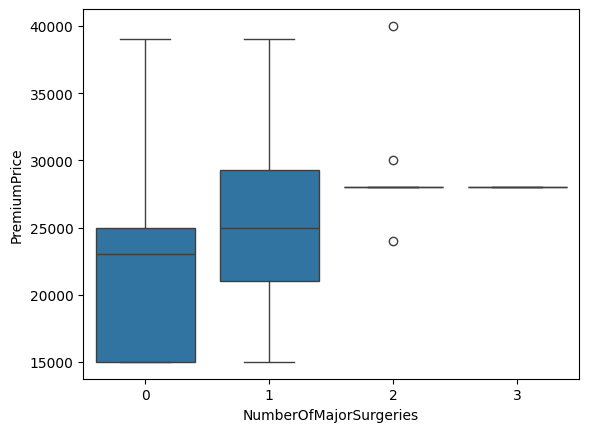

In [ ]:
# NumberOfMajorSurgeries


sns.boxplot(x=df["NumberOfMajorSurgeries"], y=df["PremiumPrice"])


In [ ]:
cat_columns = ['AgeCategory', 'BMICategory']

<Axes: xlabel='AgeCategory', ylabel='PremiumPrice'>

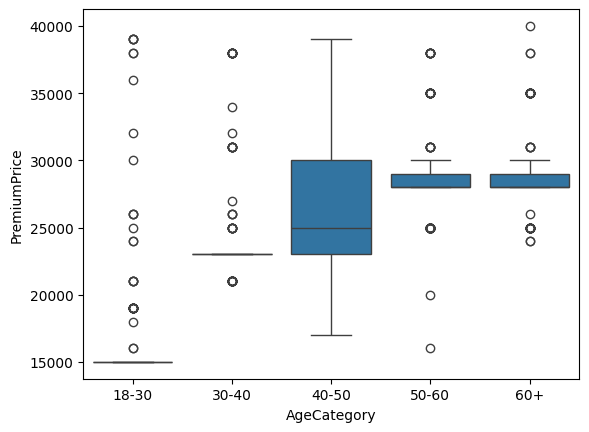

In [ ]:
sns.boxplot(x=df["AgeCategory"], y=df["PremiumPrice"])

<Axes: xlabel='BMICategory', ylabel='PremiumPrice'>

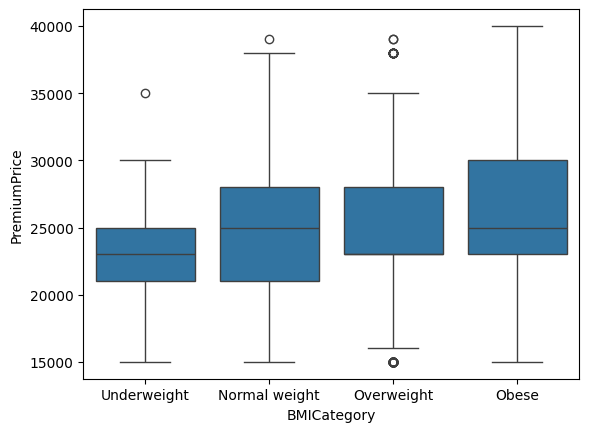

In [ ]:
sns.boxplot(x=df['BMICategory'], y=df["PremiumPrice"])

* ANOVA cant be performed as the mean are different for each group which can be observed from the boxplot

In [ ]:
from scipy.stats import f_oneway

premuim_price_surgery0 = df[df["NumberOfMajorSurgeries"] == 0]["PremiumPrice"]
premuim_price_surgery1 = df[df["NumberOfMajorSurgeries"] == 1]["PremiumPrice"]
premuim_price_surgery2 = df[df["NumberOfMajorSurgeries"] == 2]["PremiumPrice"]
premuim_price_surgery3 = df[df["NumberOfMajorSurgeries"] == 3]["PremiumPrice"]


print(premuim_price_surgery0.mean(), premuim_price_surgery1.mean(), premuim_price_surgery2.mean(), premuim_price_surgery3.mean())

print(f"Null hypothesis H0 : Mean of the premium prices for the policy purchaser having same mean for different number of major surgeries are same")
print(f"alternate hypothesis H1 : Mean of the premium prices for the policy purchaser having different mean for the number of surgery ")


f_stats, p_value = f_oneway(premuim_price_surgery0, premuim_price_surgery1, premuim_price_surgery2, premuim_price_surgery3)

print("test statistic:",f_stats)
print("p_value:",p_value)

print(f"Null hypothesis H0 : Mean of the premium prices for the policy purchaser having same mean for different number of major surgeries are same")
print(f"alternate hypothesis H1 : Mean of the premium prices for the policy purchaser having different mean for the number of surgery ")

if p_value < 0.05:
    print("Reject H0")
    print("Atleast one group have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")


22968.684759916494 24741.935483870966 28084.03361344538 28000.0
Null hypothesis H0 : Mean of the premium prices for the policy purchaser having same mean for different number of major surgeries are same
alternate hypothesis H1 : Mean of the premium prices for the policy purchaser having different mean for the number of surgery 
test statistic: 26.13539359740762
p_value: 2.8711631377228097e-16
Null hypothesis H0 : Mean of the premium prices for the policy purchaser having same mean for different number of major surgeries are same
alternate hypothesis H1 : Mean of the premium prices for the policy purchaser having different mean for the number of surgery 
Reject H0
Atleast one group have different mean


In [ ]:
from scipy.stats import shapiro

# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(premuim_price_surgery0)
print(p_value)

if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

3.901965395277343e-18
Reject H0
Data is not Gaussian


In [ ]:
test_stat, p_value = shapiro(premuim_price_surgery1)
print(p_value)

if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

4.194464670933881e-12
Reject H0
Data is not Gaussian


In [ ]:
# Function to perform bootstrapping and t-test
def bootstrap_ttest(df1, df2, n_iterations=1000):
    t_stats = []
    p_values = []
    for _ in range(n_iterations):
        sample1 = np.random.choice(df1, size=len(df1), replace=True)
        sample2 = np.random.choice(df2, size=len(df2), replace=True)
        t_stat, p_val = ttest_ind(sample1, sample2)
        t_stats.append(t_stat)
        p_values.append(p_val)
    return np.mean(t_stats), np.mean(p_values)

for cat in bar_plots:
    df1 = df[df[cat] == 0]['PremiumPrice']
    df2 = df[df[cat] == 1]['PremiumPrice']
    print("-------------------------------------------------------------")
    print(f"Average premium price for {cat} 0: {df1.mean()}")
    print(f"Average premium price for {cat} 1: {df2.mean()}")

    t_stat, p_val = bootstrap_ttest(df1, df2)

    print(f"Bootstrap t-stat: {t_stat}")
    print(f"Bootstrap p-value: {p_val}")

    print(f"Null hypothesis H0 : Mean of the premium prices for the policy purchaser having {cat} and not having {cat} are same")
    print(f"Alternate hypothesis H1 : Mean of the premium prices for the policy purchaser having {cat} and not having {cat} are different")

    if p_val < 0.05:
        print("We reject the null hypothesis")
    else:
        print("We fail to reject the null hypothesis")

    results[cat] = {'t_stat': t_stat, 'p_value': p_val}

print(results)

-------------------------------------------------------------
Average premium price for Diabetes 0: 23931.81818181818
Average premium price for Diabetes 1: 24896.135265700483
Bootstrap t-stat: -2.327470567593543
Bootstrap p-value: 0.09123370891915275
Null hypothesis H0 : Mean of the premium prices for the policy purchaser having Diabetes and not having Diabetes are same
Alternate hypothesis H1 : Mean of the premium prices for the policy purchaser having Diabetes and not having Diabetes are different
We fail to reject the null hypothesis
-------------------------------------------------------------
Average premium price for BloodPressureProblems 0: 23356.870229007633
Average premium price for BloodPressureProblems 1: 25448.051948051947
Bootstrap t-stat: -5.320735751030583
Bootstrap p-value: 0.00021267830609308076
Null hypothesis H0 : Mean of the premium prices for the policy purchaser having BloodPressureProblems and not having BloodPressureProblems are same
Alternate hypothesis H1 : Me

In [ ]:
from scipy.stats import chi2_contingency

bar_plots = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries','AgeCategory', 'BMICategory']

# function to perform Chi-Square test
def perform_chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1],df[col2])
    chi2, p,dof, ex = chi2_contingency(contingency_table)
    return chi2, p

# Loop through each combination
for i in range(len(bar_plots)):
    for j in range(i+1,len(bar_plots)):
        col1 = bar_plots[i]
        col2 = bar_plots[j]
        chi2, p = perform_chi_square_test(df, col1,col2)
        print(f"Chi-square test between {col1} and {col2}")
        print(f"Chi2 Statistic: {chi2}, p-value: {p}")
        if p < 0.05:
            print("We reject the null hypothesis (dependent)")
        else:
            print("We fail to reject the null hypothesis (independent)")
        print("-------------------------------------------------------------")

Chi-square test between Diabetes and BloodPressureProblems
Chi2 Statistic: 15.571225392078397, p-value: 7.945461025980538e-05
We reject the null hypothesis (dependent)
-------------------------------------------------------------
Chi-square test between Diabetes and AnyTransplants
Chi2 Statistic: 1.0207290599382488, p-value: 0.3123461364949182
We fail to reject the null hypothesis (independent)
-------------------------------------------------------------
Chi-square test between Diabetes and AnyChronicDiseases
Chi2 Statistic: 7.421404393184893, p-value: 0.006445248971042237
We reject the null hypothesis (dependent)
-------------------------------------------------------------
Chi-square test between Diabetes and KnownAllergies
Chi2 Statistic: 5.937672731640452, p-value: 0.014820575766547196
We reject the null hypothesis (dependent)
-------------------------------------------------------------
Chi-square test between Diabetes and HistoryOfCancerInFamily
Chi2 Statistic: 2.700895028884156

# **Insights from Chi square test**
* Few categories likes Diabetes and know allergies have some dependecy with respect to other categorical columns hence for logistic and linear regression models we can remove them.

In [ ]:
df.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice        BMI AgeCategory    BMICategory  
0                       0         25000  23.725286       40-50  Normal weight  
1                       0         29000  22.530864         60+  Normal weight  
2                       1         23000  23.634033       30-40  Normal weight  
3                       2         28000  27.770313       50-60     Overweight  
4                       1         23000  31.934969       30-40          Obese

# Columns to be dropped for model Building

We will be dropping the columns `Diabetes` and `KnownAllergies` from categorical columns and we will drop `age` and `weight` from the numerical columns


# ML Model building

## Data preprocessing

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
binary_columns = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']

# Convert columns to binary (if not already)
for column in binary_columns:
    df[column] = df[column].astype('category')

# If you need to explicitly convert categories to 0/1:
for column in binary_columns:
    df[column] = df[column].cat.codes

# Display the updated DataFrame
print(df.head())


   Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice        BMI AgeCategory    BMICategory  
0                       0         25000  23.725286       40-50  Normal w

In [ ]:
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce


In [ ]:
# List of columns to target encode
target_encode_cols = ['AgeCategory', 'BMICategory']

# Initialize the target encoder
target_encoder = ce.TargetEncoder(cols=target_encode_cols)

# Fit and transform the columns
df_encoded = target_encoder.fit_transform(df[target_encode_cols], df['PremiumPrice'])

# Replace the original columns with the encoded columns
df[target_encode_cols] = df_encoded

# Display the updated DataFrame
print(df.head())


   Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice        BMI   AgeCategory   BMICategory  
0                       0         25000  23.725286  26638.297871  23755

Converting age and BMI into category encoders and then we will convert them into {0,1,2,3,4} for Age category column and {0,1,2,3} for BMI category

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy['AgeCategory'] = df_copy['AgeCategory'].round(0).astype('int64')
df_copy['BMICategory'] = df_copy['BMICategory'].round(0).astype('int64')

In [ ]:
df_copy.BMICategory.unique()

array([23756, 24237, 25238, 22884])

In [ ]:
df_copy.AgeCategory.unique()

array([26638, 28859, 24143, 28608, 16444])

In [ ]:
# Create a mapping dictionary for each category
age_category_mapping = {16444: 0, 24143: 1, 26638: 2, 28608: 3, 28859: 4}
bmi_category_mapping = {22884: 0, 23756: 1, 24237: 2, 25238: 3}

# Replace the values in the DataFrame

df_copy['AgeCategory'] = df_copy['AgeCategory'].map(age_category_mapping)
df_copy['BMICategory'] = df_copy['BMICategory'].map(bmi_category_mapping)


In [ ]:

df.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice        BMI   AgeCategory   BMICategory  
0                       0         25000  23.725286  26638.297871  23755.555556  
1                       0         29000  22.530864  28859.213446  23755.555556  
2                       1         23000  23.634033  24142.857147  23755.555556  
3                       2         28000  27.770313  28607.734372  24236.760125  
4                       1         23000  31.934969  24142.857147  25237.942122

In [ ]:
df_copy.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice        BMI  AgeCategory  BMICategory  
0                       0         25000  23.725286            2            1  
1                       0         29000  22.530864            4            1  
2                       1         23000  23.634033            1            1  
3                       2         28000  27.770313            3            2  
4                       1         23000  31.934969            1            3

In [ ]:
print(df_copy.head())

   Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice        BMI  AgeCategory  BMICategory  
0                       0         25000  23.725286            2          

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      986 non-null    int64  
 1   Diabetes                 986 non-null    int8   
 2   BloodPressureProblems    986 non-null    int8   
 3   AnyTransplants           986 non-null    int8   
 4   AnyChronicDiseases       986 non-null    int8   
 5   Height                   986 non-null    int64  
 6   Weight                   986 non-null    int64  
 7   KnownAllergies           986 non-null    int8   
 8   HistoryOfCancerInFamily  986 non-null    int8   
 9   NumberOfMajorSurgeries   986 non-null    int64  
 10  PremiumPrice             986 non-null    int64  
 11  BMI                      986 non-null    float64
 12  AgeCategory              986 non-null    int64  
 13  BMICategory              986 non-null    int64  
dtypes: float64(1), int64(7), i

In [ ]:
df_copy.shape

(986, 14)

In [ ]:
df_copy.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice        BMI  AgeCategory  BMICategory  
0                       0         25000  23.725286            2            1  
1                       0         29000  22.530864            4            1  
2                       1         23000  23.634033            1            1  
3                       2         28000  27.770313            3            2  
4                       1         23000  31.934969            1            3

In [ ]:
#Dropping the necessary columns
df_copy = df_copy.drop(columns = ['Diabetes','KnownAllergies', 'Weight'])

# Verify the columns are dropped print(df_copy.head())
print(df_copy.head())

<function print>

In [ ]:
print(df_copy.head())

   Age  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  Height  \
0   45                      0               0                   0     155   
1   60                      0               0                   0     180   
2   36                      1               0                   0     158   
3   52                      1               0                   1     183   
4   38                      0               0                   1     166   

   HistoryOfCancerInFamily  NumberOfMajorSurgeries  PremiumPrice        BMI  \
0                        0                       0         25000  23.725286   
1                        0                       0         29000  22.530864   
2                        0                       1         23000  23.634033   
3                        0                       2         28000  27.770313   
4                        0                       1         23000  31.934969   

   AgeCategory  BMICategory  
0            2            1  
1 

Splitting X with all features and y with target column to further split them into train test

In [ ]:
# Define the target variable and dependent variable
target = 'PremiumPrice'
dependent_vars = [col for col in df_copy.columns if col != target]

#split the dataset into train and test sets
X = df_copy[dependent_vars]
y = df_copy[target]

In [ ]:
X

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0     45         0                      0               0                   0   
1     60         1                      0               0                   0   
2     36         1                      1               0                   0   
3     52         1                      1               0                   1   
4     38         0                      0               0                   1   
..   ...       ...                    ...             ...                 ...   
981   18         0                      0               0                   0   
982   64         1                      1               0                   0   
983   56         0                      1               0                   0   
984   47         1                      1               0                   0   
985   21         0                      0               0                   0   

     Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0       155      57               0                        0   
1       180      73               0                        0   
2       158      59               0                        0   
3       183      93               0                        0   
4       166      88               0                        0   
..      ...     ...             ...                      ...   
981     169      67               0                        0   
982     153      70               0                        0   
983     155      71               0                        0   
984     158      73               1                        0   
985     158      75               1                        0   

     NumberOfMajorSurgeries        BMI  AgeCategory  BMICategory  
0                         0  23.725286            2            1  
1                         0  22.530864            4            1  
2                         1  23.634033            1            1  
3                         2  27.770313            3            2  
4                         1  31.934969            1            3  
..                      ...        ...          ...          ...  
981                       0  23.458562            0            1  
982                       3  29.903029            4            3  
983                       1  29.552549            3            2  
984                       1  29.242109            2            2  
985                       1  30.043262            0            3  

[986 rows x 13 columns]

In [ ]:
y

0      25000
1      29000
2      23000
3      28000
4      23000
       ...  
981    15000
982    28000
983    29000
984    39000
985    15000
Name: PremiumPrice, Length: 986, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(788, 13) (198, 13) (788,) (198,)


Checking their shape helps to identify if they are split with the right proportions.

In [ ]:
X

Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0           0                      0               0                   0   
1           1                      0               0                   0   
2           1                      1               0                   0   
3           1                      1               0                   1   
4           0                      0               0                   1   
..        ...                    ...             ...                 ...   
981         0                      0               0                   0   
982         1                      1               0                   0   
983         0                      1               0                   0   
984         1                      1               0                   0   
985         0                      0               0                   0   

     Height  KnownAllergies  HistoryOfCancerInFamily  NumberOfMajorSurgeries  \
0       155               0                        0                       0   
1       180               0                        0                       0   
2       158               0                        0                       1   
3       183               0                        0                       2   
4       166               0                        0                       1   
..      ...             ...                      ...                     ...   
981     169               0                        0                       0   
982     153               0                        0                       3   
983     155               0                        0                       1   
984     158               1                        0                       1   
985     158               1                        0                       1   

     AgeCategory  BMICategory  
0              2            1  
1              4            1  
2              1            1  
3              3            2  
4              1            3  
..           ...          ...  
981            0            1  
982            4            3  
983            3            2  
984            2            2  
985            0            3  

[986 rows x 10 columns]

Since we are first trying out linear Regression we will use minmax scaler for the numerical columns as the data is not normally distributed in the numerical columns.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

X_train_m = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_m = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


# initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_m, y_train)

# Make predictions
y_pred = model.predict(X_test_m)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Display coefficients
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coef_df)

Mean Absolute Error: 2602.2319853935646
Mean Squared Error: 12278380.819083586
R-squared: 0.7120643285244406
                          Coefficient
Age                      10407.421805
Diabetes                  -368.149975
BloodPressureProblems      132.409950
AnyTransplants            7495.977440
AnyChronicDiseases        2601.856253
Height                    1128.141161
Weight                    3202.317998
KnownAllergies             167.264366
HistoryOfCancerInFamily   2067.559215
NumberOfMajorSurgeries   -2302.325042
BMI                      -1023.990803
AgeCategory               4598.297986
BMICategory               2491.096366


* We could see that the Linear Regression model performs 71% r2 score.
* We could see that Age and AnyTransplants have higher coeff for model prediction.         

In [ ]:
y_pred = model.predict(X_train_m)
print(f'Train Score: {np.round(r2_score(y_train, y_pred)*100,2)}%')

y_pred = model.predict(X_test_m)
print(f'Test Score: {np.round(r2_score(y_test, y_pred)*100,2)}%')


Train Score: 62.82%
Test Score: 71.21%


In [ ]:
X_train_m.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'BMI',
       'AgeCategory', 'BMICategory'],
      dtype='object')

In [ ]:
# initialize and train the linear regression model
model_mod_1 = LinearRegression()
model_mod_1.fit(X_train_m[['BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'BMI',
       'AgeCategory', 'BMICategory']], y_train)

# Make predictions
y_pred = model_mod_1.predict(X_test_m[['BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'BMI',
       'AgeCategory', 'BMICategory']])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Display coefficients
coef_df = pd.DataFrame(model_mod_1.coef_, X_train_m[['BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'BMI',
       'AgeCategory', 'BMICategory']].columns, columns=['Coefficient'])
print(coef_df)

Mean Absolute Error: 2698.755778808336
Mean Squared Error: 12779495.787474524
R-squared: 0.7003128706542109
                          Coefficient
BloodPressureProblems      156.988890
AnyTransplants            7486.199312
AnyChronicDiseases        2775.730957
Height                    2625.573395
KnownAllergies             182.431299
HistoryOfCancerInFamily   1947.848556
NumberOfMajorSurgeries   -2292.982705
BMI                       2972.138410
AgeCategory              13161.572998
BMICategory               2193.237530


* We tried another Linear regression model without the features of Age, wieght and Diabetes we have getting an r2 score of 70%.

* Hence we will go with the previous set of features.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Drop the features one by one and recalculate VIF
while True:
    vif = calculate_vif(X)
    max_vif = vif.loc[vif['VIF'].idxmax()]
    if max_vif['VIF'] > 10:
        print(f"Dropping {max_vif['Features']} with VIF {max_vif['VIF']}")
        X = X.drop(columns=[max_vif['Features']])
    else:
        break

print("Final VIF values:")
print(calculate_vif(X))


Dropping Age with VIF 227.22868793933873
Dropping Weight with VIF 129.87993946102108
Dropping BMI with VIF 87.30168753884766
Final VIF values:
                  Features       VIF
0                 Diabetes  1.841852
1    BloodPressureProblems  2.068747
2           AnyTransplants  1.062261
3       AnyChronicDiseases  1.243223
4                   Height  7.828096
5           KnownAllergies  1.320343
6  HistoryOfCancerInFamily  1.222034
7   NumberOfMajorSurgeries  2.463259
8              AgeCategory  3.566427
9              BMICategory  5.012324


* From the above VIF factors we can see that these 9 features Diabetes,BloodPressureProblems,AnyTransplant, AnyChronicDiseases, height, knownAllergies, History of Cancer in Family, Number of major Surgeries, Age Category, BMI Category are very important.

In [ ]:
X

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0     45         0                      0               0                   0   
1     60         1                      0               0                   0   
2     36         1                      1               0                   0   
3     52         1                      1               0                   1   
4     38         0                      0               0                   1   
..   ...       ...                    ...             ...                 ...   
981   18         0                      0               0                   0   
982   64         1                      1               0                   0   
983   56         0                      1               0                   0   
984   47         1                      1               0                   0   
985   21         0                      0               0                   0   

     Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0       155      57               0                        0   
1       180      73               0                        0   
2       158      59               0                        0   
3       183      93               0                        0   
4       166      88               0                        0   
..      ...     ...             ...                      ...   
981     169      67               0                        0   
982     153      70               0                        0   
983     155      71               0                        0   
984     158      73               1                        0   
985     158      75               1                        0   

     NumberOfMajorSurgeries        BMI  AgeCategory  BMICategory  
0                         0  23.725286            2            1  
1                         0  22.530864            4            1  
2                         1  23.634033            1            1  
3                         2  27.770313            3            2  
4                         1  31.934969            1            3  
..                      ...        ...          ...          ...  
981                       0  23.458562            0            1  
982                       3  29.903029            4            3  
983                       1  29.552549            3            2  
984                       1  29.242109            2            2  
985                       1  30.043262            0            3  

[986 rows x 13 columns]

In [ ]:
from sklearn.linear_model import LogisticRegression

# initialize and train the Logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train_m, y_train)

# Make predictions
y_pred = model_lr.predict(X_test_m)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Display coefficients
# Print the train and test score
train_score = model_lr.score(X_train_m, y_train)
test_score = model_lr.score(X_test_m, y_test)

print("Train score DecisionTreeRegressor:", train_score)
print("Test score DecisionTreeRegressor:", test_score)

y_pred = model_lr.predict(X_train_m)
print(f'Train Score: {np.round(r2_score(y_train, y_pred)*100,2)}%')

y_pred = model_lr.predict(X_test_m)
print(f'Test Score: {np.round(r2_score(y_test, y_pred)*100,2)}%')

Mean Absolute Error: 1222.2222222222222
Mean Squared Error: 8505050.505050505
R-squared: 0.8005512726646281
Train score DecisionTreeRegressor: 0.8121827411167513
Test score DecisionTreeRegressor: 0.7626262626262627
Train Score: 70.52%
Test Score: 80.06%


We could see that the model might slightly overfit for logistic regression.

In [ ]:
X_train_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      788 non-null    float64
 1   Diabetes                 788 non-null    float64
 2   BloodPressureProblems    788 non-null    float64
 3   AnyTransplants           788 non-null    float64
 4   AnyChronicDiseases       788 non-null    float64
 5   Height                   788 non-null    float64
 6   Weight                   788 non-null    float64
 7   KnownAllergies           788 non-null    float64
 8   HistoryOfCancerInFamily  788 non-null    float64
 9   NumberOfMajorSurgeries   788 non-null    float64
 10  BMI                      788 non-null    float64
 11  AgeCategory              788 non-null    float64
 12  BMICategory              788 non-null    float64
dtypes: float64(13)
memory usage: 80.2 KB


In [ ]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model_lr = sm.OLS(y_train, X_sm)
results = model_lr.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          2.61e-156
Time:                        15:45:19   Log-Likelihood:                -7605.5
No. Observations:                 788   AIC:                         1.524e+04
Df Residuals:                     774   BIC:                         1.530e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4

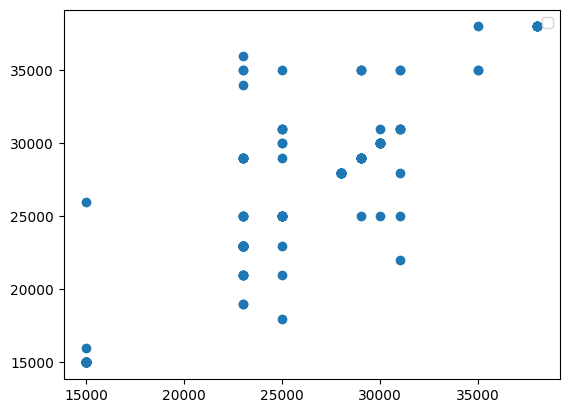

In [ ]:
fig = plt.figure()
plt.scatter(y_pred,y_test)
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
# Initialize the model
dt_model = DecisionTreeRegressor()

# Perform cross-validation
dt_cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='r2')

#fit the model
dt_model.fit(X_train, y_train)

# Predict and evaluate
dt_predictions = dt_model.predict(X_test)
dt_r2 = r2_score(y_test, dt_predictions)
mae_dt = mean_absolute_error(y_test, dt_predictions)
mse_dt = mean_squared_error(y_test, dt_predictions)

print("Mean Absolute Error:", mae_dt)
print("Mean Squared Error:", mse_dt)
print("Decision Tree R²:", dt_r2)
print("Cross-validated R² scores:", dt_cv_scores)

# Print the train and test score
train_score = dt_model.score(X_train, y_train)
test_score = dt_model.score(X_test, y_test)

print(f"Train score DecisionTreeRegressor {round(train_score,2)*100} %:")
print(f"Test score DecisionTreeRegressor {round(test_score,2)*100} %:")

Mean Absolute Error: 1383.8383838383838
Mean Squared Error: 17070707.07070707
Decision Tree R²: 0.599681295490762
Cross-validated R² scores: [0.54685803 0.62591385 0.72248682 0.69462981 0.67020115]
Train score DecisionTreeRegressor 100.0 %:
Test score DecisionTreeRegressor 60.0 %:


* For Descision Tree model we could see that the model underfits as the test score is lessor comoared to the trainig score.

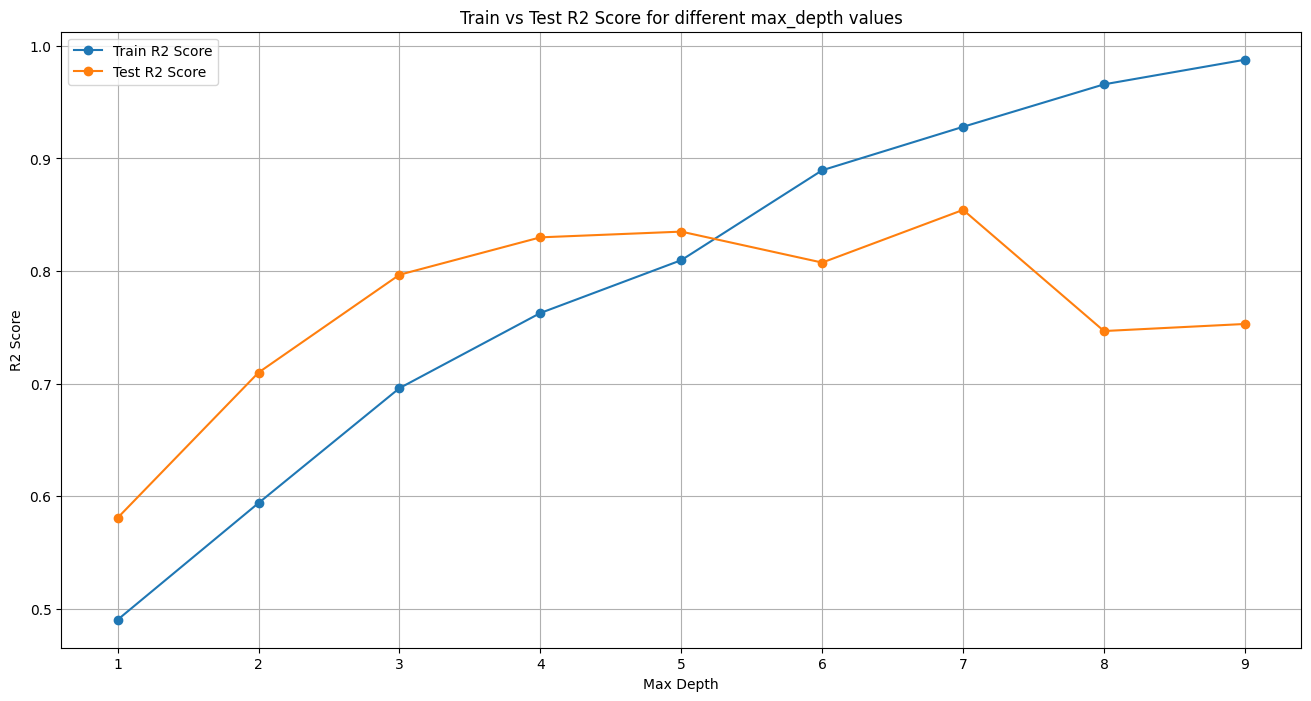

In [ ]:
train_scores = []
test_scores = []

for i in range(1, 10):
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)

    # Calculate r2 scores for train and test
    train_r2 = r2_score(y_train, model.predict(X_train))
    test_r2 = r2_score(y_test, model.predict(X_test))

    # Append the scores to lists
    train_scores.append(train_r2)
    test_scores.append(test_r2)

# Plot the results
plt.figure(figsize=(16,8))
plt.plot(range(1, 10), train_scores, label='Train R2 Score', marker='o')
plt.plot(range(1, 10), test_scores, label='Test R2 Score', marker='o')

plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.title('Train vs Test R2 Score for different max_depth values')
plt.legend()
plt.grid(True)
plt.show()

* From the above grpah we can see at a max depth of 5 we get a decent train and test score around 82% to 84% for DecisionTreeRegressor.

In [ ]:
model_dtr = DecisionTreeRegressor(max_depth=5)
model_dtr.fit(X_train, y_train)

y_pred = model_dtr.predict(X_train)
print(f'Train Score: {np.round(r2_score(y_train, y_pred)*100,2)}%')

y_pred = model_dtr.predict(X_test)
print(f'Test Score: {np.round(r2_score(y_test, y_pred)*100,2)}%')

Train Score: 80.96%
Test Score: 83.5%


In [ ]:
!pip install pydot

In [ ]:
! pip install graphviz


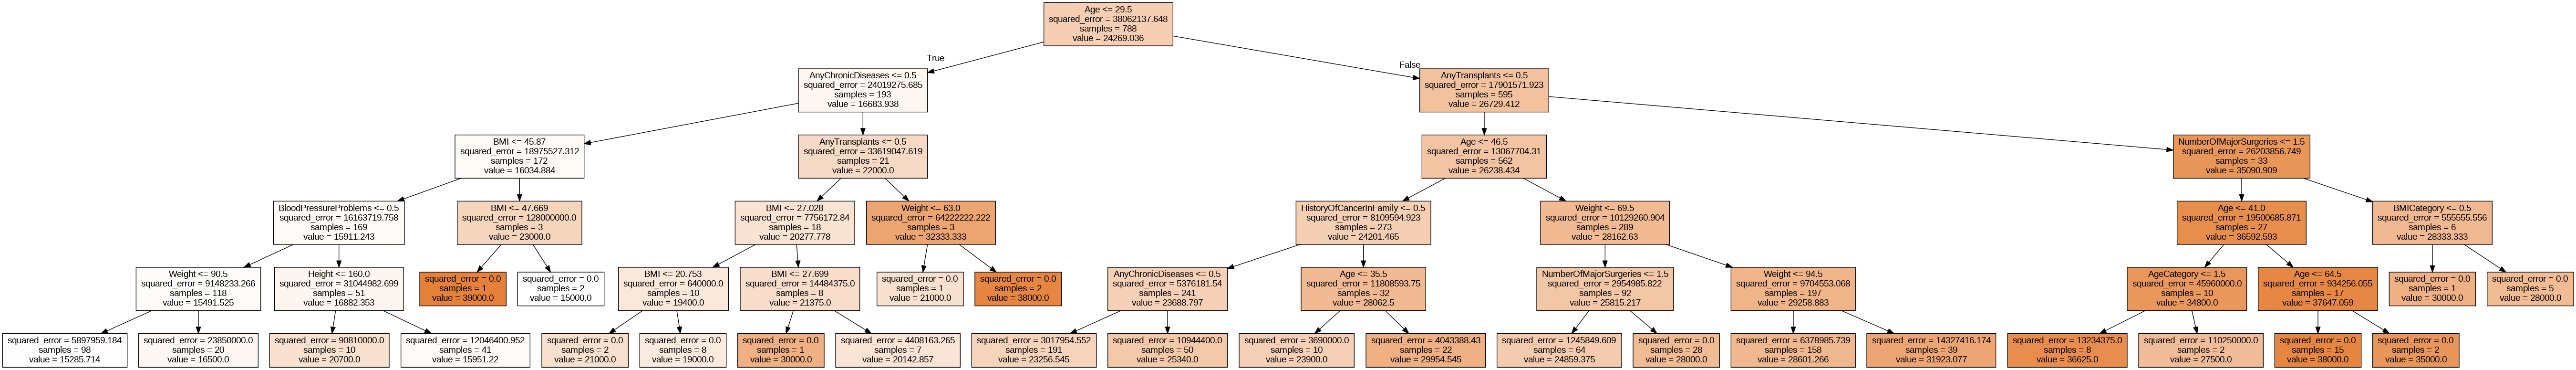

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X_train.columns)

dot_data = StringIO()
export_graphviz(model_dtr, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

* The above is the Descision tree that is built by the algorithm the visual representation is give to show on how the Algorithm has built the tree.

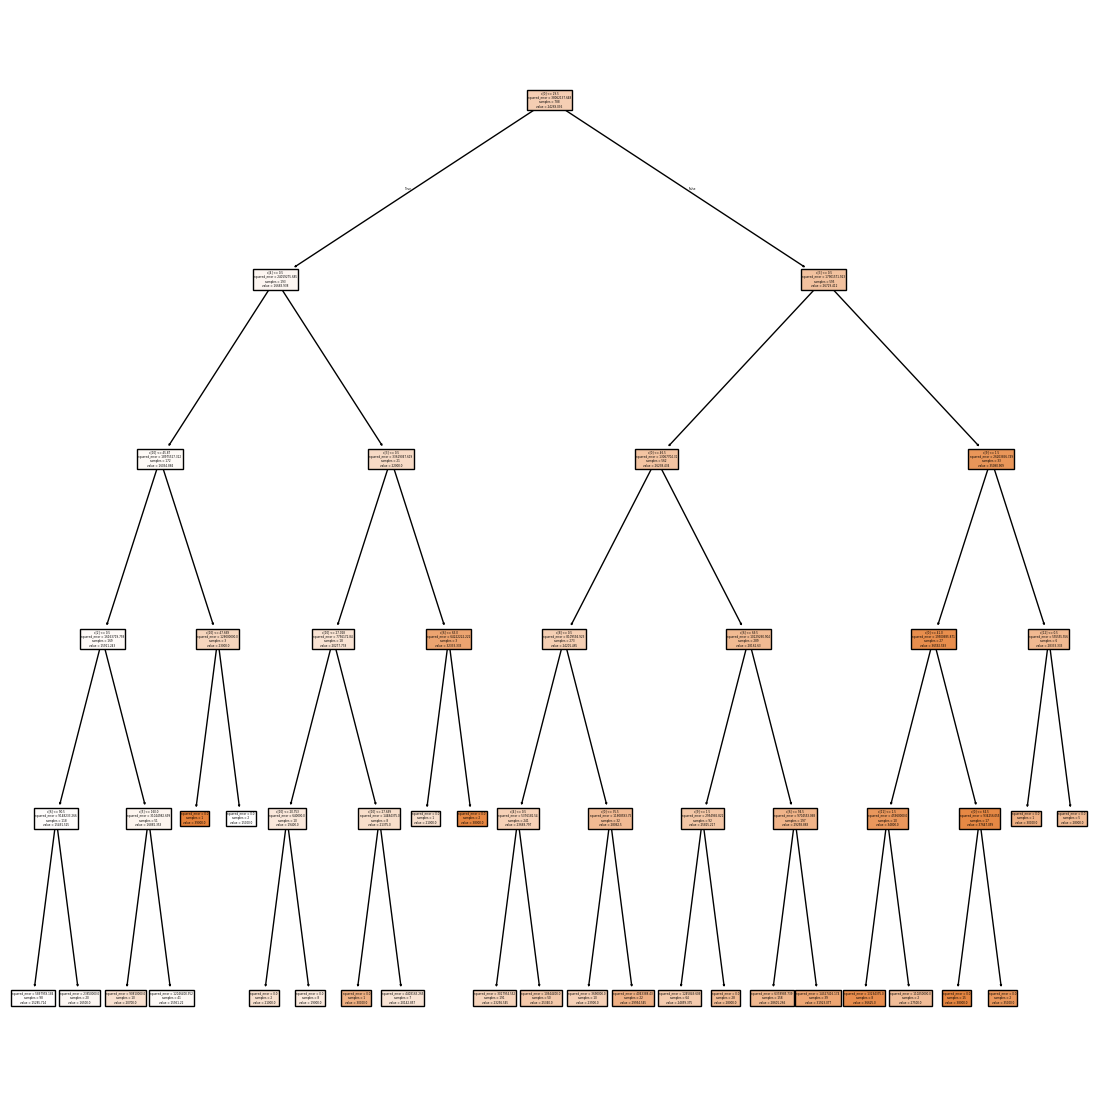

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(model_dtr, filled = True);

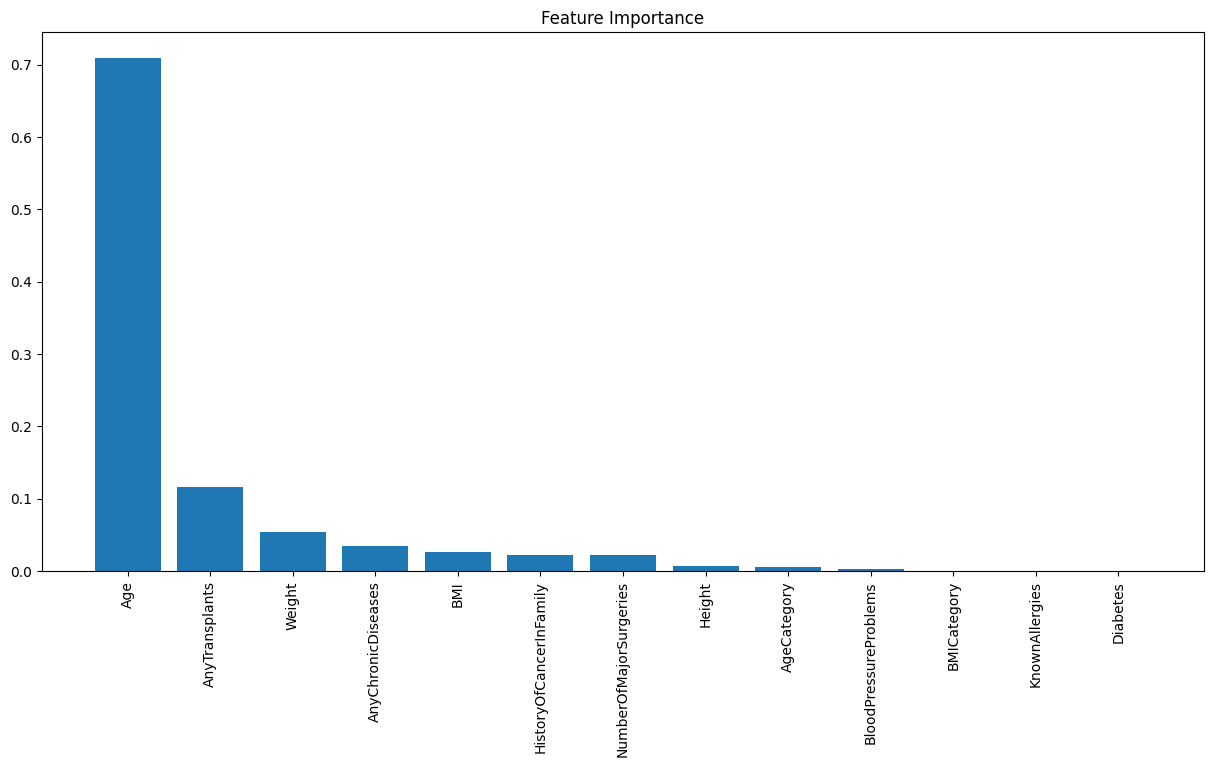

In [ ]:
importances = model_dtr.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

* From the above it can be see that the age and any transplant are the most important features that are used to build Descision Tree.

In [ ]:
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(list(X_train.columns))):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

Feature  Coefficient
0                      Age     0.709452
1           AnyTransplants     0.115982
2                   Weight     0.053783
3       AnyChronicDiseases     0.034507
4                      BMI     0.026392
5  HistoryOfCancerInFamily     0.022254
6   NumberOfMajorSurgeries     0.021703
7                   Height     0.007466
8              AgeCategory     0.005486
9    BloodPressureProblems     0.002837

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model_1 = RandomForestRegressor(random_state=18)

# Perform cross-validation
rf_cv_scores_1 = cross_val_score(rf_model_1, X, y, cv=5, scoring='r2')

# fit the model
rf_model_1.fit(X_train, y_train)

# predict and evaluate
rf_predictions_1 = rf_model_1.predict(X_test)
rf_r2_1 = r2_score(y_test, rf_predictions_1)
mse_dt_1 = mean_squared_error(y_test, rf_predictions_1)
mae_dt_1 = mean_absolute_error(y_test, rf_predictions_1)

print("Mean Absolute Error:", mae_dt_1)
print("Mean Squared Error:", mse_dt_1)


print("Random Forest R²:", rf_r2_1)
print("Cross-validated R² scores:", rf_cv_scores_1)


y_pred = rf_model_1.predict(X_train)
print(f'Train Score: {np.round(r2_score(y_train, y_pred)*100,2)}%')

y_pred = rf_model_1.predict(X_test)
print(f'Test Score: {np.round(r2_score(y_test, y_pred)*100,2)}%')

Mean Absolute Error: 964.2424242424242
Mean Squared Error: 4370732.323232323
Random Forest R²: 0.8975036069598175
Cross-validated R² scores: [0.78925885 0.75856586 0.80607023 0.89850344 0.68441243]
Train Score: 96.71%
Test Score: 89.75%


* From the Random Forest Regressor model we could see that it has 96% train r2 score and 89% r2 score, but we need to check the max depth to find the accurate or better r2 score for train and test.

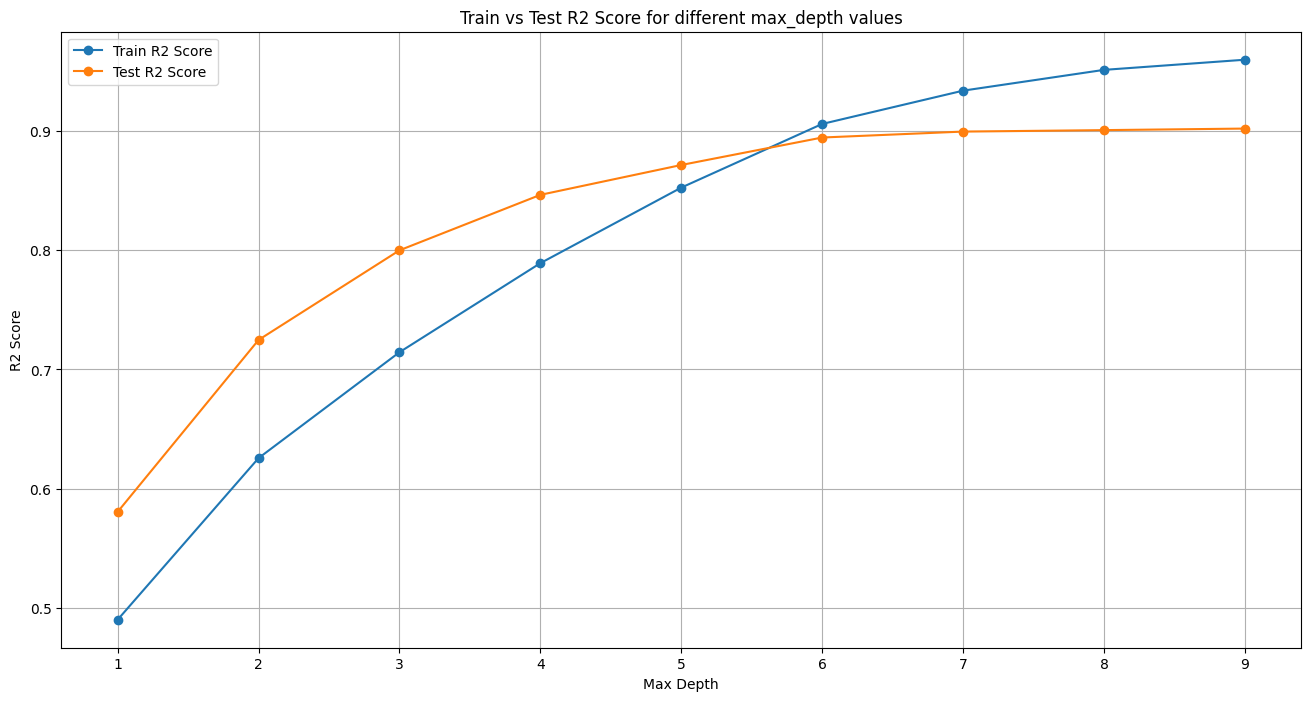

In [ ]:
train_scores = []
test_scores = []

for i in range(1, 10):
    model = RandomForestRegressor(max_depth=i, random_state=18)
    model.fit(X_train, y_train)

    # Calculate r2 scores for train and test
    train_r2 = r2_score(y_train, model.predict(X_train))
    test_r2 = r2_score(y_test, model.predict(X_test))

    # Append the scores to lists
    train_scores.append(train_r2)
    test_scores.append(test_r2)

# Plot the results
plt.figure(figsize=(16,8))
plt.plot(range(1, 10), train_scores, label='Train R2 Score', marker='o')
plt.plot(range(1, 10), test_scores, label='Test R2 Score', marker='o')

plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.title('Train vs Test R2 Score for different max_depth values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Initialize the model
rf_model_12 = RandomForestRegressor(max_depth=7, random_state=18)


# fit the model

rf_model_12.fit(X_train, y_train)

# predict and evaluate
rf_predictions_12 = rf_model_12.predict(X_test)
rf_r2_1 = r2_score(y_test, rf_predictions_12)
mse_dt_12 = mean_squared_error(y_test, rf_predictions_12)
mae_dt_12 = mean_absolute_error(y_test, rf_predictions_12)

print("Mean Absolute Error:", mae_dt_12)
print("Mean Squared Error:", mse_dt_12)

y_pred = rf_model_12.predict(X_train)
print(f'Train Score: {np.round(r2_score(y_train, y_pred)*100,2)}%')

y_pred = rf_model_12.predict(X_test)
print(f'Test Score: {np.round(r2_score(y_test, y_pred)*100,2)}%')

Mean Absolute Error: 1048.5304291278965
Mean Squared Error: 4294099.743993234
Train Score: 93.36%
Test Score: 89.93%


* From the above we could see at max depth = 6 we get a better Train r2 score 94% and test r2 score around 90%.

* I have trained with some other variations but the above model becomes the best fit and we will use this to predict the output.

In [ ]:
# Initialize the model
rf_model_13 = RandomForestRegressor(max_depth=7, random_state=20)


# fit the model

rf_model_13.fit(X_train, y_train)

# predict and evaluate
rf_predictions_13 = rf_model_13.predict(X_test)
rf_r2_13 = r2_score(y_test, rf_predictions_13)
mse_dt_13 = mean_squared_error(y_test, rf_predictions_13)
mae_dt_13 = mean_absolute_error(y_test, rf_predictions_13)

print("Mean Absolute Error:", mae_dt_13)
print("Mean Squared Error:", mse_dt_13)

y_pred = rf_model_13.predict(X_train)
print(f'Train Score: {np.round(r2_score(y_train, y_pred)*100,2)}%')

y_pred = rf_model_13.predict(X_test)
print(f'Test Score: {np.round(r2_score(y_test, y_pred)*100,2)}%')

Mean Absolute Error: 1075.447870275156
Mean Squared Error: 4626910.067246915
Train Score: 93.32%
Test Score: 89.15%


In [ ]:
# Defining parameters -

params = {
          'n_estimators' : [100,110,120,140,150],
          'max_depth' : [6,7,8],
          'criterion' : ['squared_error', 'poisson'],
          'bootstrap' : [True, False],
          'max_features' : [9,10,11,12,13]
         }


from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = RandomForestRegressor(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

grid.fit(X, y)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 6, 'max_features': 9, 'n_estimators': 100}
Best score:  nan


In [ ]:
# Initialize the model
rf_model_13 = RandomForestRegressor(max_depth=6,bootstrap = True,criterion = 'squared_error',max_features = 9, n_estimators = 100)


# fit the model

rf_model_13.fit(X_train, y_train)

# predict and evaluate
rf_predictions_13 = rf_model_13.predict(X_test)
rf_r2_13 = r2_score(y_test, rf_predictions_13)
mse_dt_13 = mean_squared_error(y_test, rf_predictions_13)
mae_dt_13 = mean_absolute_error(y_test, rf_predictions_13)

print("Mean Absolute Error:", mae_dt_13)
print("Mean Squared Error:", mse_dt_13)

y_pred = rf_model_13.predict(X_train)
print(f'Train Score: {np.round(r2_score(y_train, y_pred)*100,2)}%')

y_pred = rf_model_13.predict(X_test)
print(f'Test Score: {np.round(r2_score(y_test, y_pred)*100,2)}%')

Mean Absolute Error: 1418.6796041334499
Mean Squared Error: 5042823.40670255
Train Score: 89.34%
Test Score: 88.17%


From the above testing of various hyperparameters we could see that Random forest regressor performance works better with max depth 7

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42,max_depth=5)
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("XGBoost Regression R²:", xgb_r2)
print("Cross-validated R² scores:", xgb_cv_scores)
mse_xgb = mean_squared_error(y_test, xgb_predictions)
mae_xgb = mean_absolute_error(y_test, xgb_predictions)

print("Mean Absolute Error:", mae_xgb)
print("Mean Squared Error:", mse_xgb)

# Print the train and test scores
train_score = xgb_model.score(X_train, y_train)
test_score = xgb_model.score(X_test, y_test)

print(f"Train R² Score XGBRegressor:{round(train_score,2)*100}%")
print(f"Test R² Score XGBRegressor:{round(test_score,2)*100}%")

XGBoost Regression R²: 0.8357788324356079
Cross-validated R² scores: [0.78377521 0.7138021  0.77271008 0.85943568 0.64083159]
Mean Absolute Error: 1362.5696614583333
Mean Squared Error: 7002848.747049428
Train R² Score XGBRegressor:100.0%
Test R² Score XGBRegressor:84.0%


* Now we built XGBoost Regression with train r2 score 100% and test r2 score of 84%. But we could see there is some overfit. lets check the depth at which we get a optimal performance.

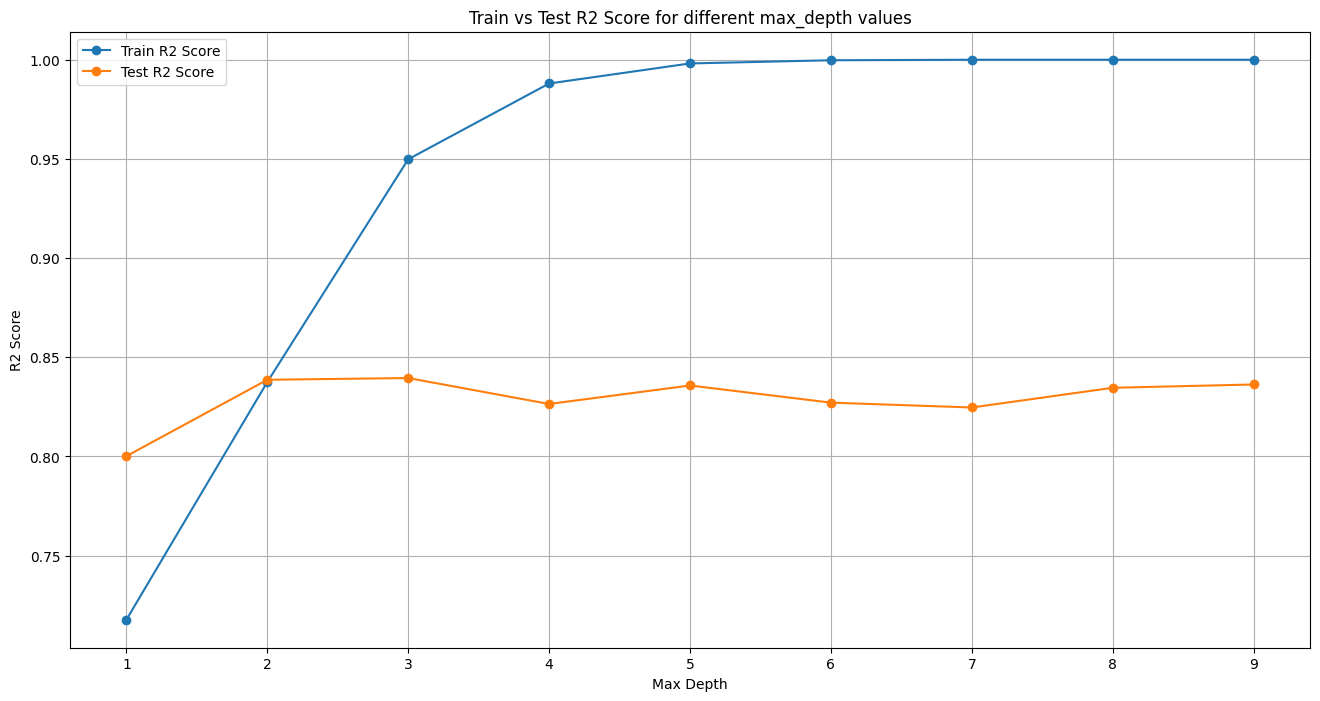

In [ ]:
train_scores = []
test_scores = []

for i in range(1, 10):
    xgb_model_1 = XGBRegressor(max_depth=i)
    xgb_model_1.fit(X_train, y_train)

    # Calculate r2 scores for train and test
    train_r2 = r2_score(y_train, xgb_model_1.predict(X_train))
    test_r2 = r2_score(y_test, xgb_model_1.predict(X_test))

    # Append the scores to lists
    train_scores.append(train_r2)
    test_scores.append(test_r2)

# Plot the results
plt.figure(figsize=(16,8))
plt.plot(range(1, 10), train_scores, label='Train R2 Score', marker='o')
plt.plot(range(1, 10), test_scores, label='Test R2 Score', marker='o')

plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.title('Train vs Test R2 Score for different max_depth values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model_xgb_2 = XGBRegressor(max_depth=2)
model_xgb_2.fit(X_train, y_train)

y_pred = model_xgb_2.predict(X_train)
print(f'Train Accuracy: {np.round(r2_score(y_train, y_pred)*100,2)}%')

y_pred = model_xgb_2.predict(X_test)
print(f'Test Accuracy: {np.round(r2_score(y_test, y_pred)*100,2)}%')

Train Accuracy: 83.75%
Test Accuracy: 83.87%


* From the above we can see we get an optimal performance with max depth 2 with a train and test r2 score around 84%. Still slightly lesser than Random Forest Regression.

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(random_state=42)
ridge_cv_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='r2')
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_predictions)

print("Ridge Regression R²:", ridge_r2)
print("Cross-validated R² scores:", ridge_cv_scores)
mse_ridge = mean_squared_error(y_test, ridge_predictions)
mae_ridge = mean_absolute_error(y_test, ridge_predictions)

print("Mean Absolute Error:", mae_ridge)
print("Mean Squared Error:", mse_ridge)
print(f"Train R² Score Ridge: {round(ridge_model.score(X_train, y_train),2)} %")
print(f"Test R² Score Ridge:{round(ridge_model.score(X_test, y_test),2)} %")


Ridge Regression R²: 0.7109516446662018
Cross-validated R² scores: [0.62612757 0.6491237  0.65471917 0.75020615 0.4973608 ]
Mean Absolute Error: 2607.6006163653583
Mean Squared Error: 12325828.764913611
Train R² Score Ridge: 0.63 %
Test R² Score Ridge:0.71 %


* Ridge is still showing a lower train and test r2 score. Hence we will not consider it for model building

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(random_state=42)
lasso_cv_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='r2')
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_predictions)

print("Lasso Regression R²:", lasso_r2)
print("Cross-validated R² scores:", lasso_cv_scores)
mse_lasso = mean_squared_error(y_test, lasso_predictions)
mae_lasso = mean_absolute_error(y_test, lasso_predictions)

print("Mean Absolute Error:", mae_lasso)
print("Mean Squared Error:", mse_lasso)
print(f"Train R² Score Lasso:{round(lasso_model.score(X_train, y_train),2)} %")
print(f"Test R² Score Lasso:{round(lasso_model.score(X_test, y_test),2)} %")



Lasso Regression R²: 0.7118915588787265
Cross-validated R² scores: [0.62638404 0.64948227 0.65364123 0.75149942 0.4957133 ]
Mean Absolute Error: 2603.0205678018433
Mean Squared Error: 12285748.199072268
Train R² Score Lasso:0.63 %
Test R² Score Lasso:0.71 %


* We are seeing Lasso also performing train and test r2 score similar to Ridge.

In [ ]:
from sklearn.svm import SVR

svr_model = SVR()
svr_cv_scores = cross_val_score(svr_model, X, y, cv=5, scoring='r2')
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)
svr_r2 = r2_score(y_test, svr_predictions)

print("SVR Regression R²:", svr_r2)
print("Cross-validated R² scores:", svr_cv_scores)
mse_svr = mean_squared_error(y_test, svr_predictions)
mae_svr = mean_absolute_error(y_test, svr_predictions)

print("Mean Absolute Error:", mae_svr)
print("Mean Squared Error:", mse_svr)
print(f"Train R² Score SVR:{round(svr_model.score(X_train, y_train),2)} %")
print(f"Test R² Score SVR:{round(svr_model.score(X_test, y_test),2)} %")


SVR Regression R²: -0.05844978479583074
Cross-validated R² scores: [-0.01124829 -0.10335441 -0.02909925 -0.07056746  0.0001163 ]
Mean Absolute Error: 5327.939509270694
Mean Squared Error: 45135253.541183464
Train R² Score SVR:-0.04 %
Test R² Score SVR:-0.06 %


* SVR is performing the lowest hence we are neglecting it for model building.

In [ ]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_cv_scores = cross_val_score(lgb_model, X, y, cv=5, scoring='r2')
lgb_model.fit(X_train, y_train)
lgb_predictions = lgb_model.predict(X_test)
lgb_r2 = r2_score(y_test, lgb_predictions)

print("LightGBM Regression R²:", lgb_r2)
print("Cross-validated R² scores:", lgb_cv_scores)
mse_lgb = mean_squared_error(y_test, lgb_predictions)
mae_lgb = mean_absolute_error(y_test, lgb_predictions)

print("Mean Absolute Error:", mae_lgb)
print("Mean Squared Error:", mse_lgb)
print(f"Train R² Score LightGBM:{round(lgb_model.score(X_train, y_train),2)} %")
print(f"Test R² Score LightGBM:{round(lgb_model.score(X_test, y_test),2)} %")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 13
[LightGBM] [Info] Start training from score 24370.558376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

* Light GBM Regression is performing with 93% r2 score for train and 88% r2 score for test.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)

# Perform cross-validation
gb_cv_scores = cross_val_score(gb_model, X,y, cv = 5, scoring = 'r2')

# Fit the model
gb_model.fit(X_train, y_train)

# Predict and evaluate
gb_predictions = gb_model.predict(X_test)
gb_r2 = r2_score(y_test, gb_predictions)

print("Gradient Boosting R²:", gb_r2)
print("Cross-validated R² scores:", gb_cv_scores)
mse_gb = mean_squared_error(y_test, gb_predictions)
mae_gb = mean_absolute_error(y_test, gb_predictions)

print("Mean Absolute Error:", mae_gb)
print("Mean Squared Error:", mse_gb)
# Print the train and test scores
train_score = gb_model.score(X_train, y_train)
test_score = gb_model.score(X_test, y_test)

print(f"Train R² Score GradientBoostingRegressor: {round(train_score,2)} %")
print(f"Test R² Score GradientBoostingRegressor:{round(test_score,2)} %")

Gradient Boosting R²: 0.8679253236809571
Cross-validated R² scores: [0.72490308 0.72675346 0.77913785 0.88322191 0.65858112]
Mean Absolute Error: 1521.7125687486919
Mean Squared Error: 5632032.8915552925
Train R² Score GradientBoostingRegressor: 0.89 %
Test R² Score GradientBoostingRegressor:0.87 %


From all the above Regressor model testing we could see Random forest Regressor, Gradiant boosting regressor, lightGBM have given r2 score greater than 85% we will combine the output of the 3 model to predict the insurance price.

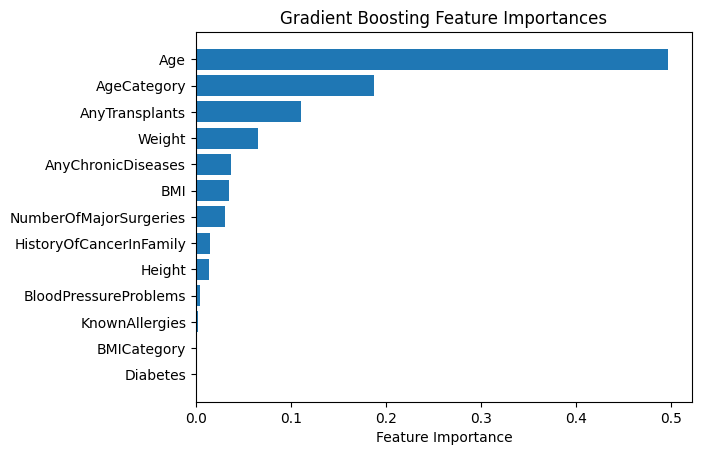

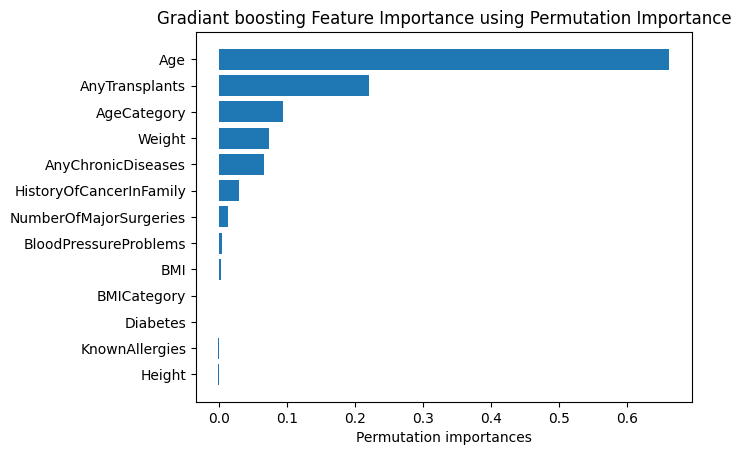

In [ ]:
feature_imp_gb = gb_model.feature_importances_
sorted_idx_gb = feature_imp_gb.argsort()
plt.barh(X.columns[sorted_idx_gb], feature_imp_gb[sorted_idx_gb])
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Feature Importances")
plt.show()


from sklearn.inspection import permutation_importance
# Permutation importances
perm_importances_gb = permutation_importance(gb_model, X_test, y_test,n_repeats=30, random_state=42)
sorted_idx_gb_perm = perm_importances_gb.importances_mean.argsort()
plt.barh(X.columns[sorted_idx_gb_perm], perm_importances_gb.importances_mean[sorted_idx_gb_perm])
plt.xlabel("Permutation importances")
plt.title("Gradiant boosting Feature Importance using Permutation Importance")
plt.show()



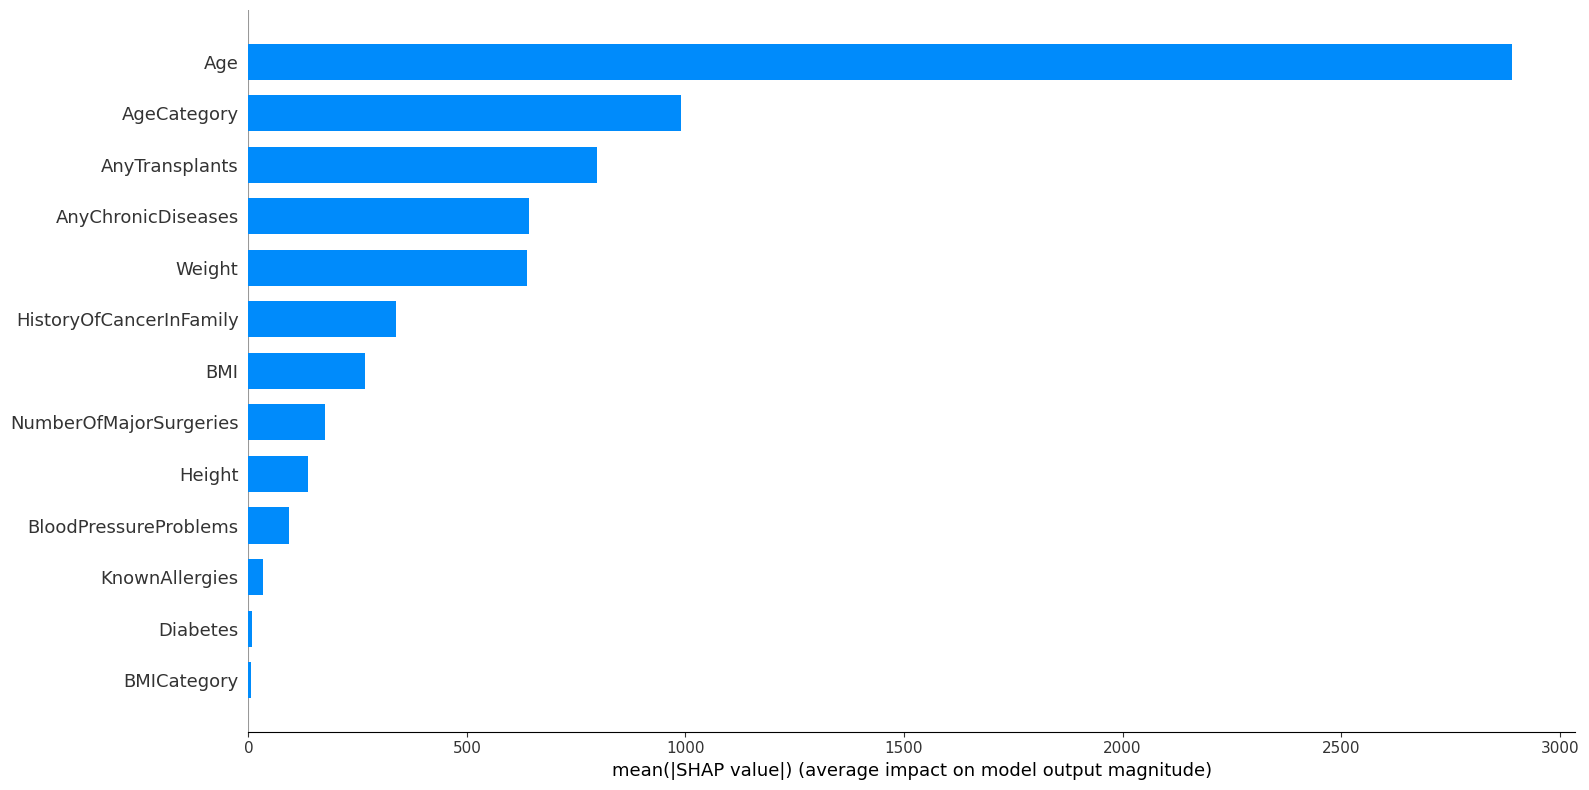

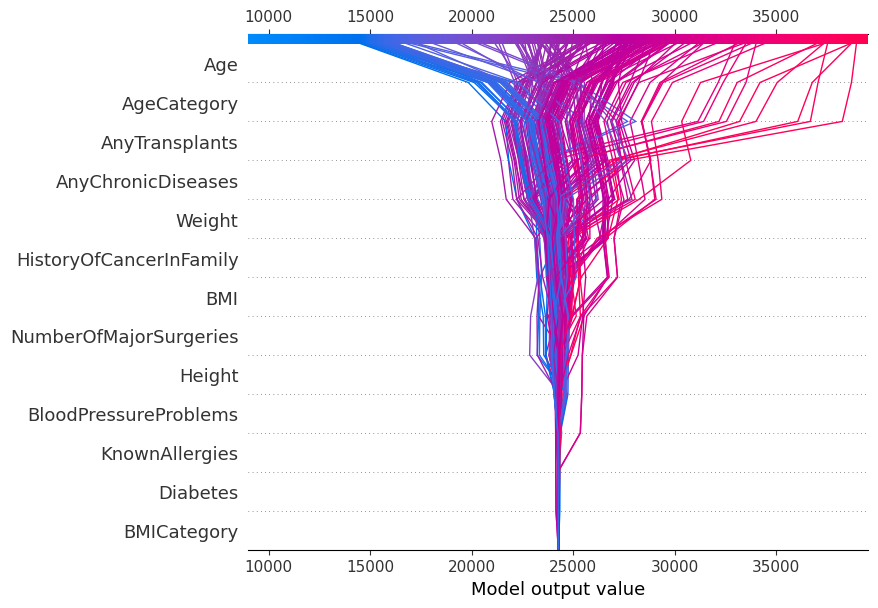

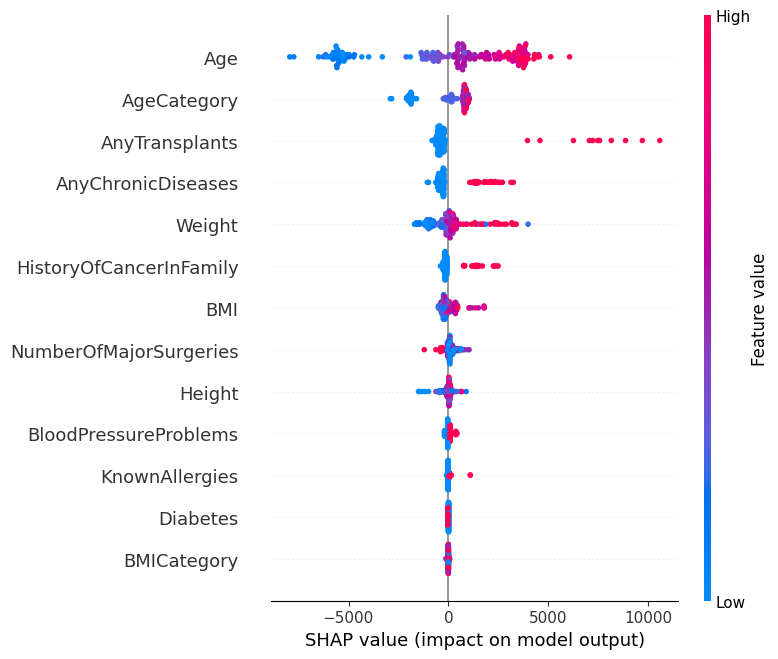

In [ ]:
import shap

# Initialize the TreeExplainer
explainer_gb = shap.TreeExplainer(gb_model)

# Calculate SHAP values
shap_values_gb = explainer_gb.shap_values(X_test)

# Summary plot with corrected plot size parameter
shap.summary_plot(shap_values_gb, X_test, plot_type="bar", plot_size=(16, 8))

# Decision plot with corrected indices
shap.decision_plot(explainer_gb.expected_value, shap_values_gb, X_test.columns)

shap.summary_plot(shap_values_gb, X_test)



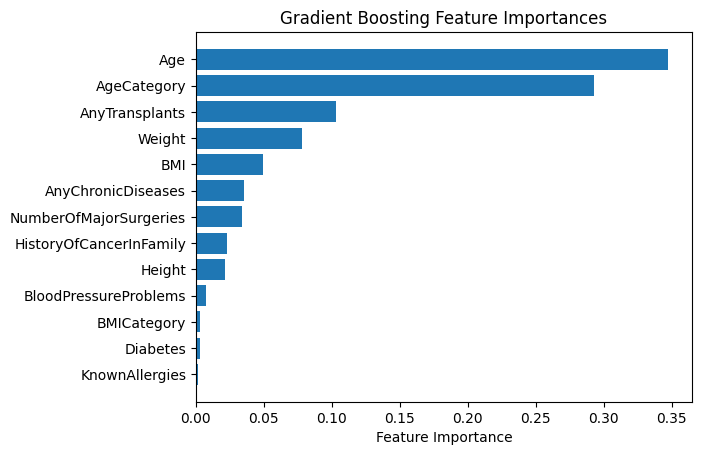

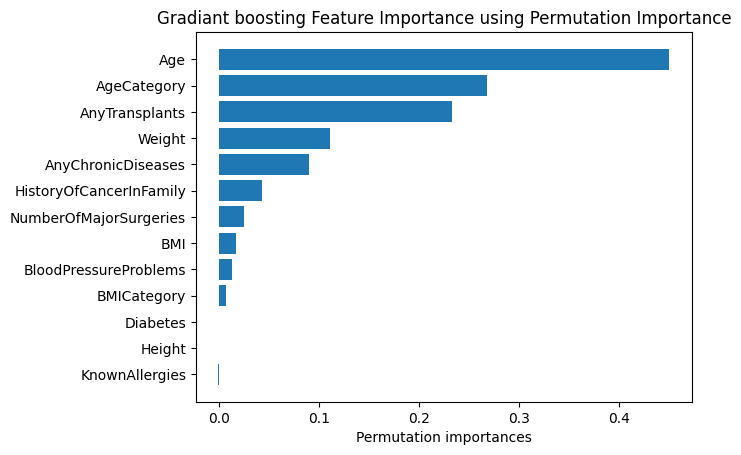

In [ ]:
feature_imp_rf_model_12 = rf_model_12.feature_importances_
sorted_idx_rf_model_12 = feature_imp_rf_model_12.argsort()
plt.barh(X.columns[sorted_idx_rf_model_12], feature_imp_rf_model_12[sorted_idx_rf_model_12])
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Feature Importances")
plt.show()

# Permutation importances
perm_importances_rf_model_12 = permutation_importance(rf_model_12, X_test, y_test,n_repeats=30, random_state=42)
sorted_idx_rf_model_12_perm = perm_importances_rf_model_12.importances_mean.argsort()
plt.barh(X.columns[sorted_idx_rf_model_12_perm], perm_importances_rf_model_12.importances_mean[sorted_idx_rf_model_12_perm])
plt.xlabel("Permutation importances")
plt.title("Gradiant boosting Feature Importance using Permutation Importance")
plt.show()

In [ ]:
feature_imp_rf = rf_model_12.feature_importances_
sorted_idx_rf = feature_imp_rf.argsort()
plt.barh(X.columns[sorted_idx_rf], feature_imp_rf[sorted_idx_rf])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()


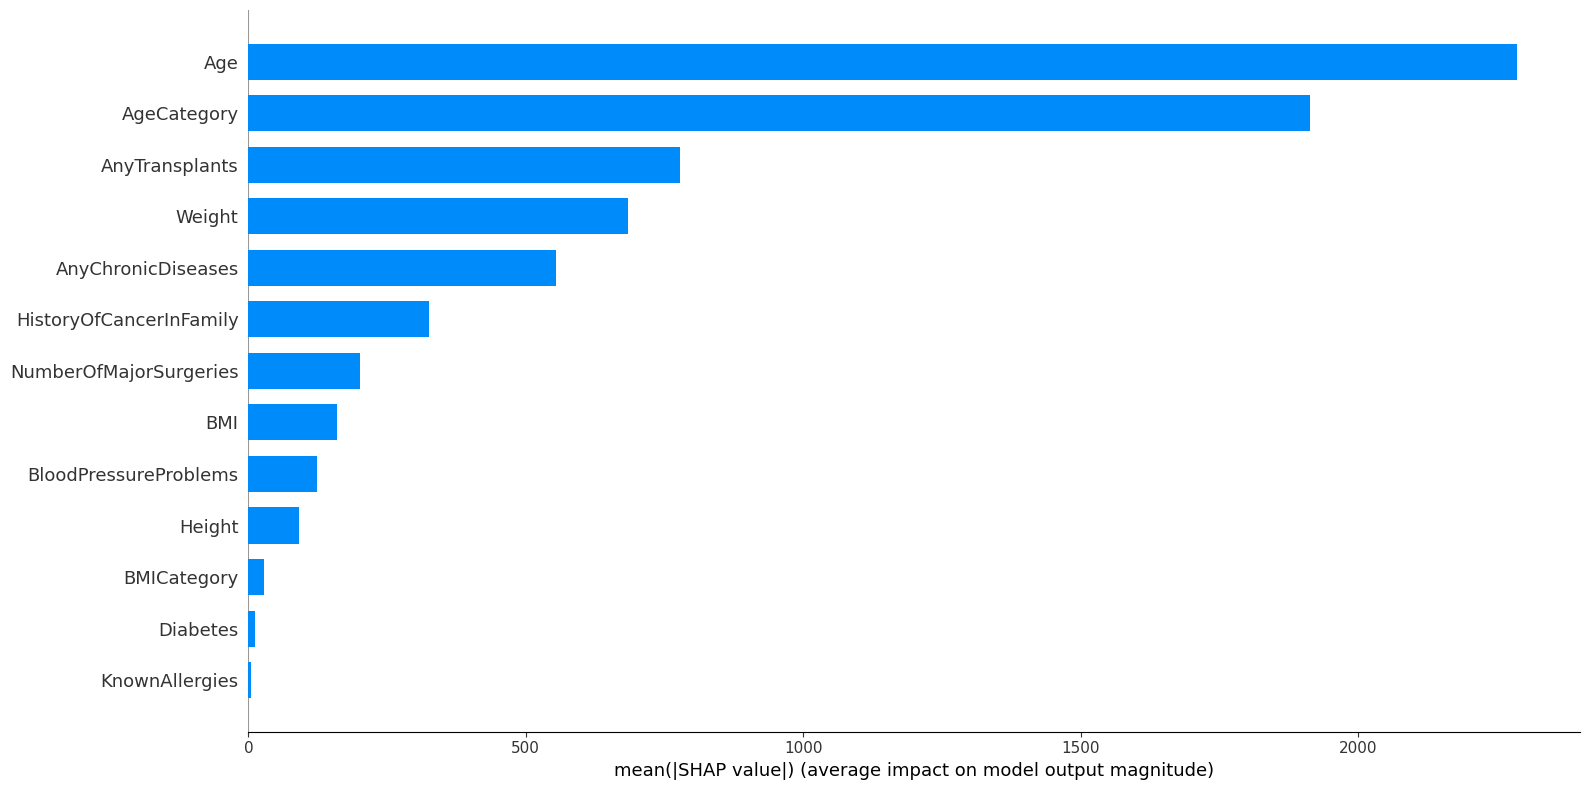

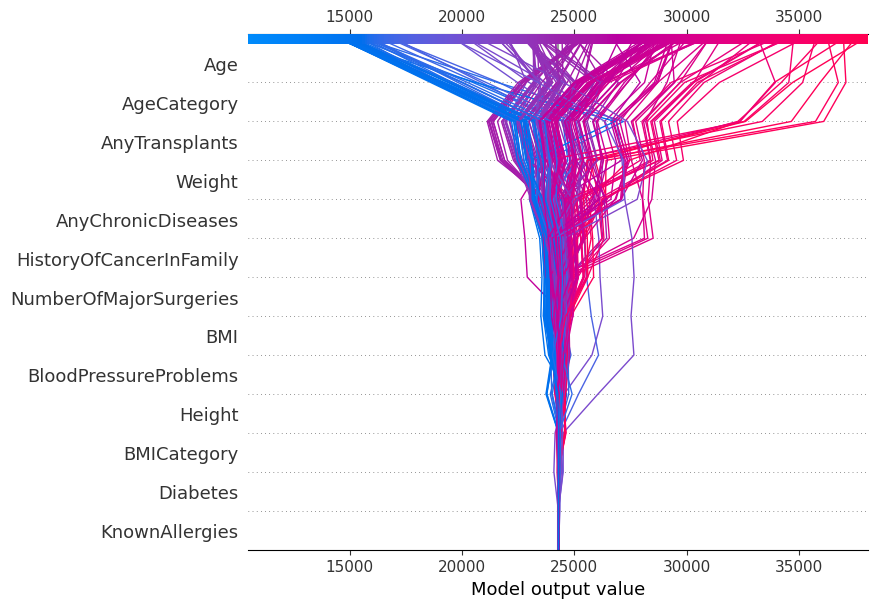

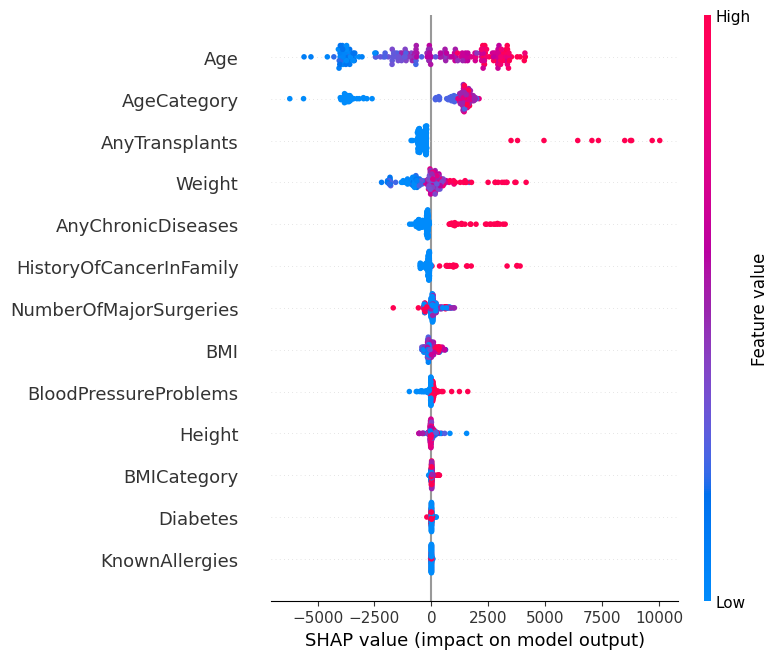

In [ ]:
# Initialize the TreeExplainer
explainer_rf_12 = shap.TreeExplainer(rf_model_12)

# Calculate SHAP values
shap_values_rf_12 = explainer_rf_12.shap_values(X_test)

# Summary plot with corrected plot size parameter
shap.summary_plot(shap_values_rf_12, X_test, plot_type="bar", plot_size=(16, 8))

# Decision plot with corrected indices
shap.decision_plot(explainer_rf_12.expected_value, shap_values_rf_12, X_test.columns)


# Summary plot with corrected plot size parameter
shap.summary_plot(shap_values_rf_12, X_test)


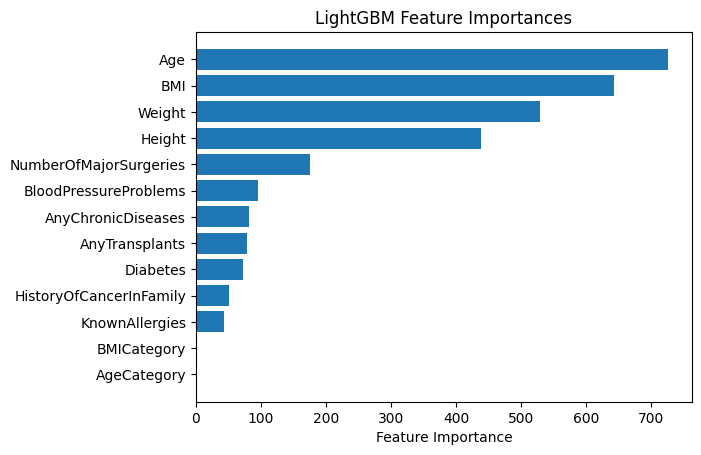

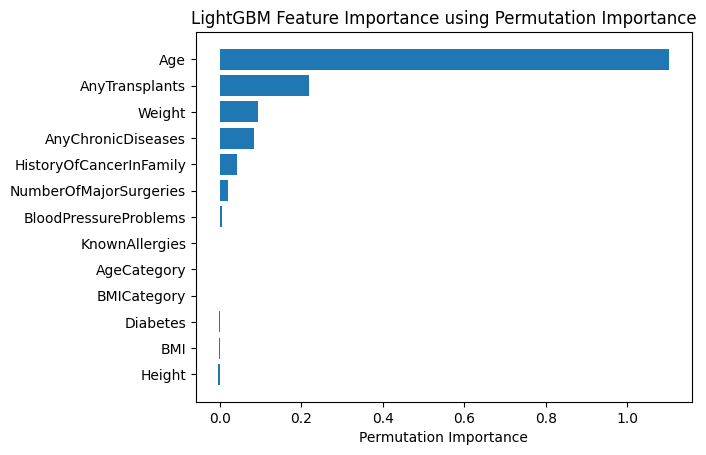

In [ ]:
feature_imp_lgb = lgb_model.feature_importances_
sorted_idx_lgb = feature_imp_lgb.argsort()
plt.barh(X.columns[sorted_idx_lgb], feature_imp_lgb[sorted_idx_lgb])
plt.xlabel("Feature Importance")
plt.title("LightGBM Feature Importances")
plt.show()


# Permutation importances
perm_importance_lgb = permutation_importance(lgb_model, X_test, y_test, n_repeats=10, random_state=9)
sorted_idx_lgb_perm = perm_importance_lgb.importances_mean.argsort()
plt.barh(X.columns[sorted_idx_lgb_perm], perm_importance_lgb.importances_mean[sorted_idx_lgb_perm])
plt.xlabel("Permutation Importance")
plt.title("LightGBM Feature Importance using Permutation Importance")
plt.show()


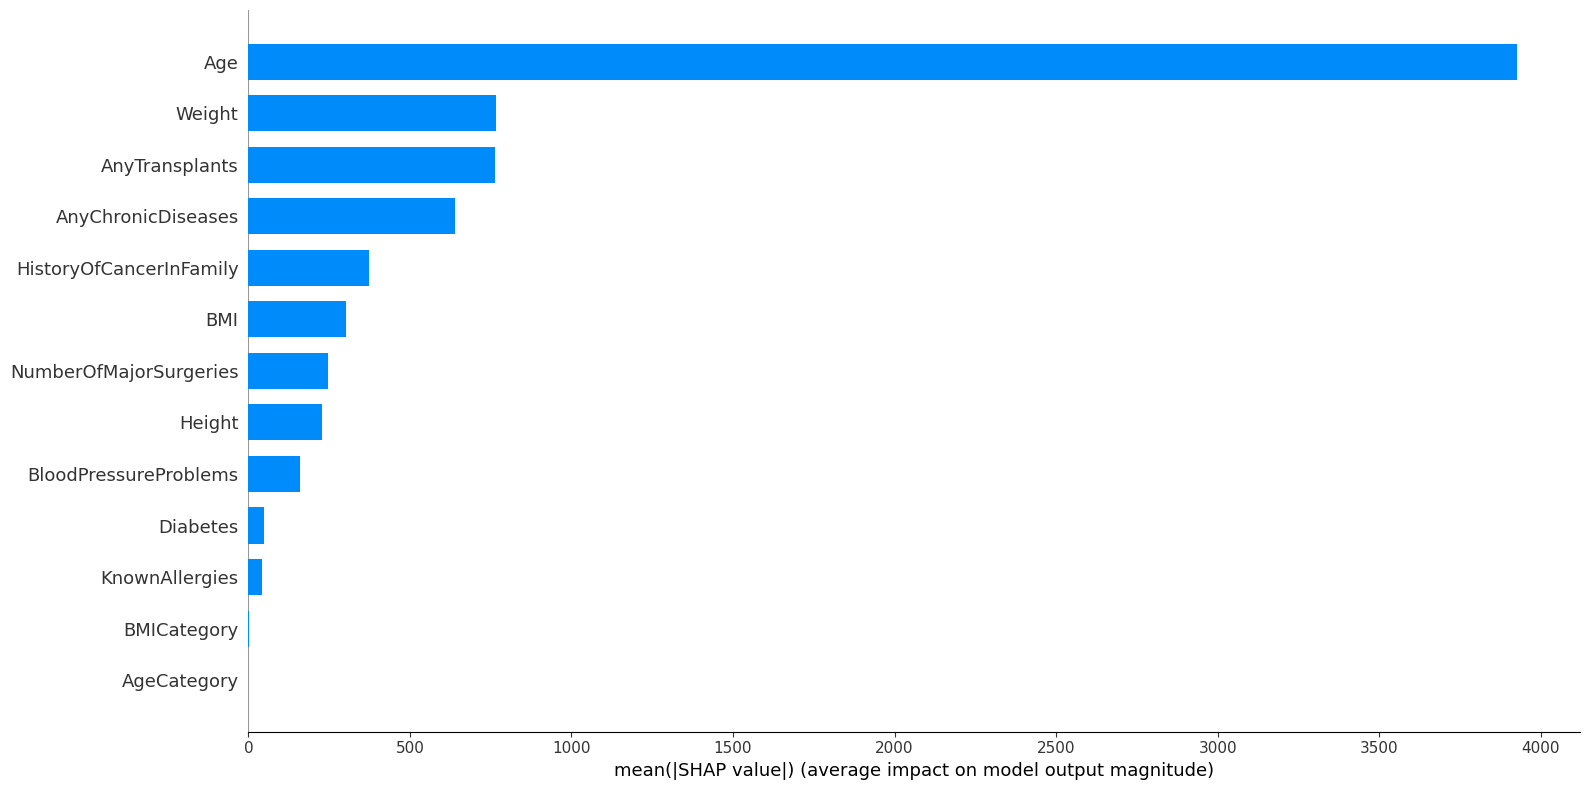

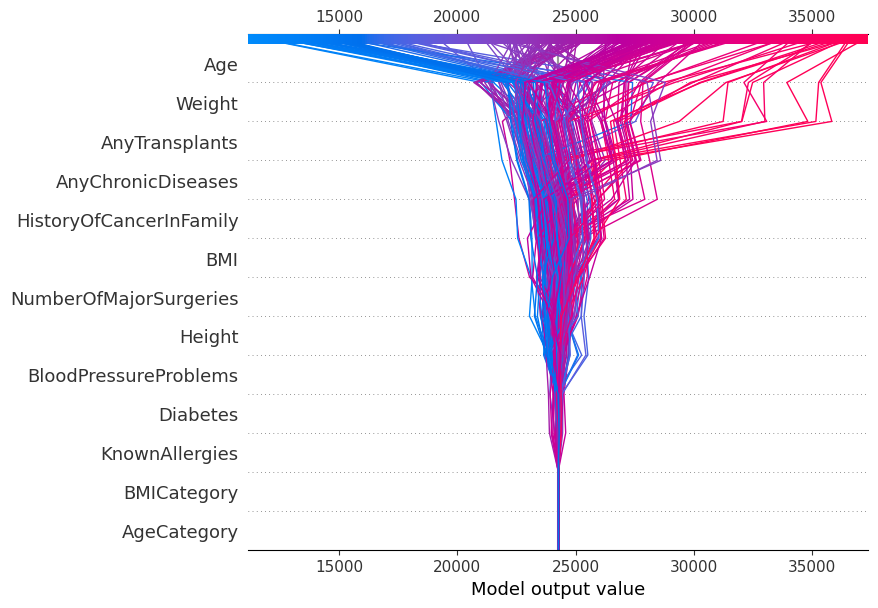

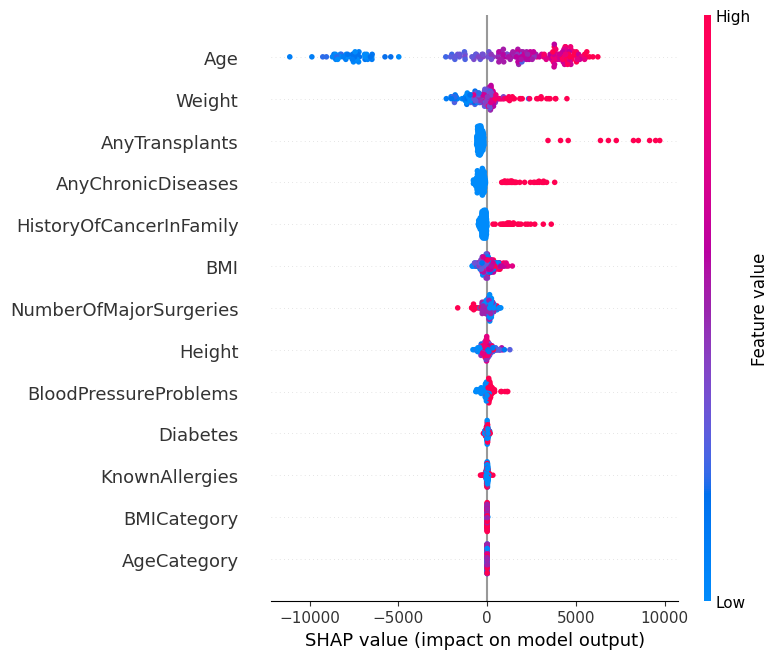

In [ ]:
# Initialize the TreeExplainer
explainer_lgb = shap.TreeExplainer(lgb_model)

# Calculate SHAP values
shap_values_lgb = explainer_lgb.shap_values(X_test)

# Summary plot with corrected plot size parameter
shap.summary_plot(shap_values_lgb, X_test, plot_type="bar", plot_size=(16, 8))

# Decision plot with corrected indices
shap.decision_plot(explainer_lgb.expected_value, shap_values_lgb, X_test.columns)


# Summary plot with corrected plot size parameter
shap.summary_plot(shap_values_lgb, X_test)

# **Insights From Shape Graph**
* For the Random forest Regression model the SHAP graphs tells us that Age, Age category, Any transplants ,weight and BMI have the highest importances.
* For Light GBM regression model the SHAP graphs tells us that Age, BMI, weight, height, Number of Major Surgeries are given more importances to predict the model output.
* For Gradient Boosting Regression model the SHAP graphs tell us that Age, Age Category, Any transplants, weight.


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(random_state=42, silent=True)
catboost_cv_scores = cross_val_score(catboost_model, X, y, cv=5, scoring='r2')
catboost_model.fit(X_train, y_train)
catboost_predictions = catboost_model.predict(X_test)
catboost_r2 = r2_score(y_test, catboost_predictions)

print("CatBoost Regression R²:", catboost_r2)
print("Cross-validated R² scores:", catboost_cv_scores)

# Print the train and test scores
train_score = catboost_model.score(X_train, y_train)
test_score = catboost_model.score(X_test, y_test)

print(f"Train R² Score CatBoostRegressor: {round(train_score*100,2)}%")
print(f"Test R² Score CatBoostRegressor:{round(test_score*100,2)}%")

CatBoost Regression R²: 0.8531095416354233
Cross-validated R² scores: [0.77191596 0.71305145 0.78314102 0.87468266 0.65467574]
Train R² Score CatBoostRegressor: 97.85%
Test R² Score CatBoostRegressor:85.31%


In [ ]:
import pickle

model_filename_rfr = 'insurance_premium_model_rfr.pkl'
model_filename_lgbmr = 'insurance_premium_model_lgbmr.pkl'
model_filename_gbr = 'insurance_premium_model_gbr.pkl'


# Save the model
with open(model_filename_rfr, 'wb') as file:
    pickle.dump(rf_model_12, file)

with open(model_filename_lgbmr, 'wb') as file:
    pickle.dump(lgb_model, file)

with open(model_filename_gbr, 'wb') as file:
    pickle.dump(gb_model, file)


In [ ]:
# loading the model and testing
with open(model_filename_rfr, 'rb') as file:
    loaded_model_rfr = pickle.load(file)

with open(model_filename_lgbmr, 'rb') as file1:
    loaded_model_lgbmr = pickle.load(file1)

with open(model_filename_gbr, 'rb') as file2:
    loaded_model_gbr = pickle.load(file2)

custom_input = np.array([[32,1,1,0,0,170,81,0,1,1,20.76,2,1]])


# Predict the premium price
predicted_premium = loaded_model_rfr.predict(custom_input)
print(f"Predicted Premium Price: {predicted_premium[0]}")

predicted_premium1 = loaded_model_lgbmr.predict(custom_input)
print(f"Predicted Premium Price: {predicted_premium1[0]}")

predicted_premium2 = loaded_model_gbr.predict(custom_input)
print(f"Predicted Premium Price: {predicted_premium2[0]}")

Predicted Premium Price: 24068.58543417367
Predicted Premium Price: 25596.105973635214
Predicted Premium Price: 24510.51622529958


Our model will be built in such a way we will combine the average output from random forest regressor and gradants boosting regressor.
We are using pickle to package the model.
We will use streamlite to build the working app

In [ ]:
from google.colab import files
files.download(model_filename_rfr)

from google.colab import files
files.download(model_filename_lgbmr)

from google.colab import files
files.download(model_filename_gbr)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Predictions with 95% Confidence

In [ ]:
from scipy.stats import norm

predictions = rf_model_12.predict(X_test)
residual = y_test - predictions
standard_error = np.std(residual)

confidence = 0.95
z_value = norm.ppf((1 + confidence)/2)

In [ ]:
prediction_intervals = []

for pred in predictions:
  margin_of_error = z_value*standard_error*np.sqrt(1+1/len(X_test))
  pred_interval = (pred - margin_of_error, pred+margin_of_error)
  prediction_intervals.append(pred_interval)

In [ ]:
results_df = pd.DataFrame({
    'Prediction': predictions,
    'Prediction Interval Lower': [pi[0] for pi in prediction_intervals],
    'Prediction Interval Upper': [pi[1] for pi in prediction_intervals]
})

In [ ]:
res = y_test.reset_index()
res.drop('index', axis = 1, inplace = True)
res.reset_index(inplace = True)
res.head(3)

index  PremiumPrice
0      0         31000
1      1         31000
2      2         29000

In [ ]:
results_df.reset_index(inplace=True)
res_df = pd.merge(res, results_df).drop(columns='index')
res_df.head(3)

PremiumPrice    Prediction  Prediction Interval Lower  \
0         31000  28769.723838               24699.630646   
1         31000  29705.887336               25635.794144   
2         29000  30220.328999               26150.235807   

   Prediction Interval Upper  
0               32839.817030  
1               33775.980527  
2               34290.422190

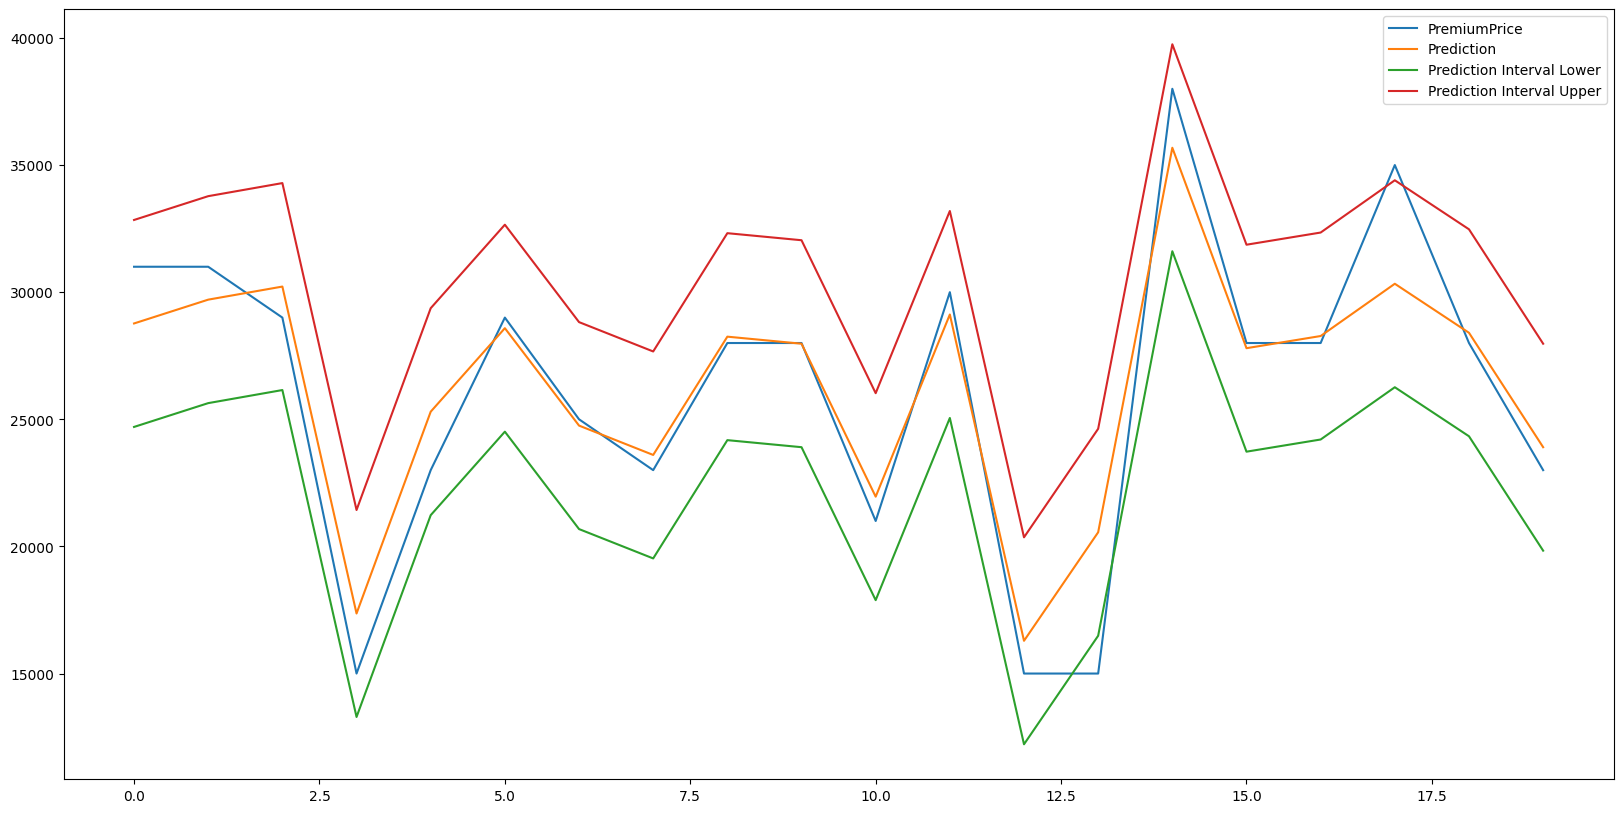

In [ ]:
import seaborn as sns, matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20,10)
res_df.head(20).plot()
plt.show()

Random Forest Results:
    PremiumPrice    Prediction  Prediction Interval Lower  \
0         31000  28769.723838               24699.630646   
1         31000  29705.887336               25635.794144   
2         29000  30220.328999               26150.235807   
3         15000  17361.875513               13291.782322   
4         23000  25299.013844               21228.920652   

   Prediction Interval Upper  
0               32839.817030  
1               33775.980527  
2               34290.422190  
3               21431.968705  
4               29369.107035  


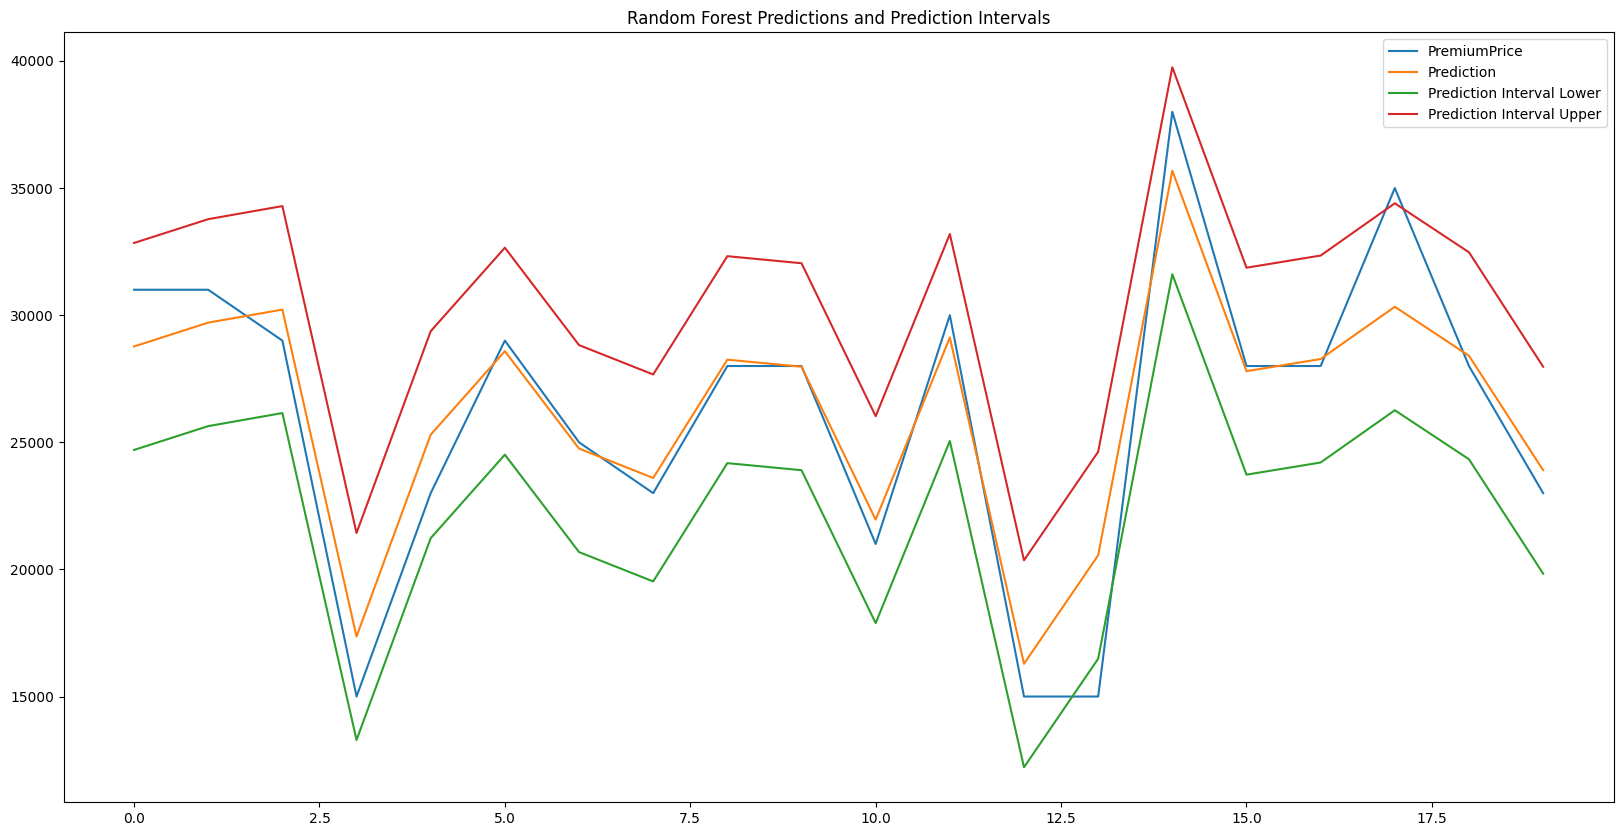

LightGBM Results:
    PremiumPrice    Prediction  Prediction Interval Lower  \
0         31000  30638.313621               26141.715439   
1         31000  27455.638836               22959.040654   
2         29000  29131.566881               24634.968699   
3         15000  14554.672681               10058.074499   
4         23000  24574.146444               20077.548262   

   Prediction Interval Upper  
0               35134.911804  
1               31952.237019  
2               33628.165064  
3               19051.270864  
4               29070.744626  


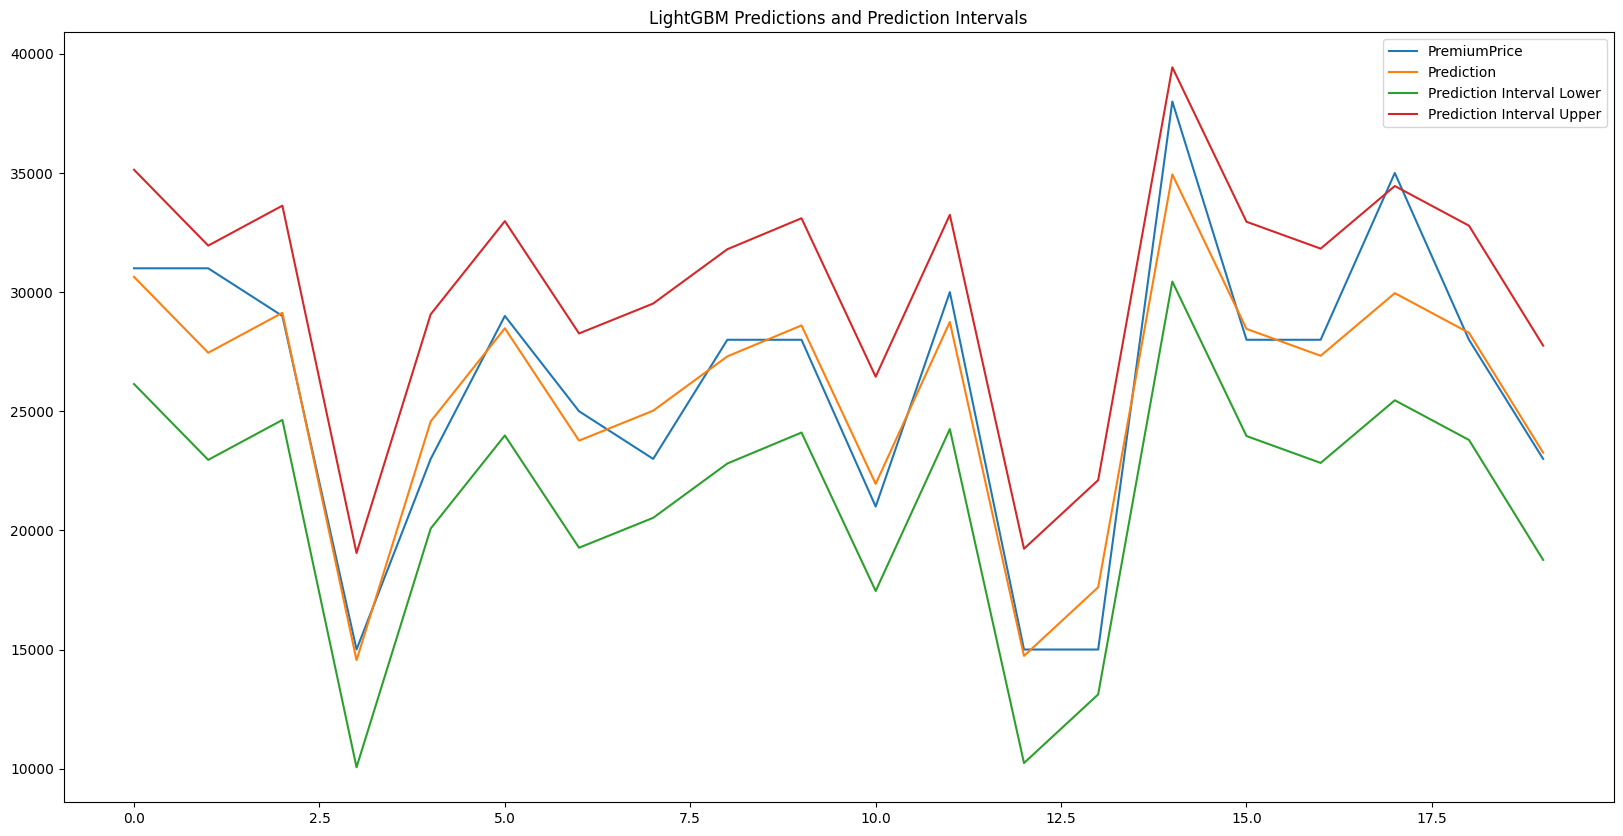

Gradient Boosting Results:
    PremiumPrice    Prediction  Prediction Interval Lower  \
0         31000  30767.798975               26109.286159   
1         31000  27669.354930               23010.842113   
2         29000  28851.638469               24193.125652   
3         15000  15723.338216               11064.825400   
4         23000  25487.227880               20828.715064   

   Prediction Interval Upper  
0               35426.311792  
1               32327.867746  
2               33510.151285  
3               20381.851033  
4               30145.740697  


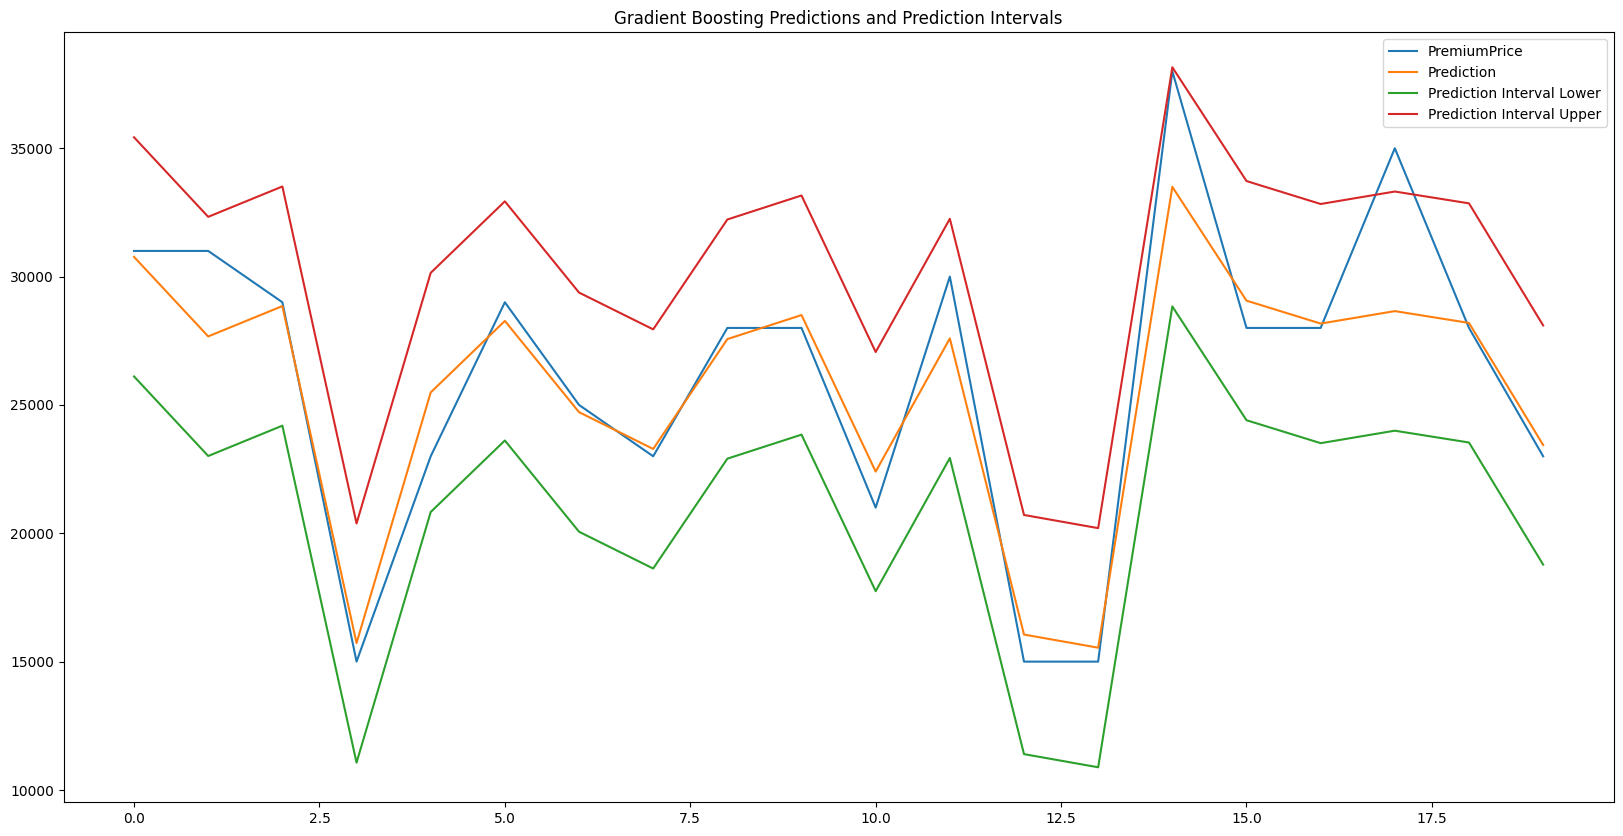

In [ ]:


models = {
    'Random Forest': rf_model_12,
    'LightGBM': lgb_model,
    'Gradient Boosting': gb_model
}

results = {}

confidence = 0.95
z_value = norm.ppf((1 + confidence)/2)

for name, model in models.items():
    # Predictions
    predictions = model.predict(X_test)
    residual = y_test - predictions
    standard_error = np.std(residual)

    prediction_intervals = []
    for pred in predictions:
        margin_of_error = z_value * standard_error * np.sqrt(1 + 1/len(X_test))
        pred_interval = (pred - margin_of_error, pred + margin_of_error)
        prediction_intervals.append(pred_interval)

    results_df = pd.DataFrame({
        'Prediction': predictions,
        'Prediction Interval Lower': [pi[0] for pi in prediction_intervals],
        'Prediction Interval Upper': [pi[1] for pi in prediction_intervals]
    })

    # Merge with y_test
    res = y_test.reset_index()
    res.drop('index', axis=1, inplace=True)
    res.reset_index(inplace=True)
    results_df.reset_index(inplace=True)
    res_df = pd.merge(res, results_df).drop(columns='index')
    res_df.head(3)
    # Store results
    results[name] = res_df
    # Print first 5 rows of the results DataFrame
    print(f"{name} Results:\n", res_df.head(5))
    # Plot
    plt.rcParams['figure.figsize'] = (20, 10)
    res_df.head(20).plot()
    plt.title(f"{name} Predictions and Prediction Intervals")
    plt.show()


### **Recommendations**

* We could sell more insurance premium to people who do not have any health issues as 50% of the insurance purchaser are not having any health issues.

* People with any organ transplantion have paid a huge premium and without organ  transplant are paying a lower premium.
* Hence we could recommend to increase the premium for people with no organ transplant.

* People with any chronic diseases and have undergone any organ transplant are paying a high premium price.

* We recommend to sell more premium to people between age 18 to 20 and also above 60 as they are lowest in terms of purchasing the premium.